# Import Data

In [ ]:
!gdown 1zd7WFWw3FZeV2nWZyli5H0wHeqJ3gqbr
!gdown 1QbfjgVGnyfKY2Pg8gylqzAWW7EiRgKu0

Downloading...
From: https://drive.google.com/uc?id=1zd7WFWw3FZeV2nWZyli5H0wHeqJ3gqbr
To: /content/test.csv
100% 31.5M/31.5M [00:00<00:00, 59.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbfjgVGnyfKY2Pg8gylqzAWW7EiRgKu0
To: /content/train.csv
100% 100M/100M [00:01<00:00, 56.1MB/s] 


# Import Module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import pickle


from sklearn.model_selection import train_test_split

# Data Profiling secara Umum

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

## Data Train

In [ ]:
train.head()

id     origin_host  origin_port  response_host  \
0   CkwI1TlUCRApPfcJl   103.255.15.27        45314  103.255.15.23   
1  CBlrcc3dvtaHzyV4zj   103.255.15.27        45060  103.255.15.23   
2  CdpSX33u29yjDvnVzi   103.255.15.23         3440   52.45.16.192   
3  CT23VJ1KsoKeCdWpx2  103.255.15.150        56132        8.8.8.8   
4  C6OJU51P50bwNKvnY6  103.255.15.150        43358        8.8.8.8   

   response_port  flow_duration  forward_packets_per_sec  \
0          42001       0.000090             11125.474801   
1          42000       0.000033             30174.848921   
2            443      61.977190                 0.322699   
3             53       0.024249                      NaN   
4             53       0.027580                      NaN   

   backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                       NaN          22250.949602           1.00  ...   
1              30174.848921          60349.697842           1.00  ...   
2                  0.242025              0.564724           0.75  ...   
3                 82.478178            164.956355           1.00  ...   
4                       NaN             72.516256            NaN  ...   

   forward_bulk_packets  backward_bulk_packets  forward_bulk_rate  \
0                   0.0                    0.0                NaN   
1                   0.0                    0.0                0.0   
2                   NaN                    0.0                NaN   
3                   NaN                    0.0                0.0   
4                   0.0                    0.0                NaN   

   backward_bulk_rate         active          idle  \
0                 0.0      89.883804           NaN   
1                 0.0      33.140182           NaN   
2                 0.0  401089.021138  9.861604e+06   
3                 0.0   24248.838425           NaN   
4                 0.0   27580.022812  0.000000e+00   

   forward_initial_window_size  backward_initial_window_size  \
0                      29200.0                           NaN   
1                      29200.0                           0.0   
2                      29200.0                           NaN   
3                          0.0                           NaN   
4                          0.0                           NaN   

   forward_last_window_size     traffic  
0                       NaN  Background  
1                       NaN  Background  
2                      90.0  Background  
3                       0.0      Benign  
4                       0.0      Benign  

[5 rows x 43 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   origin_port                   416473 non-null  int64  
 3   response_host                 416473 non-null  object 
 4   response_port                 416473 non-null  int64  
 5   flow_duration                 299409 non-null  float64
 6   forward_packets_per_sec       293081 non-null  float64
 7   backward_packets_per_sec      324234 non-null  float64
 8   flow_packets_per_sec          304723 non-null  float64
 9   down_up_ratio                 292858 non-null  float64
 10  flow_FIN_flags                304424 non-null  float64
 11  flow_SYN_flags                325463 non-null  float64
 12  flow_RST_flags                311037 non-nul

## Data Test

In [ ]:
test.head()

id      origin_host  origin_port    response_host  \
0  ClDOIi3yLGMfeRPzAc    103.255.15.23        49188    13.227.228.83   
1  C9chsd1cHTOBBHe6Q2  202.169.224.219         5678  255.255.255.255   
2  CUOe3U1NC5Nln7cItf   103.255.15.150        32976          8.8.8.8   
3  C6QhB04KTRUYOY2rMk   103.255.15.150        48606  128.199.242.104   
4  C60oC51SZNEhCXlX6c   103.255.15.150        34794  128.199.242.104   

   response_port  flow_duration  forward_packets_per_sec  \
0            443       1.738424                 8.628505   
1           5678       0.000000                 0.000000   
2             53            NaN                80.446972   
3            443            NaN                      NaN   
4            443       0.326490                30.628816   

   backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                       NaN             16.681776            NaN  ...   
1                  0.000000              0.000000            0.0  ...   
2                       NaN                   NaN            1.0  ...   
3                 51.891033             88.956056            NaN  ...   
4                       NaN             70.446278            1.3  ...   

   backward_bulk_bytes  forward_bulk_packets  backward_bulk_packets  \
0                  0.0                   0.0                    NaN   
1                  NaN                   0.0                    NaN   
2                  0.0                   NaN                    0.0   
3               4585.0                   0.0                    5.0   
4               4585.0                   0.0                    NaN   

   forward_bulk_rate  backward_bulk_rate        active  idle  \
0                NaN        0.000000e+00  1.738440e+06   NaN   
1                NaN                 NaN  0.000000e+00   0.0   
2                0.0        0.000000e+00  2.486110e+04   0.0   
3                0.0        1.544649e+07  2.697961e+05   0.0   
4                NaN        5.211622e+07           NaN   NaN   

   forward_initial_window_size  backward_initial_window_size  \
0                      29200.0                       65535.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                      29200.0                           NaN   
4                      29200.0                           NaN   

   forward_last_window_size  
0                      80.0  
1                       0.0  
2                       NaN  
3                       NaN  
4                     402.0  

[5 rows x 42 columns]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            138805 non-null  object 
 1   origin_host                   138805 non-null  object 
 2   origin_port                   138805 non-null  int64  
 3   response_host                 138805 non-null  object 
 4   response_port                 138805 non-null  int64  
 5   flow_duration                 86780 non-null   float64
 6   forward_packets_per_sec       96316 non-null   float64
 7   backward_packets_per_sec      91138 non-null   float64
 8   flow_packets_per_sec          90465 non-null   float64
 9   down_up_ratio                 98791 non-null   float64
 10  flow_FIN_flags                115082 non-null  float64
 11  flow_SYN_flags                108899 non-null  float64
 12  flow_RST_flags                93683 non-null

# [DATA TRAIN] Data Preprocessing Persubset Data Train

## Penjelasan host dan port

*   **origin_host** : alamat IP dari client yang memulai koneksi. Membantu identifikasi perangkat atau sumber yang menginisiasi komunikasi
*   **response_host** : alamat IP dari server yang merespons permintaan. Ini penting untuk mengetahui tujuan atau server yang terlibat dalam komunikasi.
*   **origin_port**: nomor port yang digunakan oleh client. Ini membantu dalam mengidentifikasi aplikasi atau layanan yang digunakan oleh client pada saat komunikasi.
*   **response_port** : nomor port yang digunakan server. Ini menunjukkan layanan atau aplikasi yang diakses di server dan membantu dalam memahami jenis traffic yang sedang berlangsung.


In [ ]:
# Membaca data dari file CSV (sesuaikan path dengan lokasi file Anda)
df = pd.read_csv('/content/train.csv')

# Membagi data berdasarkan kategori traffic
background_data = df[df['traffic'] == 'Background']
benign_data = df[df['traffic'] == 'Benign']
probing_data = df[df['traffic'] == 'Probing']
bruteforce_data = df[df['traffic'] == 'Bruteforce']
xmrigcc_data = df[df['traffic'] == 'XMRIGCC CryptoMiner']
bruteforce_xml_data = df[df['traffic'] == 'Bruteforce-XML']

# Menampilkan jumlah baris untuk memastikan pemisahan berhasil
print(f'Background Data: {len(background_data)} rows')
print(f'Benign Data: {len(benign_data)} rows')
print(f'Probing Data: {len(probing_data)} rows')
print(f'Bruteforce Data: {len(bruteforce_data)} rows')
print(f'XMRIGCC CryptoMiner Data: {len(xmrigcc_data)} rows')
print(f'Bruteforce-XML Data: {len(bruteforce_xml_data)} rows')

Background Data: 127616 rows
Benign Data: 260576 rows
Probing Data: 17543 rows
Bruteforce Data: 4414 rows
XMRIGCC CryptoMiner Data: 2464 rows
Bruteforce-XML Data: 3860 rows


## XMRIGCC CryptoMiner
Aktivitas terkait dengan penambangan cryptocurrency secara tersembunyi.

In [ ]:
xmrigcc_data.T

33                   195     \
id                             CsLPHW1EPeJUTU2CAa   CiigOC4WG6x0dhY9Mj   
origin_host                         103.255.15.42        103.255.15.42   
origin_port                                   137                  137   
response_host                      103.255.15.255       103.255.15.255   
response_port                                 137                  137   
flow_duration                            1.528768             1.528544   
forward_packets_per_sec                  1.962364             1.962652   
backward_packets_per_sec                      NaN                  0.0   
flow_packets_per_sec                     1.962364             1.962652   
down_up_ratio                                 NaN                  NaN   
flow_FIN_flags                                0.0                  0.0   
flow_SYN_flags                                0.0                  0.0   
flow_RST_flags                                0.0                  0.0   
forward_PSH_flags                             NaN                  0.0   
backward_PSH_flags                            0.0                  0.0   
flow_ACK_flags                                0.0                  0.0   
forward_URG_flags                             NaN                  0.0   
backward_URG_flags                            NaN                  NaN   
flow_CWR_flags                                0.0                  0.0   
flow_ECE_flags                                0.0                  0.0   
forward_pkts_payload                          NaN                  NaN   
backward_pkts_payload                         NaN                  0.0   
flow_pkts_payload                            50.0                 50.0   
forward_iat                         764384.031296        764272.093773   
backward_iat                                  NaN                  0.0   
flow_iat                            764384.031296        764272.093773   
payload_bytes_per_sec                   98.118219                  NaN   
forward_subflow_packets                       NaN                  3.0   
backward_subflow_packets                      0.0                  NaN   
forward_subflow_bytes                       150.0                150.0   
backward_subflow_bytes                        0.0                  0.0   
forward_bulk_bytes                            NaN                  NaN   
backward_bulk_bytes                           NaN                  NaN   
forward_bulk_packets                          0.0                  NaN   
backward_bulk_packets                         NaN                  0.0   
forward_bulk_rate                             0.0                  0.0   
backward_bulk_rate                            0.0                  0.0   
active                                        NaN       1528544.187546   
idle                                          NaN                  NaN   
forward_initial_window_size                   0.0                  NaN   
backward_initial_window_size                  0.0                  0.0   
forward_last_window_size                      NaN                  0.0   
traffic                       XMRIGCC CryptoMiner  XMRIGCC CryptoMiner   

                                           307                  308     \
id                             C8N6At1Y7m58t96le6   CIH6aX3uLYvgftQof8   
origin_host                         103.255.15.42        103.255.15.42   
origin_port                                   137                  137   
response_host                      103.255.15.255       103.255.15.255   
response_port                                 137                  137   
flow_duration                            1.528652             1.528358   
forward_packets_per_sec                  1.962513                  NaN   
backward_packets_per_sec                      0.0                  0.0   
flow_packets_per_sec                          NaN             1.962891   
down_up_ratio                                 

### Deskripsi Data

In [ ]:
xmrigcc_data.describe().transpose()

count          mean            std    min  \
origin_port                   2464.0  1.370260e+02       0.159090  137.0   
response_port                 2464.0  1.370260e+02       0.159090  137.0   
flow_duration                 1655.0  1.484278e+00       0.256602    0.0   
forward_packets_per_sec       1804.0  1.909264e+00       0.319117    0.0   
backward_packets_per_sec      1725.0  0.000000e+00       0.000000    0.0   
flow_packets_per_sec          2089.0  1.913716e+00       0.305838    0.0   
down_up_ratio                 1660.0  0.000000e+00       0.000000    0.0   
flow_FIN_flags                1805.0  0.000000e+00       0.000000    0.0   
flow_SYN_flags                1856.0  0.000000e+00       0.000000    0.0   
flow_RST_flags                2038.0  0.000000e+00       0.000000    0.0   
forward_PSH_flags             1529.0  0.000000e+00       0.000000    0.0   
backward_PSH_flags            2050.0  0.000000e+00       0.000000    0.0   
flow_ACK_flags                1695.0  0.000000e+00       0.000000    0.0   
forward_URG_flags             2134.0  0.000000e+00       0.000000    0.0   
backward_URG_flags            1911.0  0.000000e+00       0.000000    0.0   
flow_CWR_flags                2081.0  0.000000e+00       0.000000    0.0   
flow_ECE_flags                2096.0  0.000000e+00       0.000000    0.0   
forward_pkts_payload          1548.0  5.448708e+01      25.648395   50.0   
backward_pkts_payload         1565.0  0.000000e+00       0.000000    0.0   
flow_pkts_payload             2209.0  5.396469e+01      24.149812   50.0   
forward_iat                   1947.0  7.454619e+05  118549.192962    0.0   
backward_iat                  1906.0  0.000000e+00       0.000000    0.0   
flow_iat                      2208.0  7.445672e+05  121233.430277    0.0   
payload_bytes_per_sec         1963.0  9.552913e+01      15.762355    0.0   
forward_subflow_packets       1914.0  2.946708e+00       0.322176    1.0   
backward_subflow_packets      1503.0  0.000000e+00       0.000000    0.0   
forward_subflow_bytes         1980.0  1.513394e+02       8.157740  150.0   
backward_subflow_bytes        1835.0  0.000000e+00       0.000000    0.0   
forward_bulk_bytes            1257.0  0.000000e+00       0.000000    0.0   
backward_bulk_bytes            958.0  0.000000e+00       0.000000    0.0   
forward_bulk_packets          1736.0  0.000000e+00       0.000000    0.0   
backward_bulk_packets         1542.0  0.000000e+00       0.000000    0.0   
forward_bulk_rate             2146.0  0.000000e+00       0.000000    0.0   
backward_bulk_rate            1493.0  0.000000e+00       0.000000    0.0   
active                        1520.0  1.488386e+06  244771.345007    0.0   
idle                          1031.0  0.000000e+00       0.000000    0.0   
forward_initial_window_size   1561.0  0.000000e+00       0.000000    0.0   
backward_initial_window_size  1616.0  0.000000e+00       0.000000    0.0   
forward_last_window_size      1700.0  0.000000e+00       0.000000    0.0   

                                       25%           50%           75%  \
origin_port                   1.370000e+02  1.370000e+02  1.370000e+02   
response_port                 1.370000e+02  1.370000e+02  1.370000e+02   
flow_duration                 1.528557e+00  1.528607e+00  1.528652e+00   
forward_packets_per_sec       1.962507e+00  1.962566e+00  1.962628e+00   
backward_packets_per_sec      0.000000e+00  0.000000e+00  0.000000e+00   
flow_packets_per_sec          1.962507e+00  1.962566e+00  1.962628e+00   
down_up_ratio                 0.000000e+00  0.000000e+00  0.000000e+00   
flow_FIN_flags                0.000000e+00  0.000000e+00  0.000000e+00   
flow_SYN_flags                0.000000e+00  0.000000e+00  0.000000e+00   
flow_RST_flags                0.000000e+00  0.000000e+00  0.000000e+00   
forward_PSH_flags             0.000000e+00  0.000000e+00  0.000000e+00   
backward_PSH_flags            0.000000e+00  0.000000e+00  0.000000e+00   
flow_ACK_flags              

### Missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = xmrigcc_data.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (xmrigcc_data.isnull().sum() / len(xmrigcc_data)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                            809   32.832792
forward_packets_per_sec                  660   26.785714
backward_packets_per_sec                 739   29.991883
flow_packets_per_sec                     375   15.219156
down_up_ratio                            804   32.629870
flow_FIN_flags                           659   26.745130
flow_SYN_flags                           608   24.675325
flow_RST_flags                           426   17.288961
forward_PSH_flags                        935   37.946429
backward_PSH_flags                       414   16.801948
flow_ACK_flags                           769   31.209416
forward_URG_flags              

In [ ]:
# Menghitung jumlah baris train yang memiliki missing value setidaknya pada 1 kolom
rows_with_missing = xmrigcc_data.isnull().any(axis=1).sum()

# Menampilkan jumlah baris tersebut
print(f"Jumlah baris dengan missing value di setidaknya satu kolom: {rows_with_missing}")

Jumlah baris dengan missing value di setidaknya satu kolom: 2464


### Nilai 0 pada setiap kolom

In [ ]:
# Menghitung jumlah nilai 0 pada setiap kolom
zero_counts = (xmrigcc_data == 0).sum()

# Menghitung persentase nilai 0 pada setiap kolom
zero_percentages = (zero_counts / xmrigcc_data.shape[0]) * 100

# Menampilkan jumlah dan persentase nilai 0 pada setiap kolom
result = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage (%)': zero_percentages
})

print(result)

                              Zero Count  Zero Percentage (%)
id                                     0             0.000000
origin_host                            0             0.000000
origin_port                            0             0.000000
response_host                          0             0.000000
response_port                          0             0.000000
flow_duration                         48             1.948052
forward_packets_per_sec               49             1.988636
backward_packets_per_sec            1725            70.008117
flow_packets_per_sec                  52             2.110390
down_up_ratio                       1660            67.370130
flow_FIN_flags                      1805            73.254870
flow_SYN_flags                      1856            75.324675
flow_RST_flags                      2038            82.711039
forward_PSH_flags                   1529            62.053571
backward_PSH_flags                  2050            83.198052
flow_ACK

In [ ]:
# Drop kolom target 'traffic' dan kolom non-numerik
numeric_df = xmrigcc_data.drop(['traffic'], axis=1).select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Menampilkan matriks korelasi
correlation_matrix

origin_port  response_port  flow_duration  \
origin_port                      1.000000       1.000000      -0.999997   
response_port                    1.000000       1.000000      -0.999997   
flow_duration                   -0.999997      -0.999997       1.000000   
forward_packets_per_sec         -0.999992      -0.999992       0.999987   
backward_packets_per_sec              NaN            NaN            NaN   
flow_packets_per_sec            -0.999992      -0.999992       0.999988   
down_up_ratio                         NaN            NaN            NaN   
flow_FIN_flags                        NaN            NaN            NaN   
flow_SYN_flags                        NaN            NaN            NaN   
flow_RST_flags                        NaN            NaN            NaN   
forward_PSH_flags                     NaN            NaN            NaN   
backward_PSH_flags                    NaN            NaN            NaN   
flow_ACK_flags                        NaN            NaN            NaN   
forward_URG_flags                     NaN            NaN            NaN   
backward_URG_flags                    NaN            NaN            NaN   
flow_CWR_flags                        NaN            NaN            NaN   
flow_ECE_flags                        NaN            NaN            NaN   
forward_pkts_payload             1.000000       1.000000      -0.999999   
backward_pkts_payload                 NaN            NaN            NaN   
flow_pkts_payload                1.000000       1.000000      -0.999997   
forward_iat                     -0.999992      -0.999992       1.000000   
backward_iat                          NaN            NaN            NaN   
flow_iat                        -0.999993      -0.999993       1.000000   
payload_bytes_per_sec           -0.999992      -0.999992       0.999986   
forward_subflow_packets         -1.000000      -1.000000       0.999997   
backward_subflow_packets              NaN            NaN            NaN   
forward_subflow_bytes            1.000000       1.000000      -0.999997   
backward_subflow_bytes                NaN            NaN            NaN   
forward_bulk_bytes                    NaN            NaN            NaN   
backward_bulk_bytes                   NaN            NaN            NaN   
forward_bulk_packets                  NaN            NaN            NaN   
backward_bulk_packets                 NaN            NaN            NaN   
forward_bulk_rate                     NaN            NaN            NaN   
backward_bulk_rate                    NaN            NaN            NaN   
active                          -0.999993      -0.999993       1.000000   
idle                                  NaN            NaN            NaN   
forward_initial_window_size           NaN            NaN            NaN   
backward_initial_window_size          NaN            NaN            NaN   
forward_last_window_size              NaN            NaN            NaN   

                              forward_packets_per_sec  \
origin_port                                 -0.999992   
response_port                               -0.999992   
flow_duration                                0.999987   
forward_packets_per_sec                      1.000000   
backward_packets_per_sec                          NaN   
flow_packets_per_sec                         1.000000   
down_up_ratio                                     NaN   
flow_FIN_flags                                    NaN   
flow_SYN_flags                                    NaN   
flow_RST_flags                                    NaN   
forward_PSH_flags                                 NaN   
backward_PSH_flags                                NaN   
flow_ACK_flags                                    NaN   
forward_URG_flags                                 NaN   
backward_URG_flags                                NaN   
flow_CWR_flags                                    NaN   
flow_ECE_flags                                    NaN   
for

### Pesebaran Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    1655.000000              1804.000000                    1725.0   
mean        1.484278                 1.909264                       0.0   
std         0.256602                 0.319117                       0.0   
min         0.000000                 0.000000                       0.0   
25%         1.528557                 1.962507                       0.0   
50%         1.528607                 1.962566                       0.0   
75%         1.528652                 1.962628                       0.0   
max         1.532379                 1.997042                       0.0   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           2089.000000         1660.0          1805.0          1856.0   
mean               1.913716            0.0             0.0             0.0   
std                0.305838            0.0             0.0             0.0   
min         

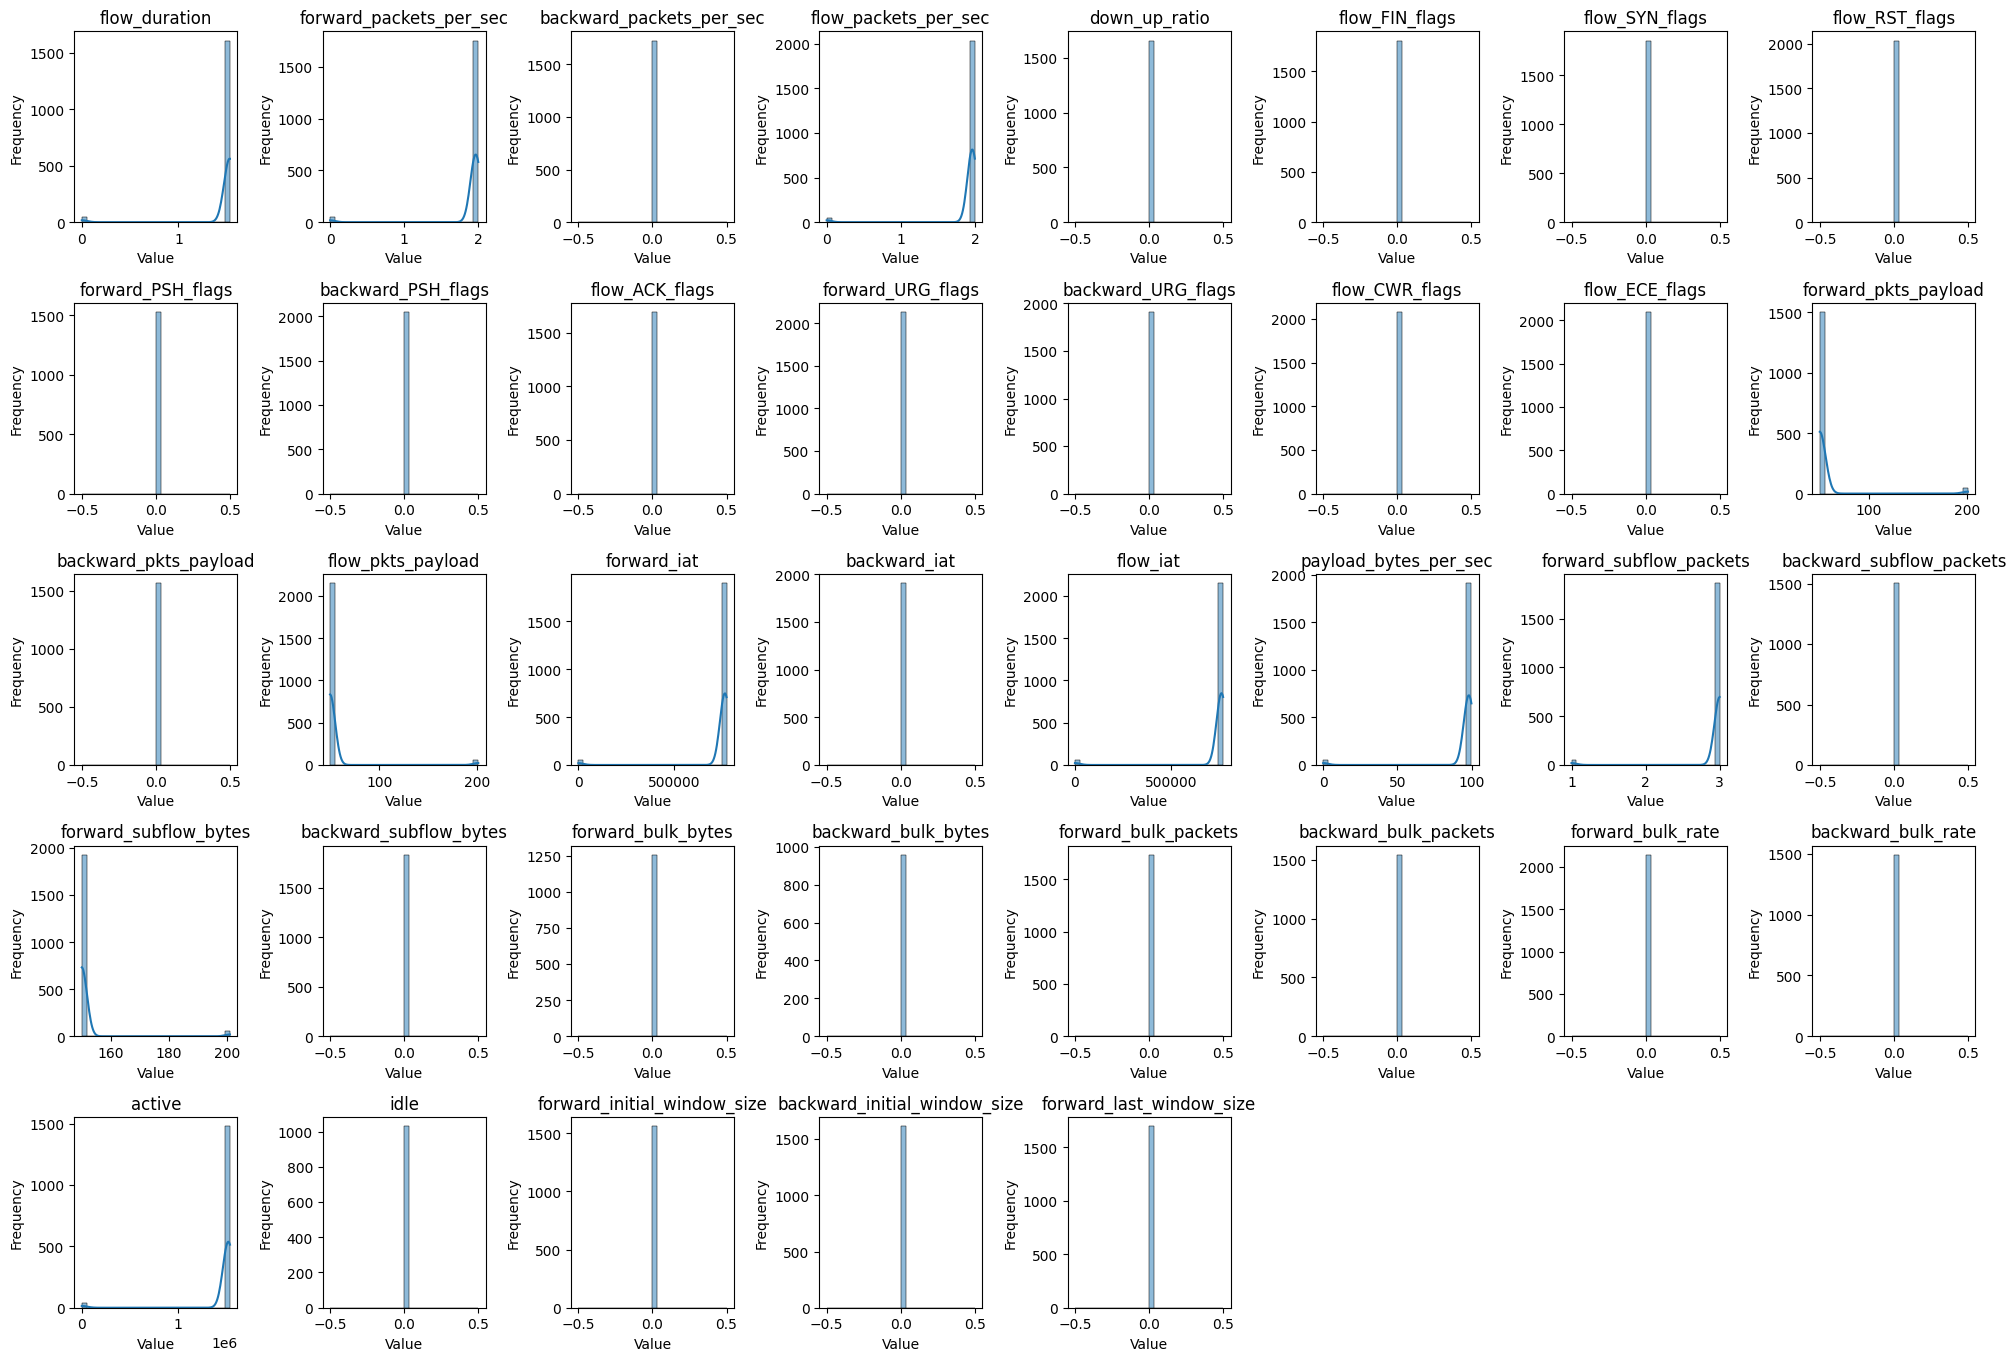

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = xmrigcc_data[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(xmrigcc_data[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analisis Port

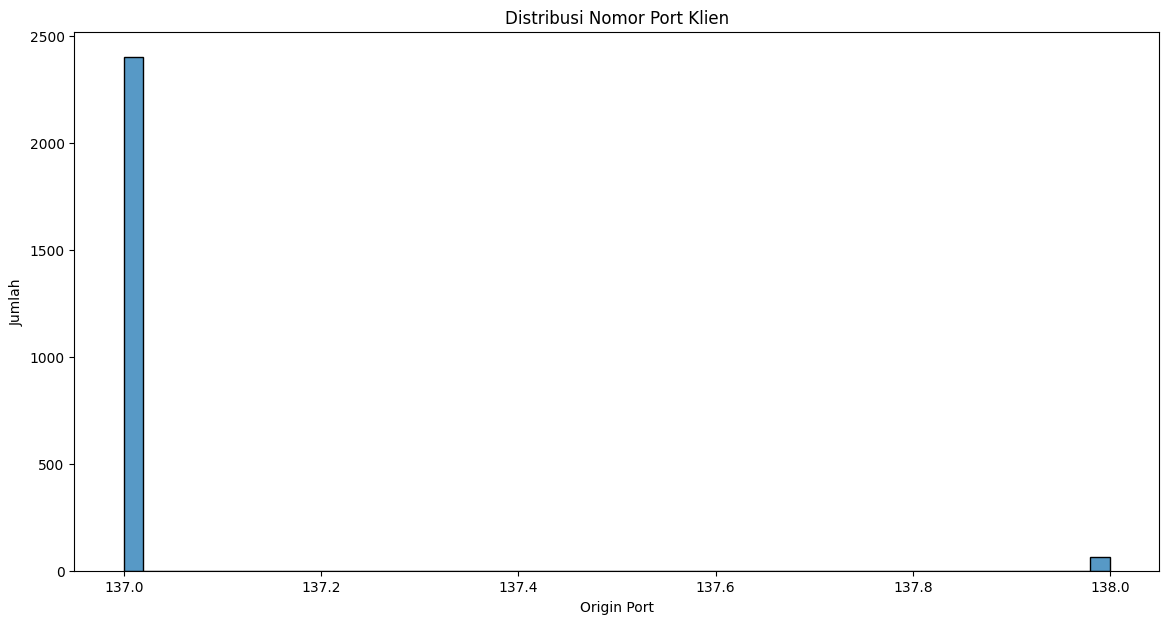

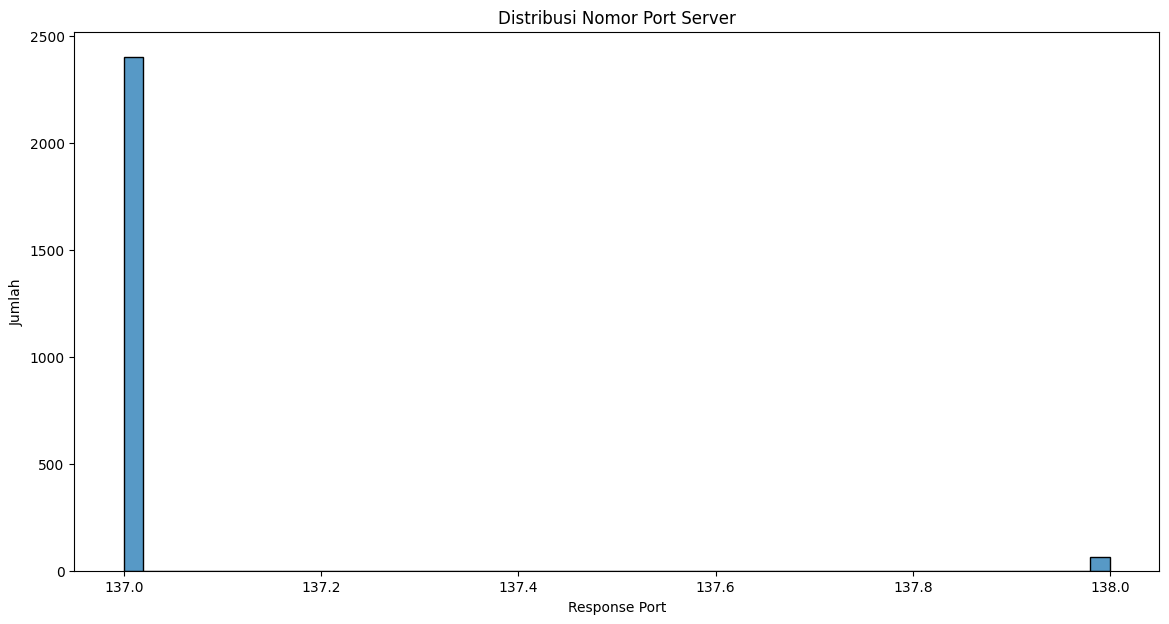

In [ ]:
# Analisis Origin Port
plt.figure(figsize=(14, 7))
sns.histplot(data=xmrigcc_data, x='origin_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Klien')
plt.xlabel('Origin Port')
plt.ylabel('Jumlah')
plt.show()

# Analisis Response Port
plt.figure(figsize=(14, 7))
sns.histplot(data=xmrigcc_data, x='response_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Server')
plt.xlabel('Response Port')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
min_origin_port = xmrigcc_data['origin_port'].min()
max_origin_port = xmrigcc_data['origin_port'].max()

# Menampilkan hasil
print(f"Nilai minimum dari 'origin_port': {min_origin_port}")
print(f"Nilai maksimum dari 'origin_port': {max_origin_port}")

Nilai minimum dari 'origin_port': 137
Nilai maksimum dari 'origin_port': 138


### Nomor Unik IP Client dan Server

In [ ]:
# Menghitung jumlah nilai unik untuk origin_host dan response_host
unique_origin_hosts = xmrigcc_data['origin_host'].nunique()
unique_response_hosts = xmrigcc_data['response_host'].nunique()

# Menampilkan jumlah nilai unik
print(f"Jumlah nilai unik di origin_host: {unique_origin_hosts}")
print(f"Jumlah nilai unik di response_host: {unique_response_hosts}")

# Menampilkan nilai unik dan jumlah kemunculannya
print("\nNilai unik dan jumlah kemunculannya di origin_host:")
print(xmrigcc_data['origin_host'].value_counts())

print("\nNilai unik dan jumlah kemunculannya di response_host:")
print(xmrigcc_data['response_host'].value_counts())

Jumlah nilai unik di origin_host: 1
Jumlah nilai unik di response_host: 1

Nilai unik dan jumlah kemunculannya di origin_host:
origin_host
103.255.15.42    2464
Name: count, dtype: int64

Nilai unik dan jumlah kemunculannya di response_host:
response_host
103.255.15.255    2464
Name: count, dtype: int64


### Cleaning XMRIGCC CryptoMiner

##### Nomor Unik

In [ ]:
xmrigcc_data.describe(include = 'object').T

count unique                  top  freq
id             2464   2464   CsLPHW1EPeJUTU2CAa     1
origin_host    2464      1        103.255.15.42  2464
response_host  2464      1       103.255.15.255  2464
traffic        2464      1  XMRIGCC CryptoMiner  2464

##### Imputasi

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
xmrigcc_data[columns_to_impute] = imputer.fit_transform(xmrigcc_data[columns_to_impute])

<ipython-input-20-de3602b6870d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xmrigcc_data[columns_to_impute] = imputer.fit_transform(xmrigcc_data[columns_to_impute])


In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = xmrigcc_data.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (xmrigcc_data.isnull().sum() / len(xmrigcc_data)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

#### Data Bersih (1)

In [ ]:
xmrigcc_data.T

33                   195     \
id                             CsLPHW1EPeJUTU2CAa   CiigOC4WG6x0dhY9Mj   
origin_host                         103.255.15.42        103.255.15.42   
origin_port                                   137                  137   
response_host                      103.255.15.255       103.255.15.255   
response_port                                 137                  137   
flow_duration                            1.528768             1.528544   
forward_packets_per_sec                  1.962364             1.962652   
backward_packets_per_sec                      0.0                  0.0   
flow_packets_per_sec                     1.962364             1.962652   
down_up_ratio                                 0.0                  0.0   
flow_FIN_flags                                0.0                  0.0   
flow_SYN_flags                                0.0                  0.0   
flow_RST_flags                                0.0                  0.0   
forward_PSH_flags                             0.0                  0.0   
backward_PSH_flags                            0.0                  0.0   
flow_ACK_flags                                0.0                  0.0   
forward_URG_flags                             0.0                  0.0   
backward_URG_flags                            0.0                  0.0   
flow_CWR_flags                                0.0                  0.0   
flow_ECE_flags                                0.0                  0.0   
forward_pkts_payload                         50.0                 50.0   
backward_pkts_payload                         0.0                  0.0   
flow_pkts_payload                            50.0                 50.0   
forward_iat                         764384.031296        764272.093773   
backward_iat                                  0.0                  0.0   
flow_iat                            764384.031296        764272.093773   
payload_bytes_per_sec                   98.118219            98.128304   
forward_subflow_packets                       3.0                  3.0   
backward_subflow_packets                      0.0                  0.0   
forward_subflow_bytes                       150.0                150.0   
backward_subflow_bytes                        0.0                  0.0   
forward_bulk_bytes                            0.0                  0.0   
backward_bulk_bytes                           0.0                  0.0   
forward_bulk_packets                          0.0                  0.0   
backward_bulk_packets                         0.0                  0.0   
forward_bulk_rate                             0.0                  0.0   
backward_bulk_rate                            0.0                  0.0   
active                             1528606.176376       1528544.187546   
idle                                          0.0                  0.0   
forward_initial_window_size                   0.0                  0.0   
backward_initial_window_size                  0.0                  0.0   
forward_last_window_size                      0.0                  0.0   
traffic                       XMRIGCC CryptoMiner  XMRIGCC CryptoMiner   

                                           307                  308     \
id                             C8N6At1Y7m58t96le6   CIH6aX3uLYvgftQof8   
origin_host                         103.255.15.42        103.255.15.42   
origin_port                                   137                  137   
response_host                      103.255.15.255       103.255.15.255   
response_port                                 137                  137   
flow_duration                            1.528652             1.528358   
forward_packets_per_sec                  1.962513             1.962566   
backward_packets_per_sec                      0.0                  0.0   
flow_packets_per_sec                     1.962566             1.962891   
down_up_ratio                                 

In [ ]:
# Menghitung jumlah nilai 0 pada setiap kolom
zero_counts = (xmrigcc_data == 0).sum()

# Menghitung persentase nilai 0 pada setiap kolom
zero_percentages = (zero_counts / xmrigcc_data.shape[0]) * 100

# Menampilkan jumlah dan persentase nilai 0 pada setiap kolom
result = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage (%)': zero_percentages
})

print(result)

                              Zero Count  Zero Percentage (%)
id                                     0             0.000000
origin_host                            0             0.000000
origin_port                            0             0.000000
response_host                          0             0.000000
response_port                          0             0.000000
flow_duration                         48             1.948052
forward_packets_per_sec               49             1.988636
backward_packets_per_sec            2464           100.000000
flow_packets_per_sec                  52             2.110390
down_up_ratio                       2464           100.000000
flow_FIN_flags                      2464           100.000000
flow_SYN_flags                      2464           100.000000
flow_RST_flags                      2464           100.000000
forward_PSH_flags                   2464           100.000000
backward_PSH_flags                  2464           100.000000
flow_ACK

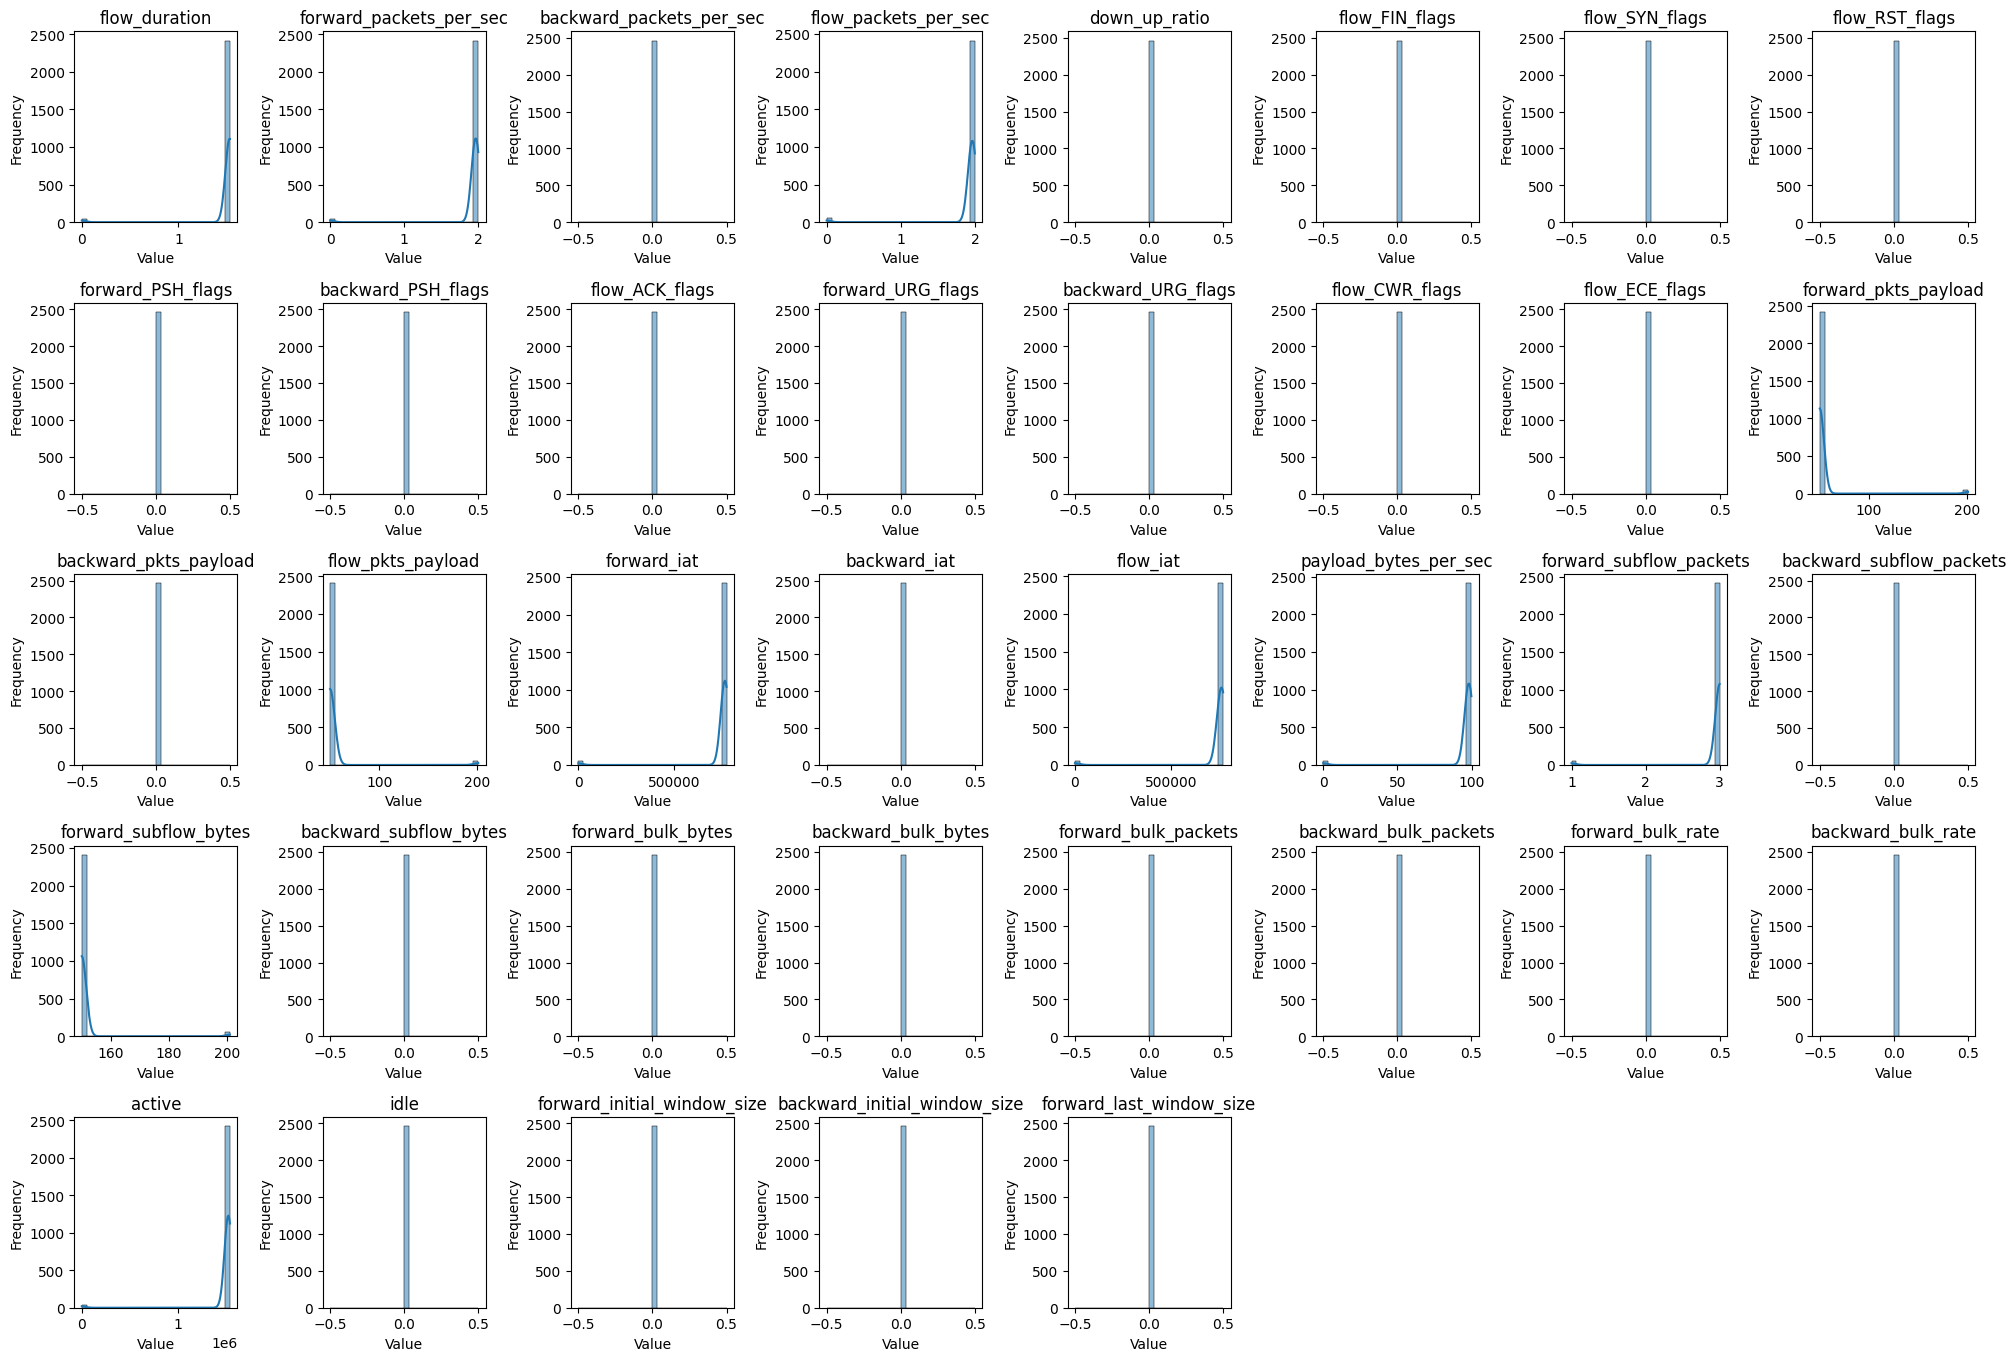

In [ ]:
# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(xmrigcc_data[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
xmrigcc_data

id    origin_host  origin_port   response_host  \
33      CsLPHW1EPeJUTU2CAa  103.255.15.42          137  103.255.15.255   
195     CiigOC4WG6x0dhY9Mj  103.255.15.42          137  103.255.15.255   
307     C8N6At1Y7m58t96le6  103.255.15.42          137  103.255.15.255   
308     CIH6aX3uLYvgftQof8  103.255.15.42          137  103.255.15.255   
455      C1aIXrX8UXbbhWhTc  103.255.15.42          137  103.255.15.255   
...                    ...            ...          ...             ...   
416017   CgH84TM4cROHrc8Ka  103.255.15.42          137  103.255.15.255   
416064  CTSajc1dhzB8UVchHi  103.255.15.42          138  103.255.15.255   
416161  CIGSxl3TCgf3lAON89  103.255.15.42          137  103.255.15.255   
416175  CKISIG2VvfTlCeGGTg  103.255.15.42          137  103.255.15.255   
416424   CjC1QW8icvFwPfob2  103.255.15.42          137  103.255.15.255   

        response_port  flow_duration  forward_packets_per_sec  \
33                137       1.528768                 1.962364   
195               137       1.528544                 1.962652   
307               137       1.528652                 1.962513   
308               137       1.528358                 1.962566   
455               137       1.528613                 1.962563   
...               ...            ...                      ...   
416017            137       1.528529                 1.962671   
416064            138       0.000000                 0.000000   
416161            137       1.528666                 1.962495   
416175            137       1.528644                 1.962524   
416424            137       1.528624                 1.962549   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
33                           0.0              1.962364            0.0  ...   
195                          0.0              1.962652            0.0  ...   
307                          0.0              1.962566            0.0  ...   
308                          0.0              1.962891            0.0  ...   
455                          0.0              1.962563            0.0  ...   
...                          ...                   ...            ...  ...   
416017                       0.0              1.962671            0.0  ...   
416064                       0.0              0.000000            0.0  ...   
416161                       0.0              1.962566            0.0  ...   
416175                       0.0              1.962524            0.0  ...   
416424                       0.0              1.962549            0.0  ...   

        forward_bulk_packets  backward_bulk_packets  forward_bulk_rate  \
33                       0.0                    0.0                0.0   
195                      0.0                    0.0                0.0   
307                      0.0                    0.0                0.0   
308                      0.0                    0.0                0.0   
455                      0.0                    0.0                0.0   
...                      ...                    ...                ...   
416017                   0.0                    0.0                0.0   
416064                   0.0                    0.0                0.0   
416161                   0.0                    0.0                0.0   
416175                   0.0                    0.0                0.0   
416424                   0.0                    0.0                0.0   

        backward_bulk_rate        active  idle  forward_initial_window_size  \
33                     0.0  1.528606e+06   0.0                          0.0   
195                    0.0  1.528544e+06   0.0                          0.0   
307                    0.0  1.528652e+06   0.0                          0.0   
308                    0.0  1.528606e+06   0.0                          0.0   
455                    0.0  1.528613e+06   0.0                          0.0   
...                    ...           ...   ...        

## Probing
Aktivitas pemindaian atau penjelajahan untuk menemukan kerentanan atau target.

In [ ]:
probing_data.T

7                   28      \
id                            CE0eax4wzKi6EeAWc5  CY4xkq1a58KcTEgUic   
origin_host                       103.255.15.150      103.255.15.150   
origin_port                                59040               60804   
response_host                    128.199.242.104     128.199.242.104   
response_port                                443                 443   
flow_duration                           0.262003                 NaN   
forward_packets_per_sec                34.350759           41.990868   
backward_packets_per_sec                38.16751           54.588128   
flow_packets_per_sec                   72.518269           96.578995   
down_up_ratio                           1.111111                 NaN   
flow_FIN_flags                               NaN                 1.0   
flow_SYN_flags                               2.0                 2.0   
flow_RST_flags                               1.0                 NaN   
forward_PSH_flags                            3.0                 3.0   
backward_PSH_flags                           NaN                 NaN   
flow_ACK_flags                              18.0                 NaN   
forward_URG_flags                            0.0                 0.0   
backward_URG_flags                           0.0                 NaN   
flow_CWR_flags                               0.0                 0.0   
flow_ECE_flags                               0.0                 0.0   
forward_pkts_payload                         NaN                 NaN   
backward_pkts_payload                      411.2               637.0   
flow_pkts_payload                     256.894737          396.391304   
forward_iat                         32750.368118        26460.780038   
backward_iat                        25895.118713        17500.917117   
flow_iat                            14555.719164                 NaN   
payload_bytes_per_sec               18629.561591        38283.073989   
forward_subflow_packets                      9.0                10.0   
backward_subflow_packets                    10.0                13.0   
forward_subflow_bytes                      769.0               836.0   
backward_subflow_bytes                    4112.0              8281.0   
forward_bulk_bytes                           0.0                 0.0   
backward_bulk_bytes                          NaN              4585.0   
forward_bulk_packets                         NaN                 NaN   
backward_bulk_packets                        0.0                 5.0   
forward_bulk_rate                            NaN                 0.0   
backward_bulk_rate                           0.0      5010652.381449   
active                             262002.944946                 NaN   
idle                                         0.0                 NaN   
forward_initial_window_size              29200.0                 NaN   
backward_initial_window_size             65160.0             65160.0   
forward_last_window_size                   319.0               402.0   
traffic                                  Probing             Probing   

                                          34                 37      \
id                            CW7Vwt35Zbzh9lp1Z8  C1sQYy1OChOJgGDcF   
origin_host                       103.255.15.150     103.255.15.150   
origin_port                                41332              34370   
response_host                    128.199.242.104    128.199.242.104   
response_port                                443                443   
flow_duration                                NaN           0.240584   
forward_packets_per_sec                 33.66023            33.2524   
backward_packets_per_sec               44.880306                NaN   
flow_packets_per_sec                   78.540536          70.661351   
down_up_ratio                           1.333333              1.125   
flow_FIN_flags                               NaN                1.0   
flow_SYN_flags       

### Deskripsi Data

In [ ]:
probing_data.describe().transpose()

count          mean           std  \
origin_port                   17543.0  4.693996e+04  8.242779e+03   
response_port                 17543.0  4.430000e+02  0.000000e+00   
flow_duration                 12416.0  2.664172e+00  1.022775e+01   
forward_packets_per_sec       14188.0  3.434343e+01  8.320749e+00   
backward_packets_per_sec      10873.0  4.440429e+01  1.072416e+01   
flow_packets_per_sec          12638.0  7.884417e+01  1.867959e+01   
down_up_ratio                 15460.0  1.296955e+00  1.192990e-01   
flow_FIN_flags                12436.0  1.093358e+00  2.917732e-01   
flow_SYN_flags                13137.0  2.000076e+00  8.724728e-03   
flow_RST_flags                13403.0  1.098485e+00  3.014663e-01   
forward_PSH_flags             15775.0  4.330840e+01  1.932460e+02   
backward_PSH_flags            13436.0  4.949777e+01  2.002557e+02   
flow_ACK_flags                12469.0  1.094346e+02  4.032774e+02   
forward_URG_flags             15165.0  0.000000e+00  0.000000e+00   
backward_URG_flags            14017.0  0.000000e+00  0.000000e+00   
flow_CWR_flags                10997.0  0.000000e+00  0.000000e+00   
flow_ECE_flags                11176.0  0.000000e+00  0.000000e+00   
forward_pkts_payload          13772.0  1.008937e+02  4.152780e+01   
backward_pkts_payload         13311.0  5.868904e+02  1.211641e+02   
flow_pkts_payload             12162.0  3.765743e+02  6.222448e+01   
forward_iat                   14937.0  4.568982e+04  1.870559e+05   
backward_iat                  13100.0  3.815879e+04  2.305789e+05   
flow_iat                      11664.0  2.111386e+04  1.084497e+05   
payload_bytes_per_sec         11621.0  2.989122e+04  8.661089e+03   
forward_subflow_packets       15190.0  4.972227e+01  1.936906e+02   
backward_subflow_packets      11948.0  5.696767e+01  2.008987e+02   
forward_subflow_bytes         14543.0  1.035727e+04  4.640676e+04   
backward_subflow_bytes        14229.0  2.542795e+04  9.184844e+04   
forward_bulk_bytes            14214.0  0.000000e+00  0.000000e+00   
backward_bulk_bytes           10675.0  3.783285e+03  2.123253e+03   
forward_bulk_packets          12328.0  0.000000e+00  0.000000e+00   
backward_bulk_packets         14310.0  4.037945e+00  2.090723e+00   
forward_bulk_rate             14503.0  0.000000e+00  0.000000e+00   
backward_bulk_rate            14808.0  3.754611e+07  3.447228e+07   
active                        15387.0  2.178968e+06  8.655224e+06   
idle                          11433.0  2.183335e+05  2.593904e+06   
forward_initial_window_size   14738.0  2.920000e+04  0.000000e+00   
backward_initial_window_size  14112.0  6.516000e+04  0.000000e+00   
forward_last_window_size      12590.0  3.514344e+02  1.201434e+02   

                                        min           25%           50%  \
origin_port                    32768.000000  3.975800e+04  4.694400e+04   
response_port                    443.000000  4.430000e+02  4.430000e+02   
flow_duration                      0.127633  2.445610e-01  2.707470e-01   
forward_packets_per_sec            0.132865  3.026600e+01  3.514127e+01   
backward_packets_per_sec           0.250065  3.874994e+01  4.571751e+01   
flow_packets_per_sec               0.552004  6.962321e+01  8.110383e+01   
down_up_ratio                      0.777778  1.300000e+00  1.300000e+00   
flow_FIN_flags                     0.000000  1.000000e+00  1.000000e+00   
flow_SYN_flags                     2.000000  2.000000e+00  2.000000e+00   
flow_RST_flags                     0.000000  1.000000e+00  1.000000e+00   
forward_PSH_flags                  3.000000  3.000000e+00  3.000000e+00   
backward_PSH_flags                 2.000000  7.000000e+00  7.000000e+00   
flow_ACK_flags                    15.000000  2.000000e+01  2.200000e+01   
forward_URG_flags                  0.000000  0.000000e+00  0.000000e+00   
backward_URG_flags                 0.000000  0.000000e+00  0.000000e+00   
flow_CWR_flags                     0.000000  0.000000e+00  0.000000e+00

### Missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = probing_data.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (probing_data.isnull().sum() / len(probing_data)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                           5127   29.225332
forward_packets_per_sec                 3355   19.124437
backward_packets_per_sec                6670   38.020863
flow_packets_per_sec                    4905   27.959870
down_up_ratio                           2083   11.873682
flow_FIN_flags                          5107   29.111326
flow_SYN_flags                          4406   25.115431
flow_RST_flags                          4140   23.599156
forward_PSH_flags                       1768   10.078094
backward_PSH_flags                      4107   23.411047
flow_ACK_flags                          5074   28.923217
forward_URG_flags              

In [ ]:
# Menghitung jumlah baris train yang memiliki missing value setidaknya pada 1 kolom
rows_with_missing = probing_data.isnull().any(axis=1).sum()

# Menampilkan jumlah baris tersebut
print(f"Jumlah baris dengan missing value di setidaknya satu kolom: {rows_with_missing}")

Jumlah baris dengan missing value di setidaknya satu kolom: 17543


### Nilai 0 pada setiap kolom

In [ ]:
# Menghitung jumlah nilai 0 pada setiap kolom
zero_counts = (probing_data == 0).sum()

# Menghitung persentase nilai 0 pada setiap kolom
zero_percentages = (zero_counts / probing_data.shape[0]) * 100

# Menampilkan jumlah dan persentase nilai 0 pada setiap kolom
result = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage (%)': zero_percentages
})

print(result)

                              Zero Count  Zero Percentage (%)
id                                     0             0.000000
origin_host                            0             0.000000
origin_port                            0             0.000000
response_host                          0             0.000000
response_port                          0             0.000000
flow_duration                          0             0.000000
forward_packets_per_sec                0             0.000000
backward_packets_per_sec               0             0.000000
flow_packets_per_sec                   0             0.000000
down_up_ratio                          0             0.000000
flow_FIN_flags                         3             0.017101
flow_SYN_flags                         0             0.000000
flow_RST_flags                         4             0.022801
forward_PSH_flags                      0             0.000000
backward_PSH_flags                     0             0.000000
flow_ACK

In [ ]:
# Drop kolom target 'traffic' dan kolom non-numerik
numeric_df = probing_data.drop(['traffic'], axis=1).select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Menampilkan matriks korelasi
correlation_matrix

origin_port  response_port  flow_duration  \
origin_port                      1.000000            NaN       0.004031   
response_port                         NaN            NaN            NaN   
flow_duration                    0.004031            NaN       1.000000   
forward_packets_per_sec          0.014853            NaN      -0.464905   
backward_packets_per_sec         0.005550            NaN      -0.548556   
flow_packets_per_sec             0.013250            NaN      -0.521289   
down_up_ratio                   -0.012168            NaN      -0.351500   
flow_FIN_flags                  -0.004917            NaN       0.724397   
flow_SYN_flags                  -0.012995            NaN      -0.001457   
flow_RST_flags                   0.003616            NaN       0.705245   
forward_PSH_flags                0.006059            NaN       0.888181   
backward_PSH_flags               0.003583            NaN       0.899931   
flow_ACK_flags                   0.005704            NaN       0.892634   
forward_URG_flags                     NaN            NaN            NaN   
backward_URG_flags                    NaN            NaN            NaN   
flow_CWR_flags                        NaN            NaN            NaN   
flow_ECE_flags                        NaN            NaN            NaN   
forward_pkts_payload            -0.002101            NaN       0.701734   
backward_pkts_payload            0.001740            NaN      -0.322908   
flow_pkts_payload                0.004811            NaN      -0.196132   
forward_iat                      0.002987            NaN       0.359505   
backward_iat                     0.007376            NaN       0.364748   
flow_iat                         0.007391            NaN       0.390665   
payload_bytes_per_sec            0.007164            NaN      -0.469965   
forward_subflow_packets          0.007325            NaN       0.871136   
backward_subflow_packets         0.004147            NaN       0.876752   
forward_subflow_bytes            0.000987            NaN       0.866265   
backward_subflow_bytes           0.002721            NaN       0.858547   
forward_bulk_bytes                    NaN            NaN            NaN   
backward_bulk_bytes              0.002178            NaN      -0.207295   
forward_bulk_packets                  NaN            NaN            NaN   
backward_bulk_packets           -0.012810            NaN      -0.279608   
forward_bulk_rate                     NaN            NaN            NaN   
backward_bulk_rate              -0.016204            NaN      -0.251414   
active                          -0.001656            NaN       0.878810   
idle                             0.012381            NaN       0.464497   
forward_initial_window_size           NaN            NaN            NaN   
backward_initial_window_size          NaN            NaN            NaN   
forward_last_window_size        -0.010151            NaN      -0.681532   

                              forward_packets_per_sec  \
origin_port                                  0.014853   
response_port                                     NaN   
flow_duration                               -0.464905   
forward_packets_per_sec                      1.000000   
backward_packets_per_sec                     0.945404   
flow_packets_per_sec                         0.982485   
down_up_ratio                               -0.083378   
flow_FIN_flags                              -0.622418   
flow_SYN_flags                                    NaN   
flow_RST_flags                              -0.589914   
forward_PSH_flags                           -0.329903   
backward_PSH_flags                          -0.336295   
flow_ACK_flags                              -0.353991   
forward_URG_flags                                 NaN   
backward_URG_flags                                NaN   
flow_CWR_flags                                    NaN   
flow_ECE_flags                                    NaN   
for

### Pesebaran Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count   12416.000000             14188.000000              10873.000000   
mean        2.664172                34.343432                 44.404287   
std        10.227754                 8.320749                 10.724159   
min         0.127633                 0.132865                  0.250065   
25%         0.244561                30.266002                 38.749935   
50%         0.270747                35.141265                 45.717513   
75%         0.311646                38.799081                 50.645918   
max       138.095687                75.649240                 93.328481   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count          12638.000000   15460.000000    12436.000000    13137.000000   
mean              78.844169       1.296955        1.093358        2.000076   
std               18.679588       0.119299        0.291773        0.008725   
min         

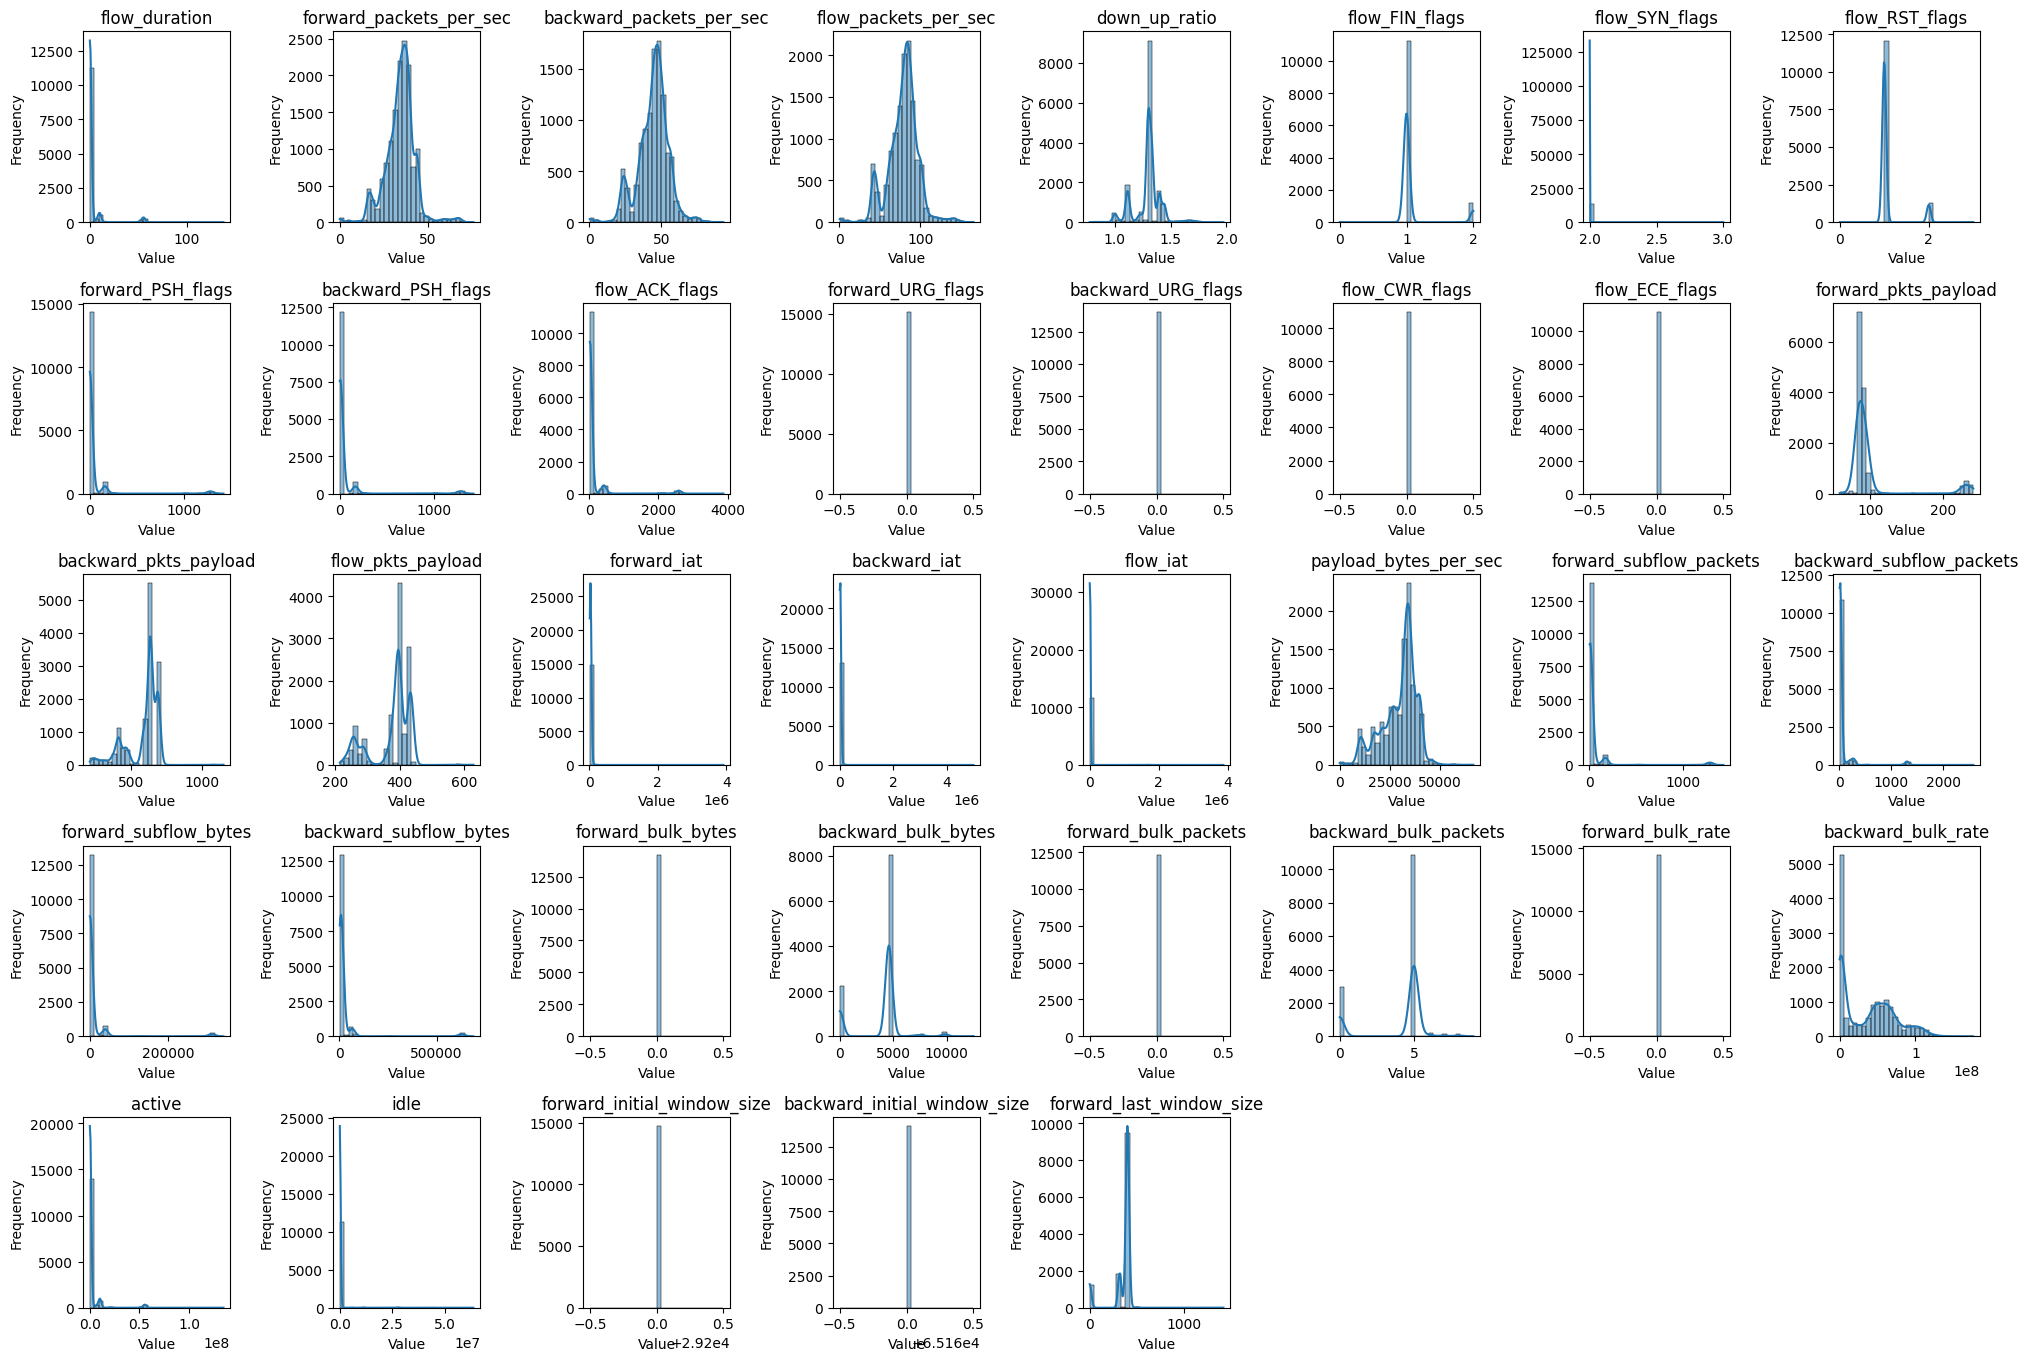

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = probing_data[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(probing_data[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analisis Port

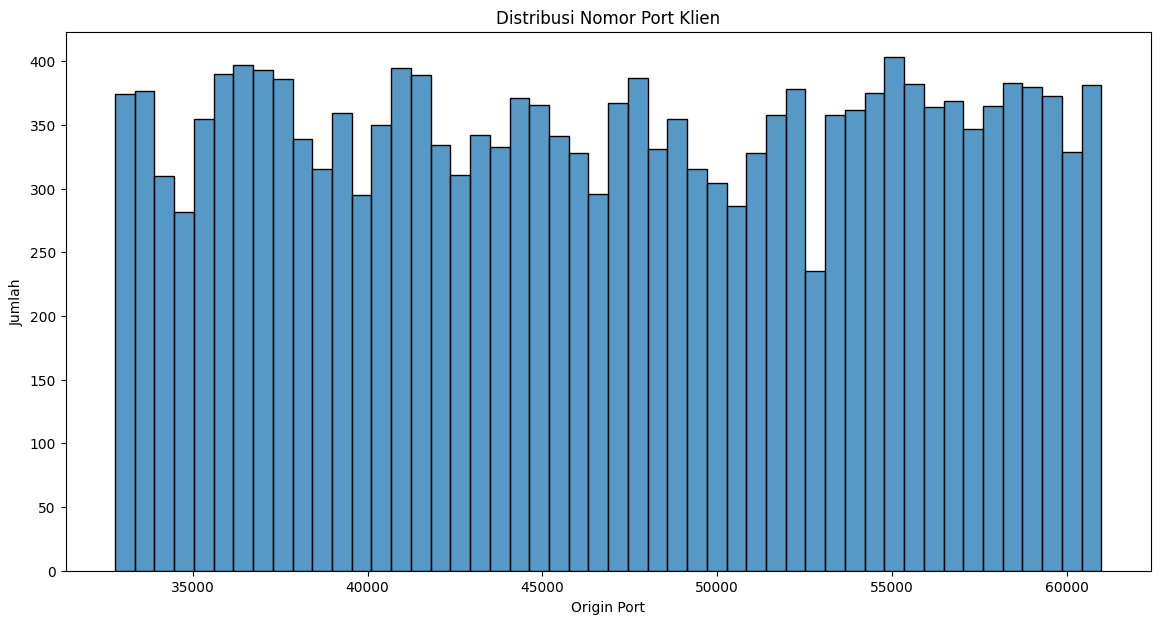

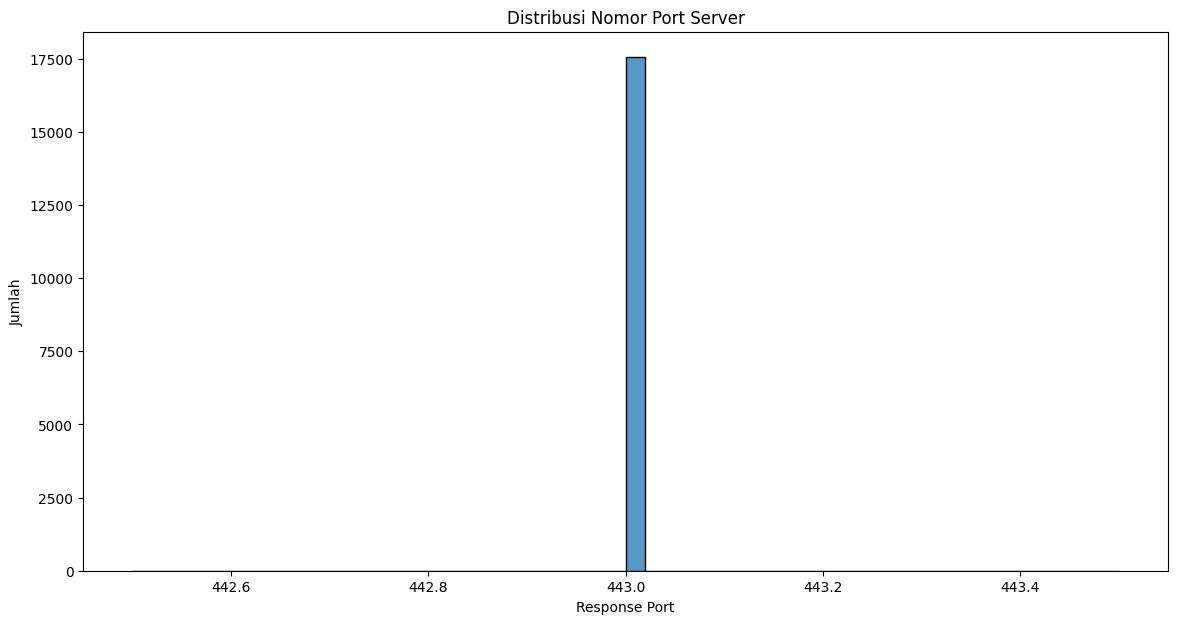

In [ ]:
# Analisis Origin Port
plt.figure(figsize=(14, 7))
sns.histplot(data=probing_data, x='origin_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Klien')
plt.xlabel('Origin Port')
plt.ylabel('Jumlah')
plt.show()

# Analisis Response Port
plt.figure(figsize=(14, 7))
sns.histplot(data=probing_data, x='response_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Server')
plt.xlabel('Response Port')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
min_origin_port = probing_data['origin_port'].min()
max_origin_port = probing_data['origin_port'].max()

# Menampilkan hasil
print(f"Nilai minimum dari 'origin_port': {min_origin_port}")
print(f"Nilai maksimum dari 'origin_port': {max_origin_port}")

Nilai minimum dari 'origin_port': 32768
Nilai maksimum dari 'origin_port': 60996


### Nomor Unik IP Client dan Server

In [ ]:
# Menghitung jumlah nilai unik untuk origin_host dan response_host
unique_origin_hosts = probing_data['origin_host'].nunique()
unique_response_hosts = probing_data['response_host'].nunique()

# Menampilkan jumlah nilai unik
print(f"Jumlah nilai unik di origin_host: {unique_origin_hosts}")
print(f"Jumlah nilai unik di response_host: {unique_response_hosts}")

# Menampilkan nilai unik dan jumlah kemunculannya
print("\nNilai unik dan jumlah kemunculannya di origin_host:")
print(probing_data['origin_host'].value_counts())

print("\nNilai unik dan jumlah kemunculannya di response_host:")
print(probing_data['response_host'].value_counts())

Jumlah nilai unik di origin_host: 1
Jumlah nilai unik di response_host: 1

Nilai unik dan jumlah kemunculannya di origin_host:
origin_host
103.255.15.150    17543
Name: count, dtype: int64

Nilai unik dan jumlah kemunculannya di response_host:
response_host
128.199.242.104    17543
Name: count, dtype: int64


### Cleaning Probing

##### Nomor Unik

In [ ]:
probing_data.describe(include = 'object').T

count unique                 top   freq
id             17543  17543  CE0eax4wzKi6EeAWc5      1
origin_host    17543      1      103.255.15.150  17543
response_host  17543      1     128.199.242.104  17543
traffic        17543      1             Probing  17543

##### Imputasi

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
probing_data[columns_to_impute] = imputer.fit_transform(probing_data[columns_to_impute])

<ipython-input-37-36c6cc18582a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probing_data[columns_to_impute] = imputer.fit_transform(probing_data[columns_to_impute])


In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = probing_data.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (probing_data.isnull().sum() / len(probing_data)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

#### Data Bersih (2)

In [ ]:
probing_data.T

7                   28      \
id                            CE0eax4wzKi6EeAWc5  CY4xkq1a58KcTEgUic   
origin_host                       103.255.15.150      103.255.15.150   
origin_port                                59040               60804   
response_host                    128.199.242.104     128.199.242.104   
response_port                                443                 443   
flow_duration                           0.262003            0.270747   
forward_packets_per_sec                34.350759           41.990868   
backward_packets_per_sec                38.16751           54.588128   
flow_packets_per_sec                   72.518269           96.578995   
down_up_ratio                           1.111111                 1.3   
flow_FIN_flags                               1.0                 1.0   
flow_SYN_flags                               2.0                 2.0   
flow_RST_flags                               1.0                 1.0   
forward_PSH_flags                            3.0                 3.0   
backward_PSH_flags                           7.0                 7.0   
flow_ACK_flags                              18.0                22.0   
forward_URG_flags                            0.0                 0.0   
backward_URG_flags                           0.0                 0.0   
flow_CWR_flags                               0.0                 0.0   
flow_ECE_flags                               0.0                 0.0   
forward_pkts_payload                   85.444444           85.444444   
backward_pkts_payload                      411.2               637.0   
flow_pkts_payload                     256.894737          396.391304   
forward_iat                         32750.368118        26460.780038   
backward_iat                        25895.118713        17500.917117   
flow_iat                            14555.719164        12907.285103   
payload_bytes_per_sec               18629.561591        38283.073989   
forward_subflow_packets                      9.0                10.0   
backward_subflow_packets                    10.0                13.0   
forward_subflow_bytes                      769.0               836.0   
backward_subflow_bytes                    4112.0              8281.0   
forward_bulk_bytes                           0.0                 0.0   
backward_bulk_bytes                       4585.0              4585.0   
forward_bulk_packets                         0.0                 0.0   
backward_bulk_packets                        0.0                 5.0   
forward_bulk_rate                            0.0                 0.0   
backward_bulk_rate                           0.0      5010652.381449   
active                             262002.944946       270743.846893   
idle                                         0.0                 0.0   
forward_initial_window_size              29200.0             29200.0   
backward_initial_window_size             65160.0             65160.0   
forward_last_window_size                   319.0               402.0   
traffic                                  Probing             Probing   

                                          34                 37      \
id                            CW7Vwt35Zbzh9lp1Z8  C1sQYy1OChOJgGDcF   
origin_host                       103.255.15.150     103.255.15.150   
origin_port                                41332              34370   
response_host                    128.199.242.104    128.199.242.104   
response_port                                443                443   
flow_duration                           0.270747           0.240584   
forward_packets_per_sec                 33.66023            33.2524   
backward_packets_per_sec               44.880306          45.717513   
flow_packets_per_sec                   78.540536          70.661351   
down_up_ratio                           1.333333              1.125   
flow_FIN_flags                               1.0                1.0   
flow_SYN_flags       

In [ ]:
# Menghitung jumlah nilai 0 pada setiap kolom
zero_counts = (probing_data == 0).sum()

# Menghitung persentase nilai 0 pada setiap kolom
zero_percentages = (zero_counts / probing_data.shape[0]) * 100

# Menampilkan jumlah dan persentase nilai 0 pada setiap kolom
result = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage (%)': zero_percentages
})

print(result)

                              Zero Count  Zero Percentage (%)
id                                     0             0.000000
origin_host                            0             0.000000
origin_port                            0             0.000000
response_host                          0             0.000000
response_port                          0             0.000000
flow_duration                          0             0.000000
forward_packets_per_sec                0             0.000000
backward_packets_per_sec               0             0.000000
flow_packets_per_sec                   0             0.000000
down_up_ratio                          0             0.000000
flow_FIN_flags                         3             0.017101
flow_SYN_flags                         0             0.000000
flow_RST_flags                         4             0.022801
forward_PSH_flags                      0             0.000000
backward_PSH_flags                     0             0.000000
flow_ACK

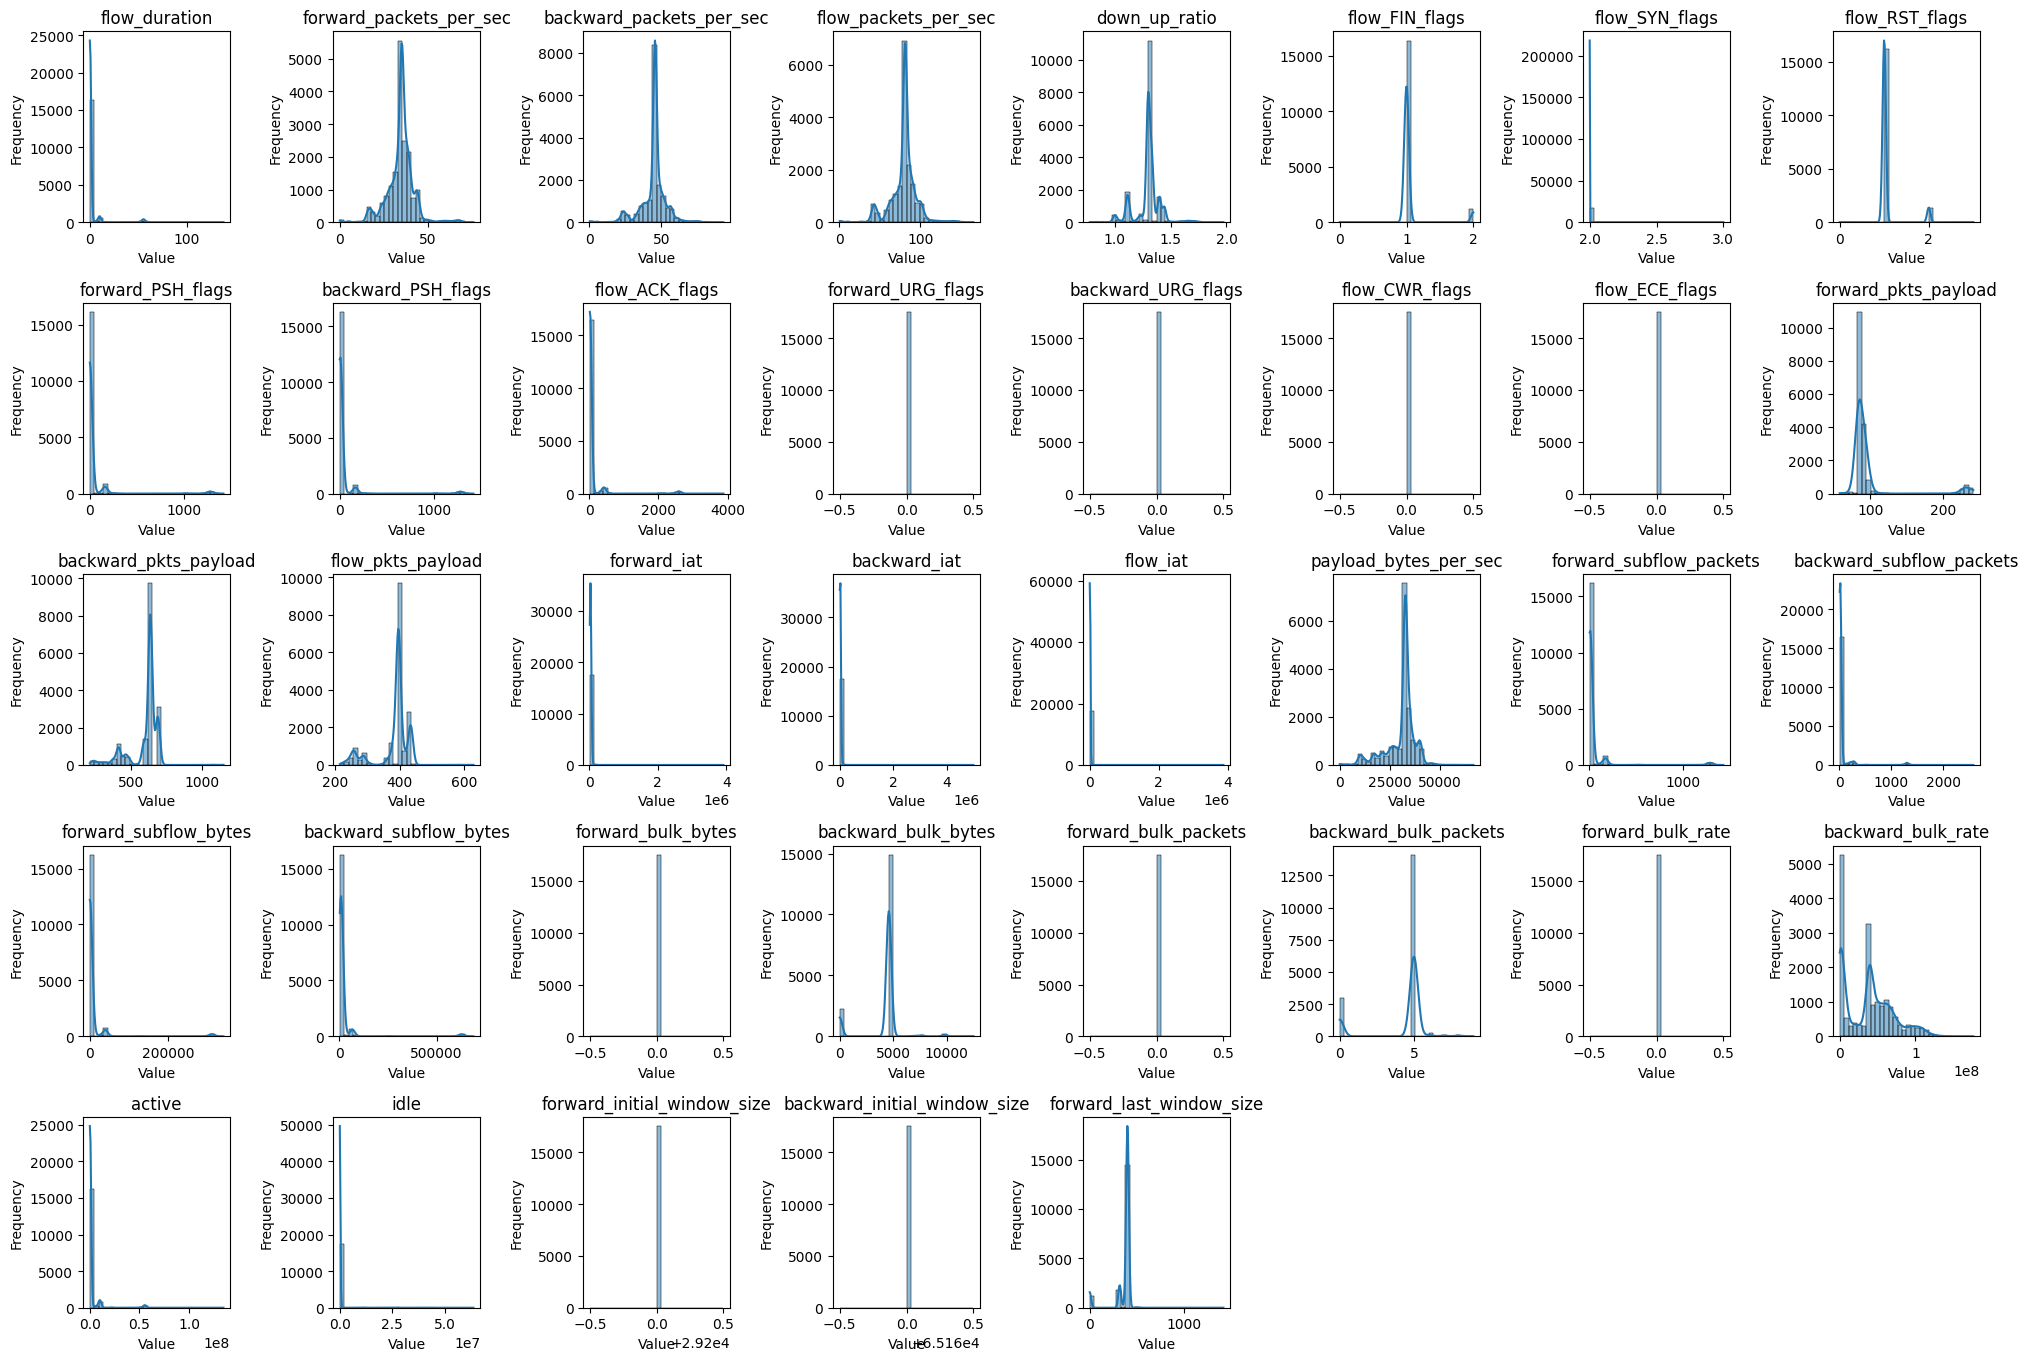

In [ ]:
# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(probing_data[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Brute force dan Bruteforce-XML (Akan digabung)
bruteforce_gabungan (ini dipake)

Serangan brute force yang menargetkan aplikasi berbasis XML.

**Brute force** adalah metode serangan yang mencoba berbagai kombinasi kata sandi, username, atau parameter lainnya secara otomatis untuk mendapatkan akses yang tidak sah atau untuk menemukan celah dalam sistem.

**XML (eXtensible Markup Language)** adalah bahasa markup yang digunakan untuk mendefinisikan data dalam format yang dapat dibaca manusia dan mesin. XML sering digunakan dalam komunikasi antara aplikasi, konfigurasi, dan penyimpanan data.

**"Bruteforce-XML"** adalah teknik di mana serangan brute force diterapkan pada aplikasi yang menggunakan XML. Ini biasanya melibatkan mencoba berbagai payload atau parameter XML untuk mengeksploitasi kelemahan dalam parser XML atau aplikasi yang memproses XML.

In [ ]:
# Misalkan df adalah dataframe asli Anda
bruteforce_data = df[df['traffic'] == 'Bruteforce']
bruteforce_xml_data = df[df['traffic'] == 'Bruteforce-XML']

# Menggabungkan kedua subset data menjadi satu dataframe
bruteforce_gabungan = pd.concat([bruteforce_data, bruteforce_xml_data], ignore_index=True)

In [ ]:
bruteforce_gabungan

id    origin_host  origin_port    response_host  \
0     CRs3K73Zbehf12mXnc  103.255.15.23        26637  128.199.242.104   
1     Cbr74P2pzITvWL4oE2  103.255.15.23        35758    128.199.88.81   
2      CSk4zJnMbuiB4Z7G1  103.255.15.23        51338    128.199.88.81   
3      CKk86BKP1xiWfOK9k  103.255.15.23        29783  128.199.242.104   
4     CaKoCA1luDf8AaQET3  103.255.15.23        64554  128.199.242.104   
...                  ...            ...          ...              ...   
8269  CtVANu2duD2b2eQTrg  103.255.15.23        13624  128.199.242.104   
8270  Cv4To219w7y26ubkuh  103.255.15.23        65108  128.199.242.104   
8271  CXVUG92SF2TdzUsXpa  103.255.15.23         3366  128.199.242.104   
8272  CLQX8P25lHJjsSGa2e  103.255.15.23        13692  128.199.242.104   
8273   CGxFa3txgPqmwWDFh  103.255.15.23         5192  128.199.242.104   

      response_port  flow_duration  forward_packets_per_sec  \
0               443       1.527901                35.997093   
1               443            NaN                 2.797462   
2               443            NaN                      NaN   
3               443            NaN                29.834255   
4               443       1.634812                32.419628   
...             ...            ...                      ...   
8269            443       9.073461                 1.542961   
8270            443      15.860036                 0.882722   
8271            443      15.930810                      NaN   
8272            443      13.903275                 1.006957   
8273            443            NaN                      NaN   

      backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                    35.342600             71.339693       0.981818  ...   
1                          NaN              4.615812       0.650000  ...   
2                     2.710377              6.023060       0.818182  ...   
3                          NaN             60.290056       1.020833  ...   
4                    31.196245                   NaN            NaN  ...   
...                        ...                   ...            ...  ...   
8269                  1.542961                   NaN            NaN  ...   
8270                  0.882722              1.765444            NaN  ...   
8271                  0.878800              1.757601            NaN  ...   
8272                  0.935031                   NaN            NaN  ...   
8273                       NaN             12.338441       0.928571  ...   

      forward_bulk_packets  backward_bulk_packets  forward_bulk_rate  \
0                      0.0                   20.0                0.0   
1                      0.0                    NaN                0.0   
2                      0.0                    NaN                0.0   
3                      NaN                    8.5                0.0   
4                      0.0                    9.0                0.0   
...                    ...                    ...                ...   
8269                   0.0                    0.0                0.0   
8270                   0.0                    NaN                0.0   
8271                   NaN                    NaN                0.0   
8272                   0.0                    0.0                0.0   
8273                   0.0                    0.0                0.0   

      backward_bulk_rate        active          idle  \
0           3.366416e+05           NaN  0.000000e+00   
1           0.000000e+00           NaN  5.003314e+06   
2           3.525646e+05  2.494300e+06  5.001715e+06   
3           1.458600e+06  1.608898e+06  0.000000e+00   
4                    NaN           NaN  0.000000e+00   
...                  ...           ...           ...   
8269        0.000000e+00           NaN           NaN   
8270        0.000000e+00  1.142726e+05  1.563151e+07   
8271                 NaN  1.135894e+05           NaN   
8272        0.000000e+00  2.485271e+05  1.340627e+

### Analisis Port

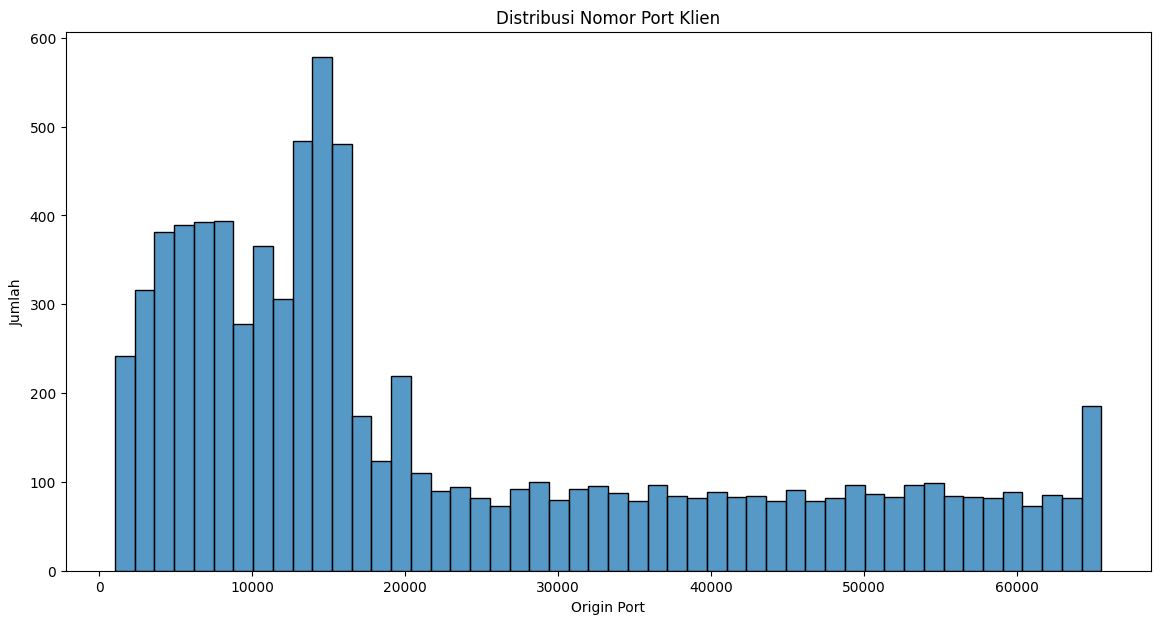

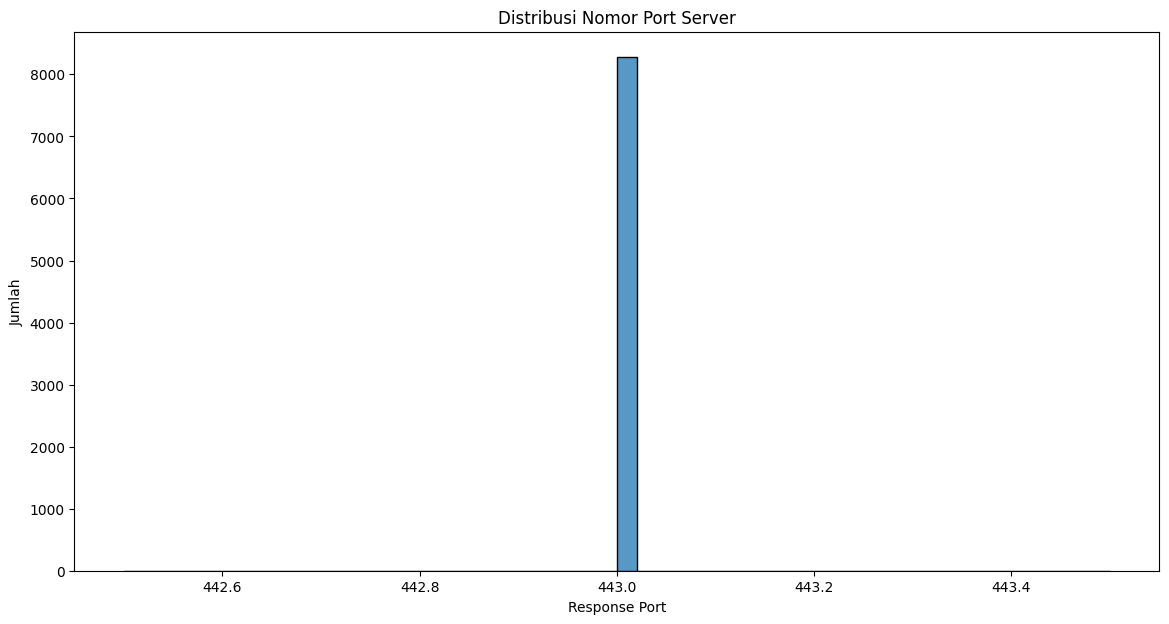

In [ ]:
# Analisis Origin Port
plt.figure(figsize=(14, 7))
sns.histplot(data=bruteforce_gabungan, x='origin_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Klien')
plt.xlabel('Origin Port')
plt.ylabel('Jumlah')
plt.show()

# Analisis Response Port
plt.figure(figsize=(14, 7))
sns.histplot(data=bruteforce_gabungan, x='response_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Server')
plt.xlabel('Response Port')
plt.ylabel('Jumlah')
plt.show()

### Pesebaran Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    3725.000000              6636.000000               5784.000000   
mean        8.198115                11.367211                  9.666857   
std         5.678622                14.203284                 13.756250   
min         0.216705                 0.000000                  0.000000   
25%         3.856726                 2.027465                  1.425620   
50%         6.867444                 3.352439                  2.393019   
75%        11.546246                22.568003                  9.524164   
max       118.191717                79.545904                 82.707704   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           5671.000000    5950.000000     6441.000000     4693.000000   
mean              20.569318       0.902965        2.023444        2.006819   
std               27.800394       0.120000        0.180346        0.089735   
min         

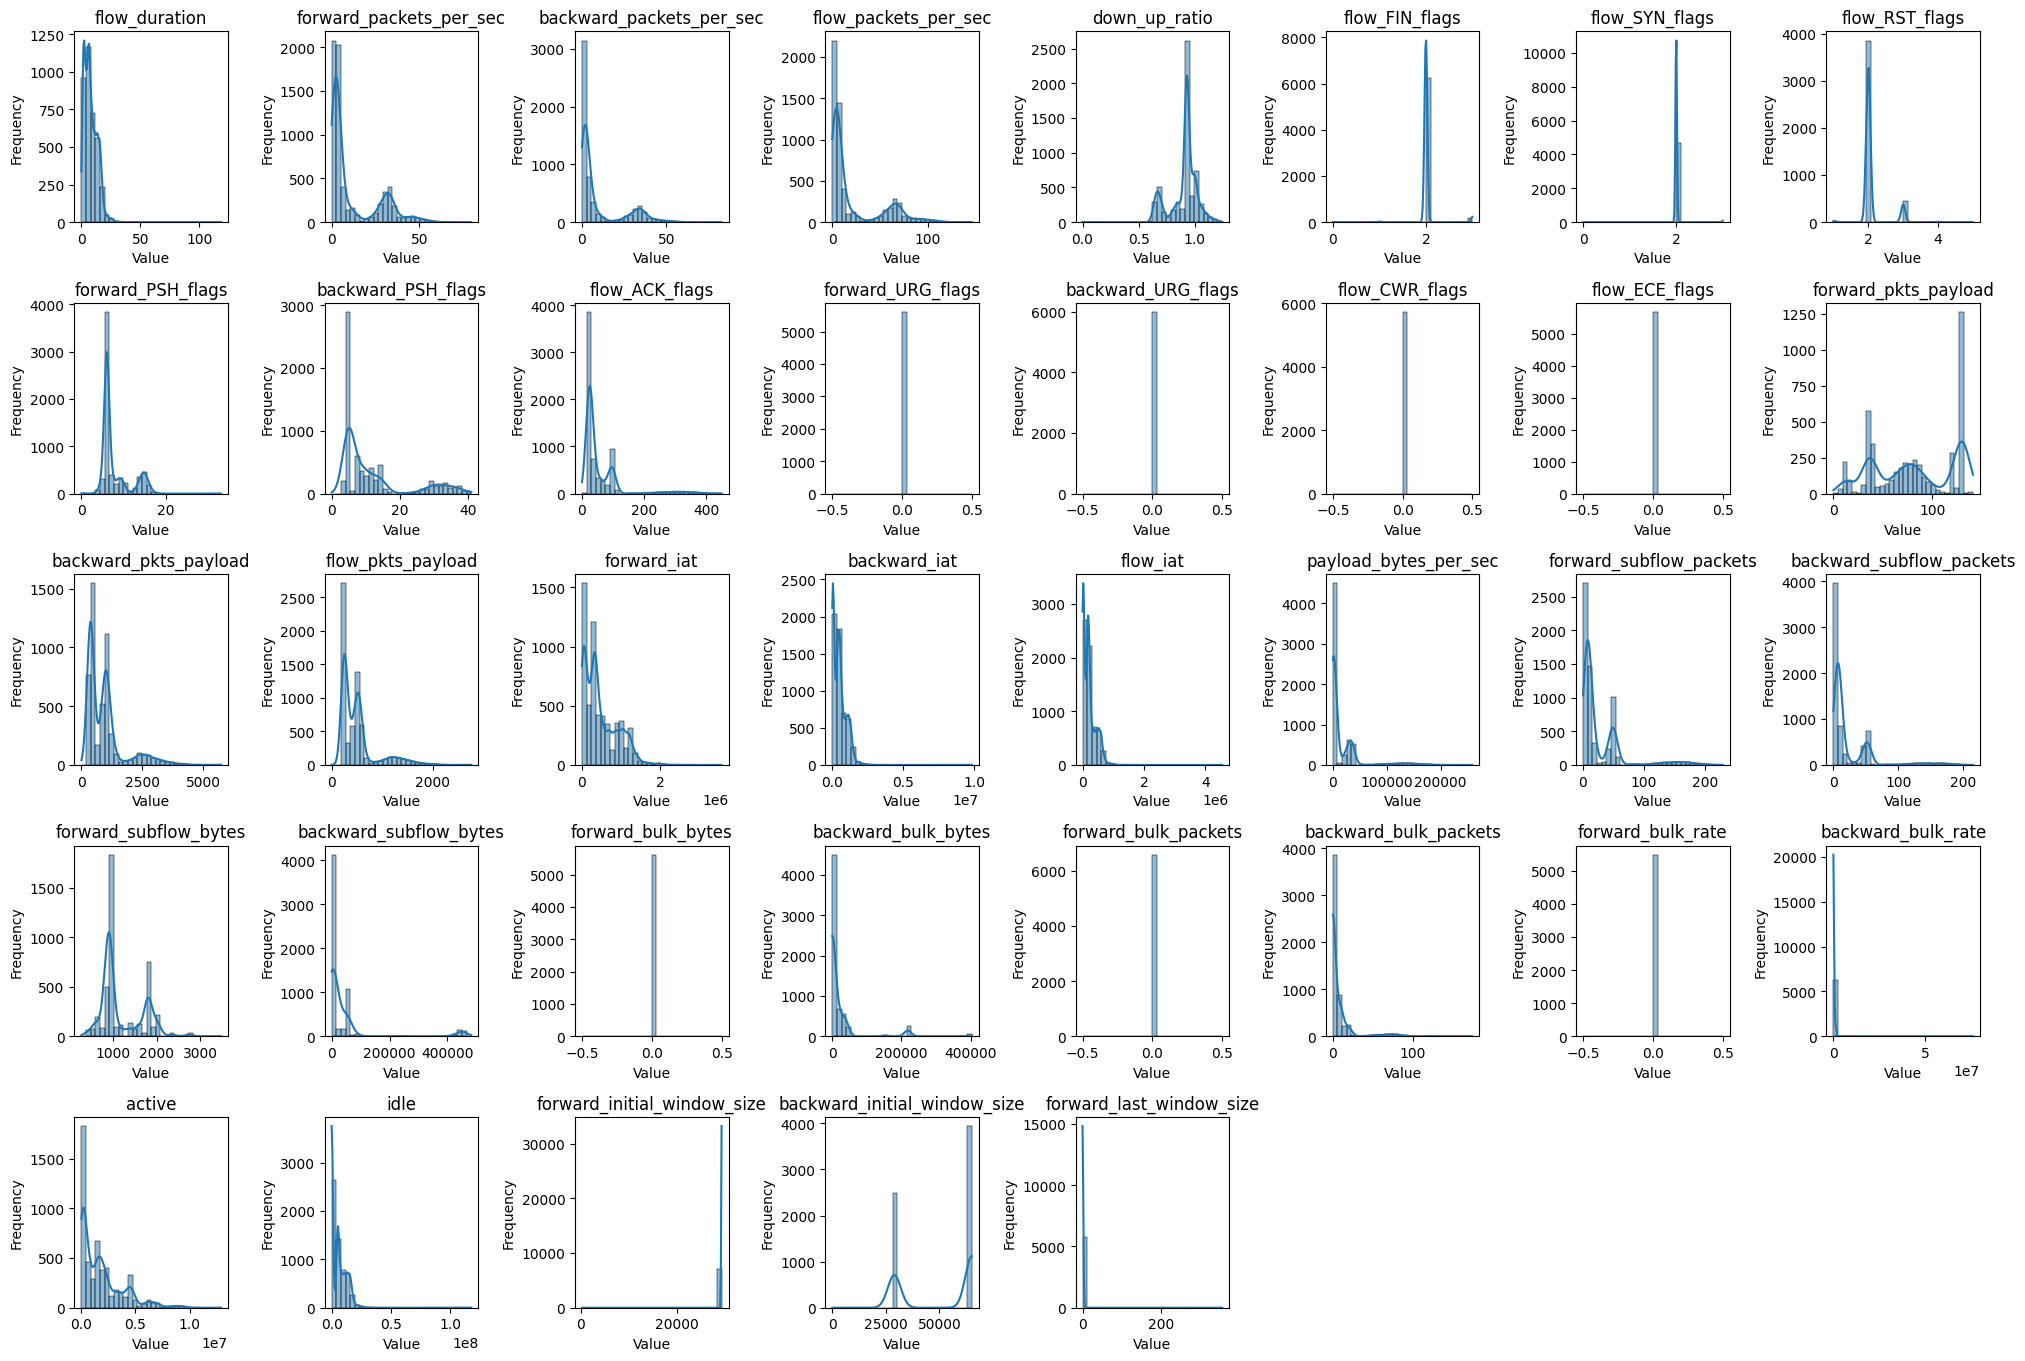

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = bruteforce_gabungan[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(bruteforce_gabungan[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Cek Missing Value Setelah Imputasi

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = bruteforce_gabungan.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (bruteforce_gabungan.isnull().sum() / len(bruteforce_gabungan)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                           4549   54.979454
forward_packets_per_sec                 1638   19.796954
backward_packets_per_sec                2490   30.094271
flow_packets_per_sec                    2603   31.459995
down_up_ratio                           2324   28.087986
flow_FIN_flags                          1833   22.153735
flow_SYN_flags                          3581   43.280155
flow_RST_flags                          3933   47.534445
forward_PSH_flags                       1676   20.256224
backward_PSH_flags                      1521   18.382886
flow_ACK_flags                          1486   17.959874
forward_URG_flags              

### Imputasi

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
bruteforce_gabungan[columns_to_impute] = imputer.fit_transform(bruteforce_gabungan[columns_to_impute])

### Pesebaran Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    8274.000000              8274.000000               8274.000000   
mean        7.466519                 9.780530                  7.477848   
std         3.867021                13.114571                 11.975428   
min         0.216705                 0.000000                  0.000000   
25%         6.867444                 2.642209                  1.893038   
50%         6.867444                 3.352439                  2.393019   
75%         6.867444                 9.287717                  3.360369   
max       118.191717                79.545904                 82.707704   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           8274.000000    8274.000000     8274.000000     8274.000000   
mean              15.930141       0.910157        2.018250        2.003868   
std               24.012174       0.102407        0.159416        0.067663   
min         

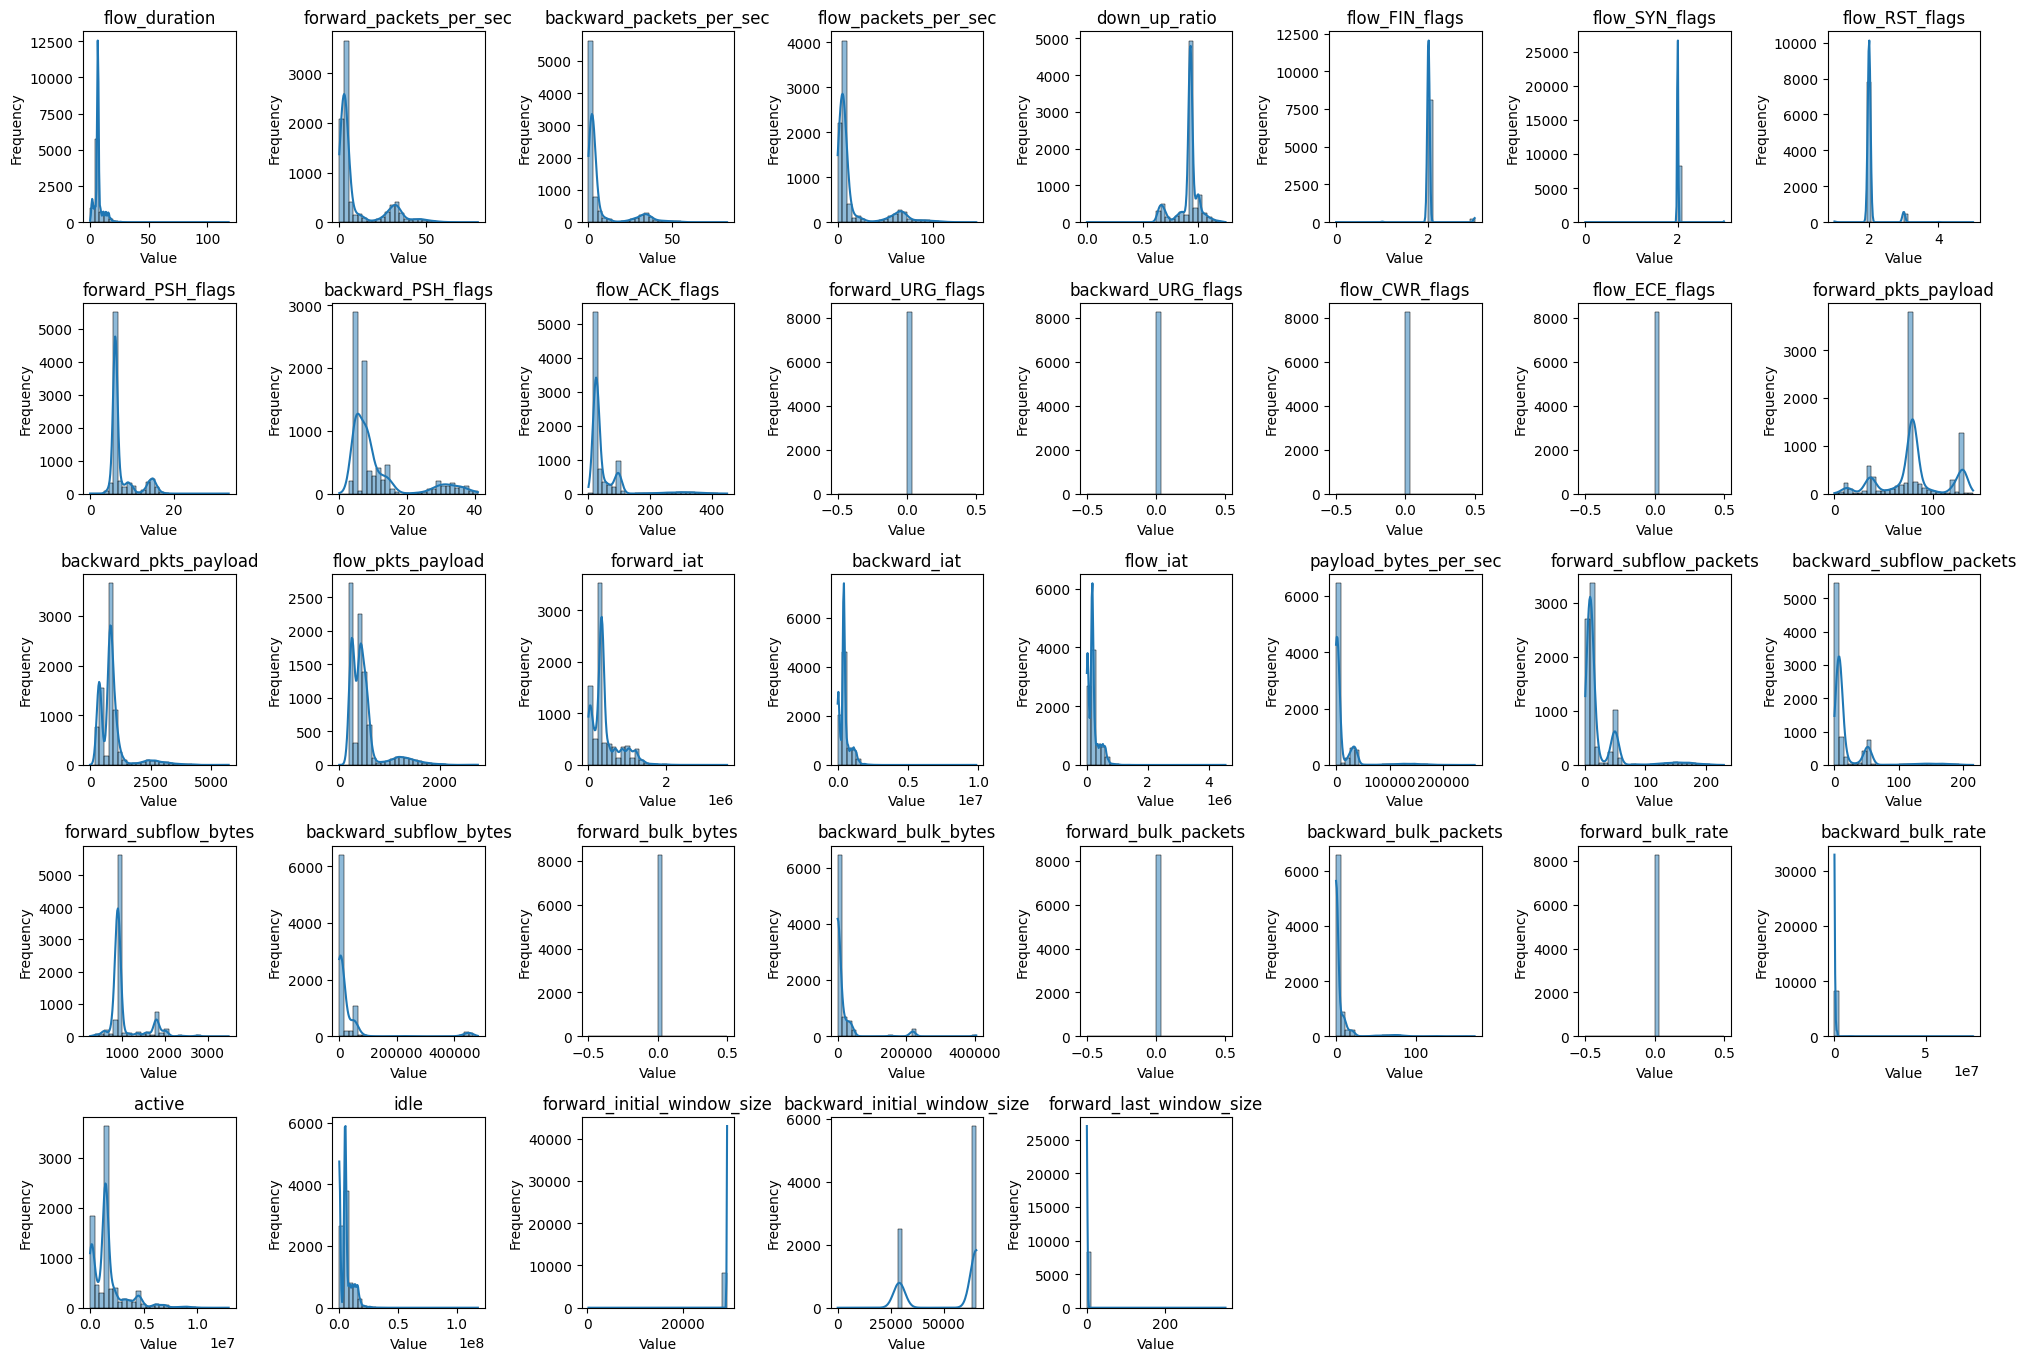

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = bruteforce_gabungan[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(bruteforce_gabungan[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Data Bersih (3)

In [ ]:
bruteforce_gabungan

id    origin_host  origin_port    response_host  \
0     CRs3K73Zbehf12mXnc  103.255.15.23        26637  128.199.242.104   
1     Cbr74P2pzITvWL4oE2  103.255.15.23        35758    128.199.88.81   
2      CSk4zJnMbuiB4Z7G1  103.255.15.23        51338    128.199.88.81   
3      CKk86BKP1xiWfOK9k  103.255.15.23        29783  128.199.242.104   
4     CaKoCA1luDf8AaQET3  103.255.15.23        64554  128.199.242.104   
...                  ...            ...          ...              ...   
8269  CtVANu2duD2b2eQTrg  103.255.15.23        13624  128.199.242.104   
8270  Cv4To219w7y26ubkuh  103.255.15.23        65108  128.199.242.104   
8271  CXVUG92SF2TdzUsXpa  103.255.15.23         3366  128.199.242.104   
8272  CLQX8P25lHJjsSGa2e  103.255.15.23        13692  128.199.242.104   
8273   CGxFa3txgPqmwWDFh  103.255.15.23         5192  128.199.242.104   

      response_port  flow_duration  forward_packets_per_sec  \
0               443       1.527901                35.997093   
1               443       6.867444                 2.797462   
2               443       6.867444                 3.352439   
3               443       6.867444                29.834255   
4               443       1.634812                32.419628   
...             ...            ...                      ...   
8269            443       9.073461                 1.542961   
8270            443      15.860036                 0.882722   
8271            443      15.930810                 3.352439   
8272            443      13.903275                 1.006957   
8273            443       6.867444                 3.352439   

      backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                    35.342600             71.339693       0.981818  ...   
1                     2.393019              4.615812       0.650000  ...   
2                     2.710377              6.023060       0.818182  ...   
3                     2.393019             60.290056       1.020833  ...   
4                    31.196245              5.823044       0.928571  ...   
...                        ...                   ...            ...  ...   
8269                  1.542961              5.823044       0.928571  ...   
8270                  0.882722              1.765444       0.928571  ...   
8271                  0.878800              1.757601       0.928571  ...   
8272                  0.935031              5.823044       0.928571  ...   
8273                  2.393019             12.338441       0.928571  ...   

      forward_bulk_packets  backward_bulk_packets  forward_bulk_rate  \
0                      0.0                   20.0                0.0   
1                      0.0                    0.0                0.0   
2                      0.0                    0.0                0.0   
3                      0.0                    8.5                0.0   
4                      0.0                    9.0                0.0   
...                    ...                    ...                ...   
8269                   0.0                    0.0                0.0   
8270                   0.0                    0.0                0.0   
8271                   0.0                    0.0                0.0   
8272                   0.0                    0.0                0.0   
8273                   0.0                    0.0                0.0   

      backward_bulk_rate        active          idle  \
0           3.366416e+05  1.422711e+06  0.000000e+00   
1           0.000000e+00  1.422711e+06  5.003314e+06   
2           3.525646e+05  2.494300e+06  5.001715e+06   
3           1.458600e+06  1.608898e+06  0.000000e+00   
4           0.000000e+00  1.422711e+06  0.000000e+00   
...                  ...           ...           ...   
8269        0.000000e+00  1.422711e+06  5.002765e+06   
8270        0.000000e+00  1.142726e+05  1.563151e+07   
8271        0.000000e+00  1.135894e+05  5.002765e+06   
8272        0.000000e+00  2.485271e+05  1.340627e+

In [ ]:
min_origin_port = bruteforce_gabungan['origin_port'].min()
max_origin_port = bruteforce_gabungan['origin_port'].max()

# Menampilkan hasil
print(f"Nilai minimum dari 'origin_port': {min_origin_port}")
print(f"Nilai maksimum dari 'origin_port': {max_origin_port}")

Nilai minimum dari 'origin_port': 1037
Nilai maksimum dari 'origin_port': 65524


## Benign + Background (Akan digabung)

In [ ]:
background_data = df[df['traffic'] == 'Background']
benign_data = df[df['traffic'] == 'Benign']

benback = pd.concat([background_data, benign_data], ignore_index=True)

In [ ]:
benback

id                origin_host  origin_port  \
0        CkwI1TlUCRApPfcJl              103.255.15.27        45314   
1       CBlrcc3dvtaHzyV4zj              103.255.15.27        45060   
2       CdpSX33u29yjDvnVzi              103.255.15.23         3440   
3       CfYEYl2acdfMxMSVwf              103.255.15.23        47062   
4       Cgibmv1Cqa5PqZe2be             142.252.253.26        27849   
...                    ...                        ...          ...   
388187   CHxNto9XwaCGCeir2             103.255.15.150        48914   
388188  CAIvFe4HsxjL5A4CIk             103.255.15.150        39751   
388189   CUxjxWgzdF71Y5kXc              103.255.15.23        59005   
388190  CUU9WM3olirlj8Absj              103.255.15.23         7978   
388191  ChiYNu2wqDXFBTzHV4  fe80::c1a7:7791:969e:3c06        55784   

             response_host  response_port  flow_duration  \
0            103.255.15.23          42001       0.000090   
1            103.255.15.23          42000       0.000033   
2             52.45.16.192            443      61.977190   
3                  8.8.8.8             53       0.027879   
4            103.255.15.23           3074       0.000000   
...                    ...            ...            ...   
388187             8.8.8.8             53            NaN   
388188             8.8.8.8             53       0.023767   
388189             8.8.8.8             53            NaN   
388190       128.199.88.81            443            NaN   
388191  2600:1901:0:38d7::             80       0.000000   

        forward_packets_per_sec  backward_packets_per_sec  \
0                  11125.474801                       NaN   
1                  30174.848921              30174.848921   
2                      0.322699                  0.242025   
3                     71.738585                       NaN   
4                      0.000000                  0.000000   
...                         ...                       ...   
388187                79.729009                 79.729009   
388188                84.150312                 84.150312   
388189                      NaN                 80.762198   
388190                46.391519                       NaN   
388191                 0.000000                  0.000000   

        flow_packets_per_sec  down_up_ratio  ...  forward_bulk_packets  \
0               22250.949602       1.000000  ...                   0.0   
1               60349.697842       1.000000  ...                   0.0   
2                   0.564724       0.750000  ...                   NaN   
3                        NaN       1.000000  ...                   NaN   
4                   0.000000       0.000000  ...                   0.0   
...                      ...            ...  ...                   ...   
388187            159.458019       1.000000  ...                   0.0   
388188            168.300624            NaN  ...                   NaN   
388189                   NaN       1.000000  ...                   0.0   
388190             90.658236       0.954198  ...                   NaN   
388191              0.000000            NaN  ...                   0.0   

        backward_bulk_packets  forward_bulk_rate  backward_bulk_rate  \
0                         0.0                NaN            0.000000   
1                         0.0                0.0            0.000000   
2                         0.0                NaN            0.000000   
3                         0.0                0.0            0.000000   
4                         0.0                NaN            0.000000   
...                       ...                ...                 ...   
388187                    0.0                NaN            0.000000   
388188                    0.0                0.0                 NaN   
388189                    0.0                NaN            0.000000   
388190                  113.0                0.0       226240.284573   
388191                    0.0                0.0

In [ ]:
# Mengecek nilai unik dan jumlah kemunculannya di kolom 'origin_host'
unique_origin_hosts = benback['origin_host'].value_counts()

# Menampilkan hasil
print("Nilai unik dari 'origin_host' dan jumlah kemunculannya:")
print(unique_origin_hosts)

Nilai unik dari 'origin_host' dan jumlah kemunculannya:
origin_host
103.255.15.23      151786
103.255.15.150     119340
103.255.15.27       43312
103.255.15.20       20189
103.255.15.67       10605
                    ...  
191.238.134.166         1
167.71.24.230           1
149.56.225.156          1
192.241.216.39          1
192.241.206.147         1
Name: count, Length: 2389, dtype: int64


In [ ]:
# Mengecek nilai unik dan jumlah kemunculannya di kolom 'origin_host'
unique_origin_hosts = benback['origin_host'].value_counts()

# Menyaring hasil untuk hanya menampilkan yang jumlahnya di atas 4000
filtered_hosts = unique_origin_hosts[unique_origin_hosts > 70]

# Menampilkan hasil
print("Nilai unik dari 'origin_host' dengan jumlah kemunculan di atas 4000:")
print(filtered_hosts)

Nilai unik dari 'origin_host' dengan jumlah kemunculan di atas 4000:
origin_host
103.255.15.23                151786
103.255.15.150               119340
103.255.15.27                 43312
103.255.15.20                 20189
103.255.15.67                 10605
fe80::c1a7:7791:969e:3c06      5834
103.255.15.21                  2441
103.255.15.42                  1921
0.0.0.0                        1811
142.252.253.26                 1794
24.212.41.209                  1646
103.255.15.146                 1367
202.169.224.219                1257
24.212.71.31                   1253
103.255.15.15                  1243
103.255.15.110                 1041
103.255.15.65                  1004
92.63.197.23                    961
103.255.15.206                  955
100.64.65.78                    947
103.255.15.124                  899
103.255.15.203                  896
103.255.15.40                   866
100.64.65.26                    849
103.210.35.245                  838
103.255.15.127     

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count  281613.000000            270453.000000             305852.000000   
mean       10.037211              1995.420445               1741.163492   
std       109.152570              5262.770201               4632.683255   
min         0.000000                 0.000000                  0.000000   
25%         0.000133                 3.618455                  3.372703   
50%         0.025523                40.508629                 44.877406   
75%         0.302249                81.383536                 80.645734   
max     17393.030600            223696.213333              88768.338624   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count         284325.000000  269788.000000   283742.000000   305777.000000   
mean            3559.499082       0.865951        0.509230        0.854966   
std             9584.094713       0.537885        0.813406        1.002316   
min         

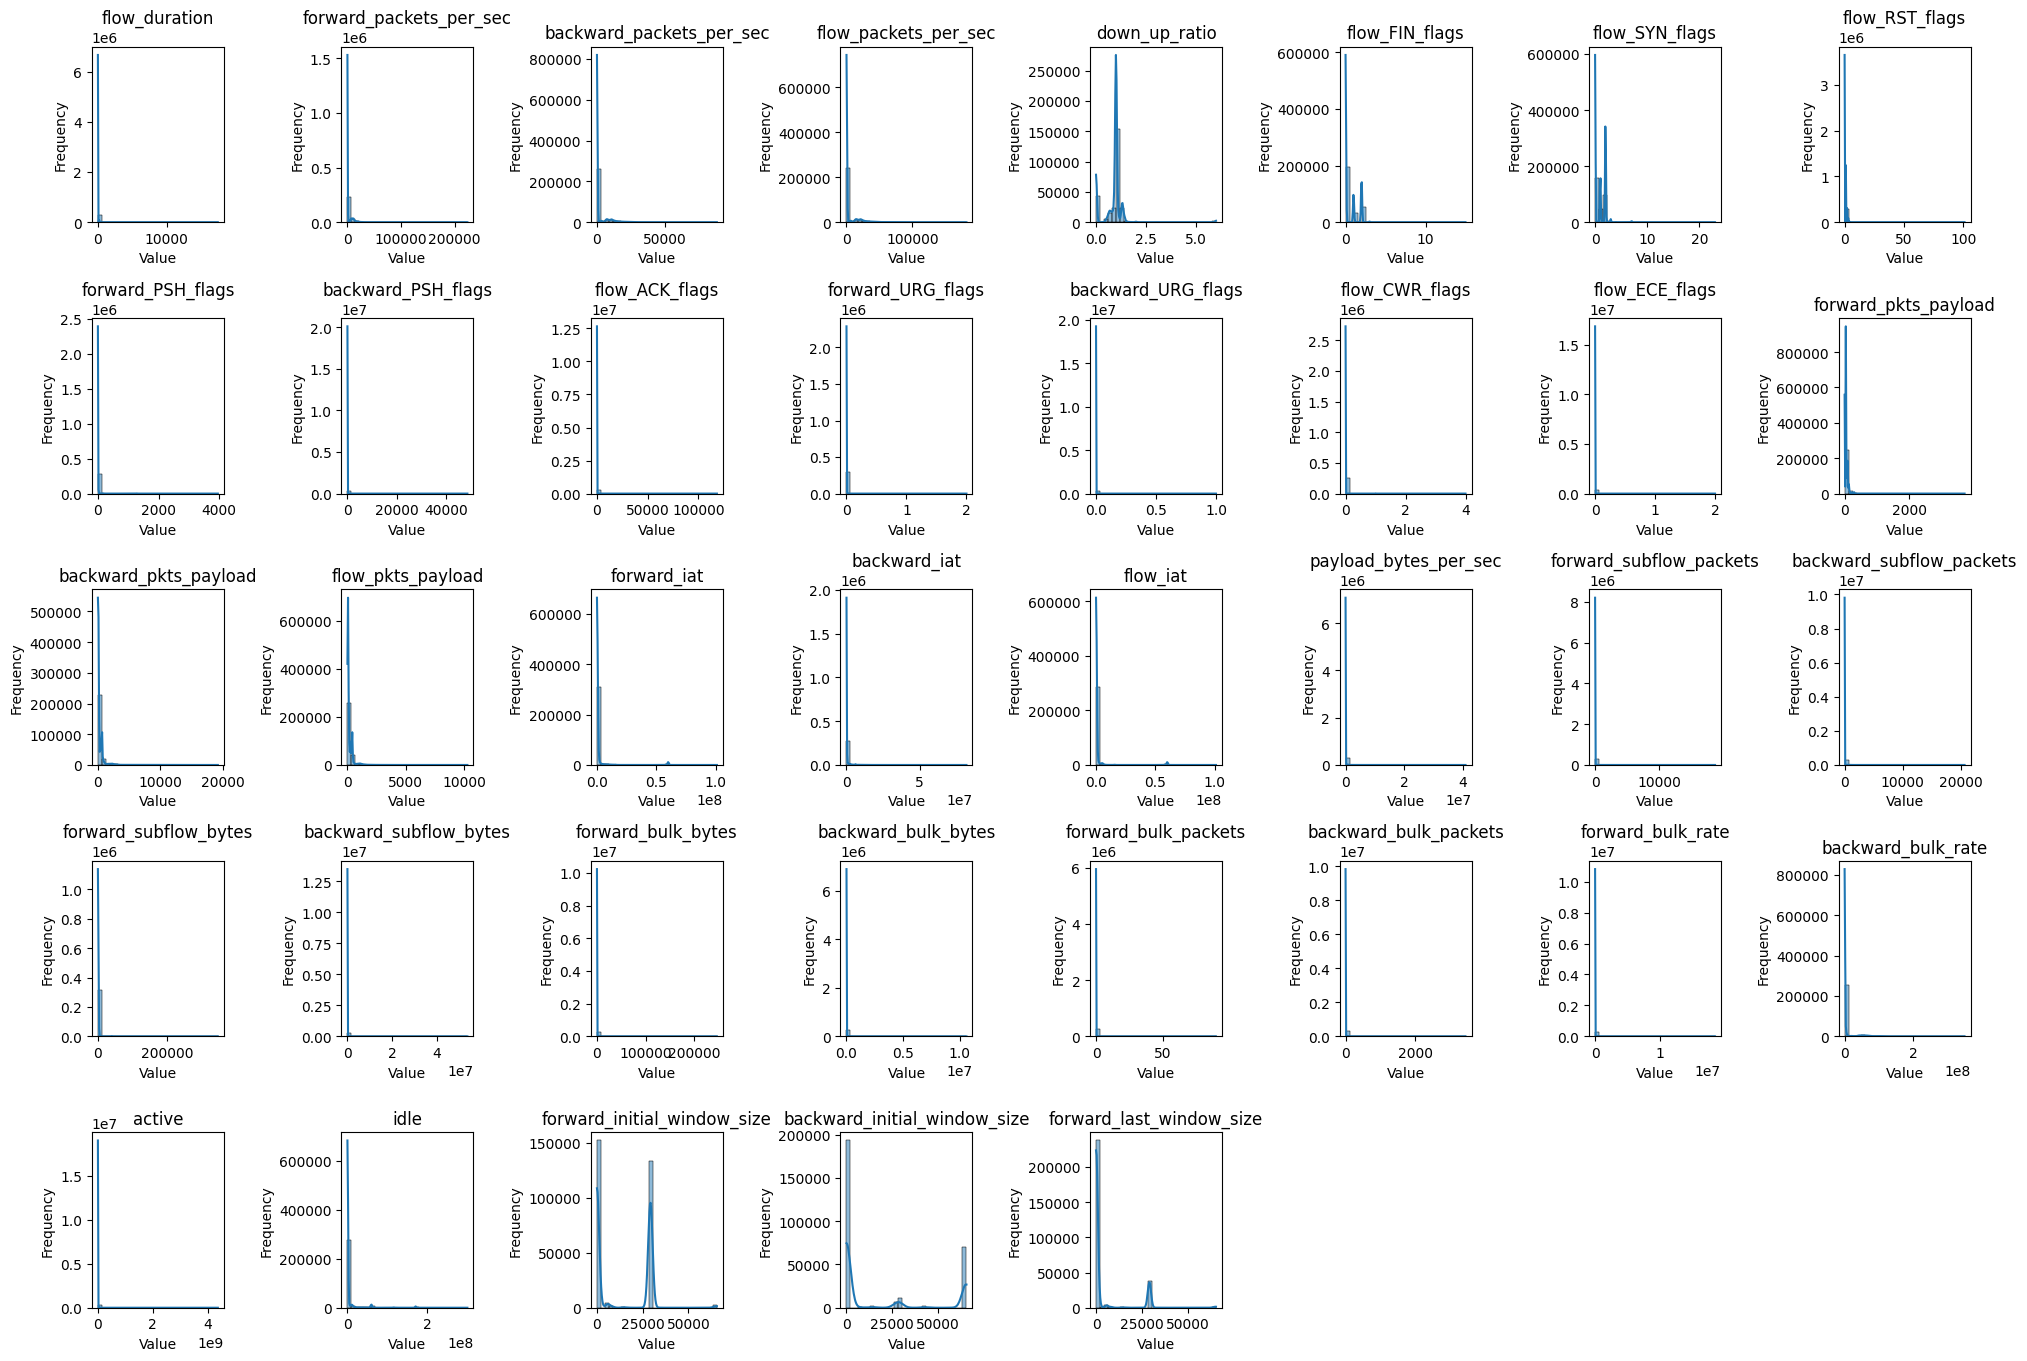

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = benback[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(benback[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Imputasi

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
benback[columns_to_impute] = imputer.fit_transform(benback[columns_to_impute])

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = benback.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (benback.isnull().sum() / len(benback)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

### Data Bersih (4)

In [ ]:
benback

id                origin_host  origin_port  \
0        CkwI1TlUCRApPfcJl              103.255.15.27        45314   
1       CBlrcc3dvtaHzyV4zj              103.255.15.27        45060   
2       CdpSX33u29yjDvnVzi              103.255.15.23         3440   
3       CfYEYl2acdfMxMSVwf              103.255.15.23        47062   
4       Cgibmv1Cqa5PqZe2be             142.252.253.26        27849   
...                    ...                        ...          ...   
388187   CHxNto9XwaCGCeir2             103.255.15.150        48914   
388188  CAIvFe4HsxjL5A4CIk             103.255.15.150        39751   
388189   CUxjxWgzdF71Y5kXc              103.255.15.23        59005   
388190  CUU9WM3olirlj8Absj              103.255.15.23         7978   
388191  ChiYNu2wqDXFBTzHV4  fe80::c1a7:7791:969e:3c06        55784   

             response_host  response_port  flow_duration  \
0            103.255.15.23          42001       0.000090   
1            103.255.15.23          42000       0.000033   
2             52.45.16.192            443      61.977190   
3                  8.8.8.8             53       0.027879   
4            103.255.15.23           3074       0.000000   
...                    ...            ...            ...   
388187             8.8.8.8             53       0.025523   
388188             8.8.8.8             53       0.023767   
388189             8.8.8.8             53       0.025523   
388190       128.199.88.81            443       0.025523   
388191  2600:1901:0:38d7::             80       0.000000   

        forward_packets_per_sec  backward_packets_per_sec  \
0                  11125.474801                 44.877406   
1                  30174.848921              30174.848921   
2                      0.322699                  0.242025   
3                     71.738585                 44.877406   
4                      0.000000                  0.000000   
...                         ...                       ...   
388187                79.729009                 79.729009   
388188                84.150312                 84.150312   
388189                40.508629                 80.762198   
388190                46.391519                 44.877406   
388191                 0.000000                  0.000000   

        flow_packets_per_sec  down_up_ratio  ...  forward_bulk_packets  \
0               22250.949602       1.000000  ...                   0.0   
1               60349.697842       1.000000  ...                   0.0   
2                   0.564724       0.750000  ...                   0.0   
3                  83.973412       1.000000  ...                   0.0   
4                   0.000000       0.000000  ...                   0.0   
...                      ...            ...  ...                   ...   
388187            159.458019       1.000000  ...                   0.0   
388188            168.300624       1.000000  ...                   0.0   
388189             83.973412       1.000000  ...                   0.0   
388190             90.658236       0.954198  ...                   0.0   
388191              0.000000       1.000000  ...                   0.0   

        backward_bulk_packets  forward_bulk_rate  backward_bulk_rate  \
0                         0.0                0.0            0.000000   
1                         0.0                0.0            0.000000   
2                         0.0                0.0            0.000000   
3                         0.0                0.0            0.000000   
4                         0.0                0.0            0.000000   
...                       ...                ...                 ...   
388187                    0.0                0.0            0.000000   
388188                    0.0                0.0            0.000000   
388189                    0.0                0.0            0.000000   
388190                  113.0                0.0       226240.284573   
388191                    0.0                0.0

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count  388192.000000            388192.000000             388192.000000   
mean        7.288479              1402.493846               1381.361651   
std        93.076019              4483.730301               4170.171170   
min         0.000000                 0.000000                  0.000000   
25%         0.024183                27.536328                 11.821063   
50%         0.025523                40.508629                 44.877406   
75%         0.202232                77.012428                 78.366712   
max     17393.030600            223696.213333              88768.338624   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count         388192.000000  388192.000000   388192.000000   388192.000000   
mean            2629.566407       0.906838        0.372213        0.673453   
std             8345.345963       0.452639        0.731167        0.955818   
min         

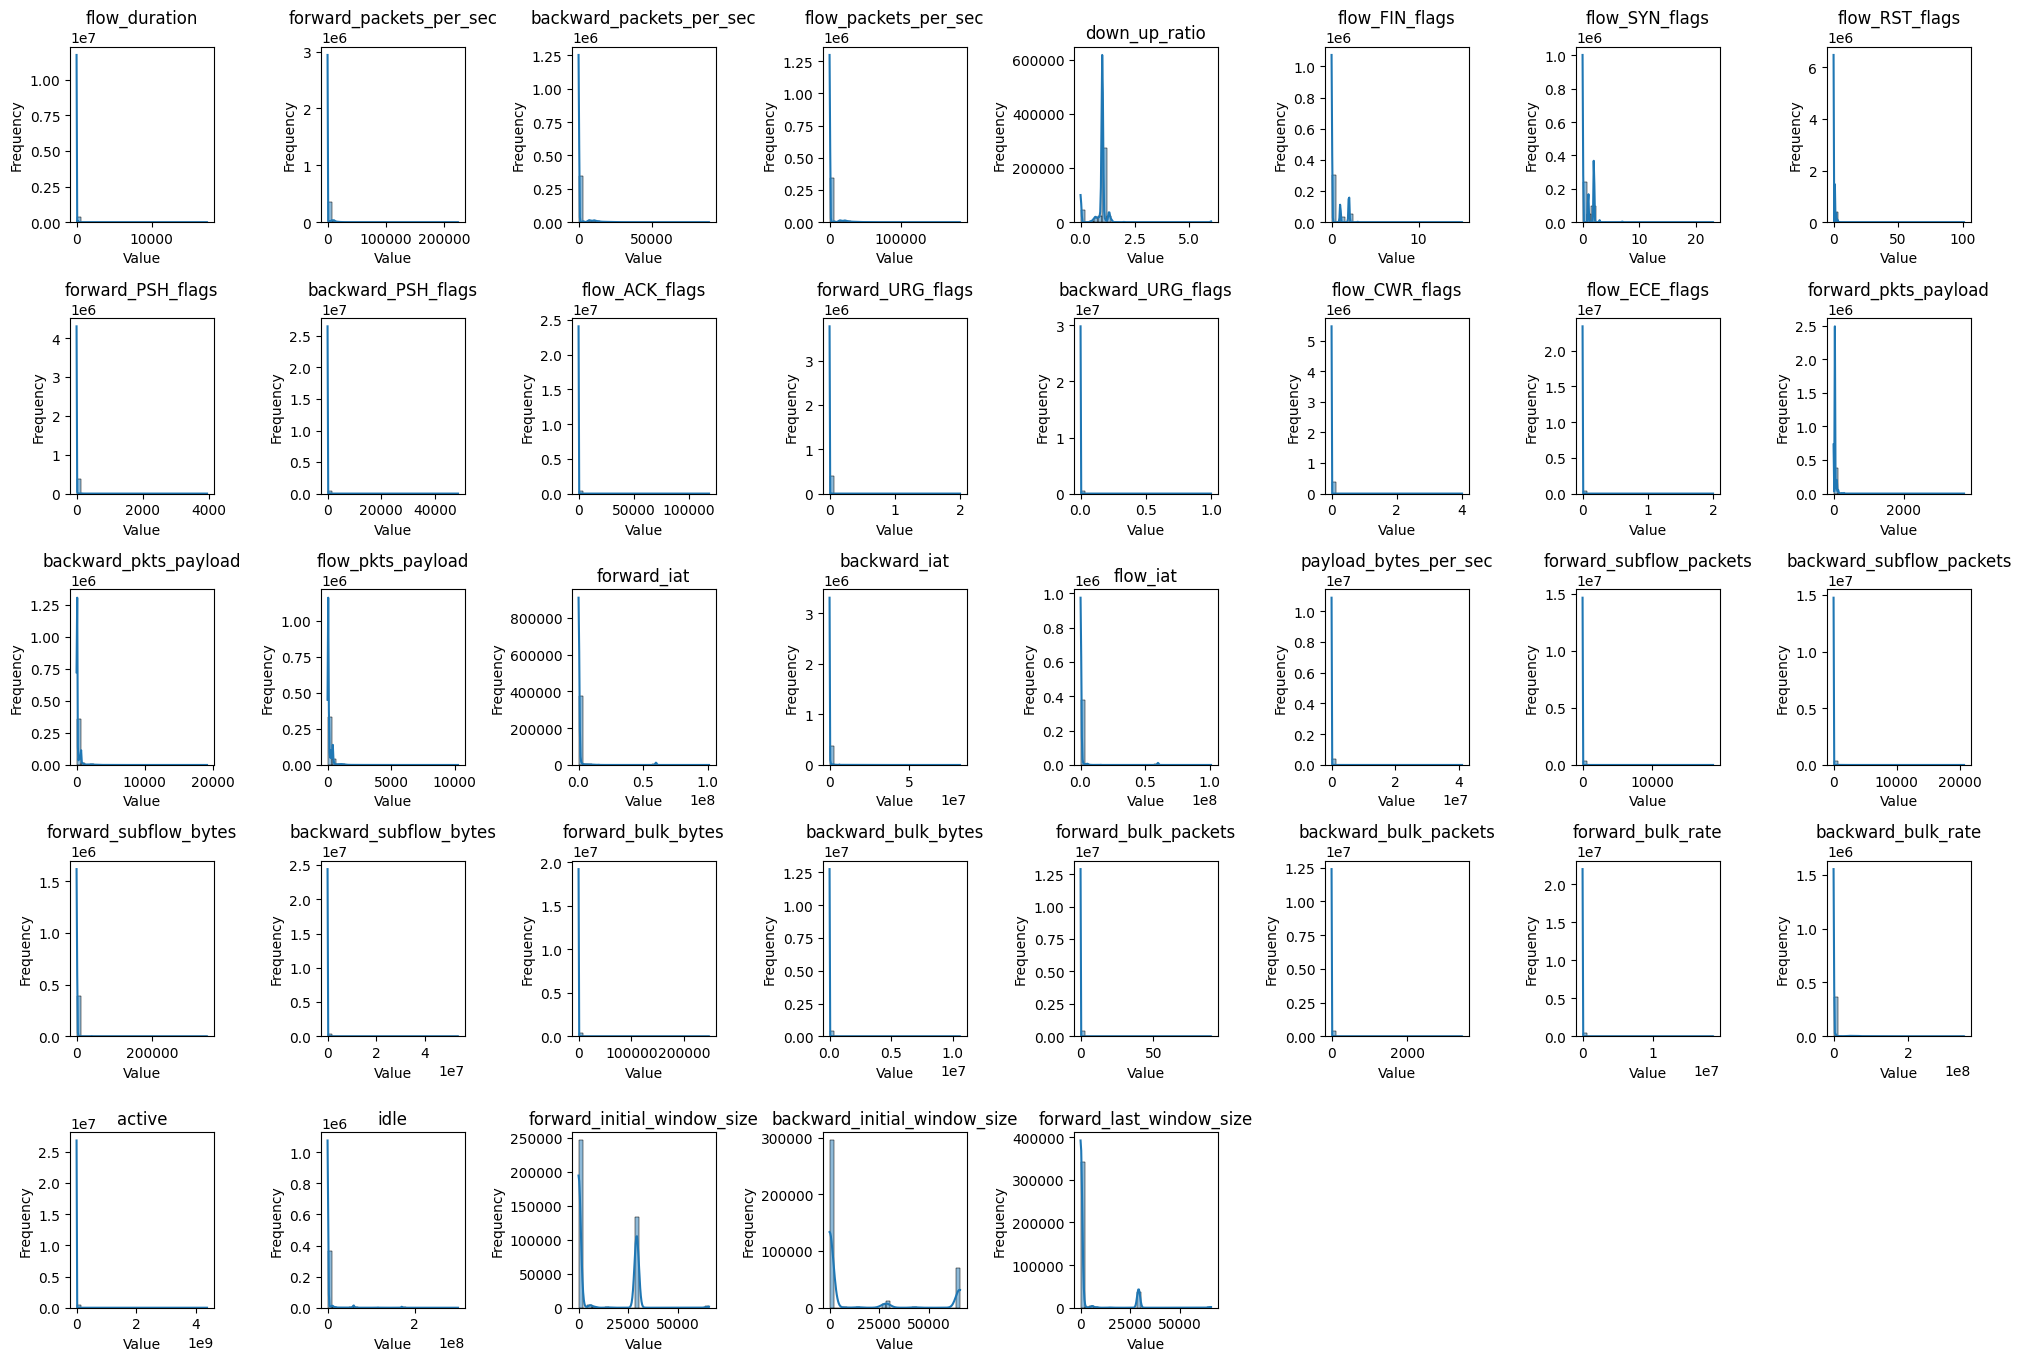

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = benback[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(benback[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Menyatukan Data Train Setelah Imputasi

In [ ]:
# List semua dataframe
dataframes = [
    xmrigcc_data,
    probing_data,
    bruteforce_gabungan,
    benback
]


# Menggabungkan semua dataframe menjadi satu
datatrain_new = pd.concat(dataframes, ignore_index=True)
datatrain_new.T

id                origin_host  origin_port  \
0       CsLPHW1EPeJUTU2CAa              103.255.15.42          137   
1       CiigOC4WG6x0dhY9Mj              103.255.15.42          137   
2       C8N6At1Y7m58t96le6              103.255.15.42          137   
3       CIH6aX3uLYvgftQof8              103.255.15.42          137   
4        C1aIXrX8UXbbhWhTc              103.255.15.42          137   
...                    ...                        ...          ...   
416468   CHxNto9XwaCGCeir2             103.255.15.150        48914   
416469  CAIvFe4HsxjL5A4CIk             103.255.15.150        39751   
416470   CUxjxWgzdF71Y5kXc              103.255.15.23        59005   
416471  CUU9WM3olirlj8Absj              103.255.15.23         7978   
416472  ChiYNu2wqDXFBTzHV4  fe80::c1a7:7791:969e:3c06        55784   

             response_host  response_port  flow_duration  \
0           103.255.15.255            137       1.528768   
1           103.255.15.255            137       1.528544   
2           103.255.15.255            137       1.528652   
3           103.255.15.255            137       1.528358   
4           103.255.15.255            137       1.528613   
...                    ...            ...            ...   
416468             8.8.8.8             53       0.025523   
416469             8.8.8.8             53       0.023767   
416470             8.8.8.8             53       0.025523   
416471       128.199.88.81            443       0.025523   
416472  2600:1901:0:38d7::             80       0.000000   

        forward_packets_per_sec  backward_packets_per_sec  \
0                      1.962364                  0.000000   
1                      1.962652                  0.000000   
2                      1.962513                  0.000000   
3                      1.962566                  0.000000   
4                      1.962563                  0.000000   
...                         ...                       ...   
416468                79.729009                 79.729009   
416469                84.150312                 84.150312   
416470                40.508629                 80.762198   
416471                46.391519                 44.877406   
416472                 0.000000                  0.000000   

        flow_packets_per_sec  down_up_ratio  ...  forward_bulk_packets  \
0                   1.962364       0.000000  ...                   0.0   
1                   1.962652       0.000000  ...                   0.0   
2                   1.962566       0.000000  ...                   0.0   
3                   1.962891       0.000000  ...                   0.0   
4                   1.962563       0.000000  ...                   0.0   
...                      ...            ...  ...                   ...   
416468            159.458019       1.000000  ...                   0.0   
416469            168.300624       1.000000  ...                   0.0   
416470             83.973412       1.000000  ...                   0.0   
416471             90.658236       0.954198  ...                   0.0   
416472              0.000000       1.000000  ...                   0.0   

        backward_bulk_packets  forward_bulk_rate  backward_bulk_rate  \
0                         0.0                0.0            0.000000   
1                         0.0                0.0            0.000000   
2                         0.0                0.0            0.000000   
3                         0.0                0.0            0.000000   
4                         0.0                0.0            0.000000   
...                       ...                ...                 ...   
416468                    0.0                0.0            0.000000   
416469                    0.0                0.0            0.000000   
416470                    0.0                0.0            0.000000   
416471                  113.0                0.0       226240.284573   
416472                    0.0                0.0

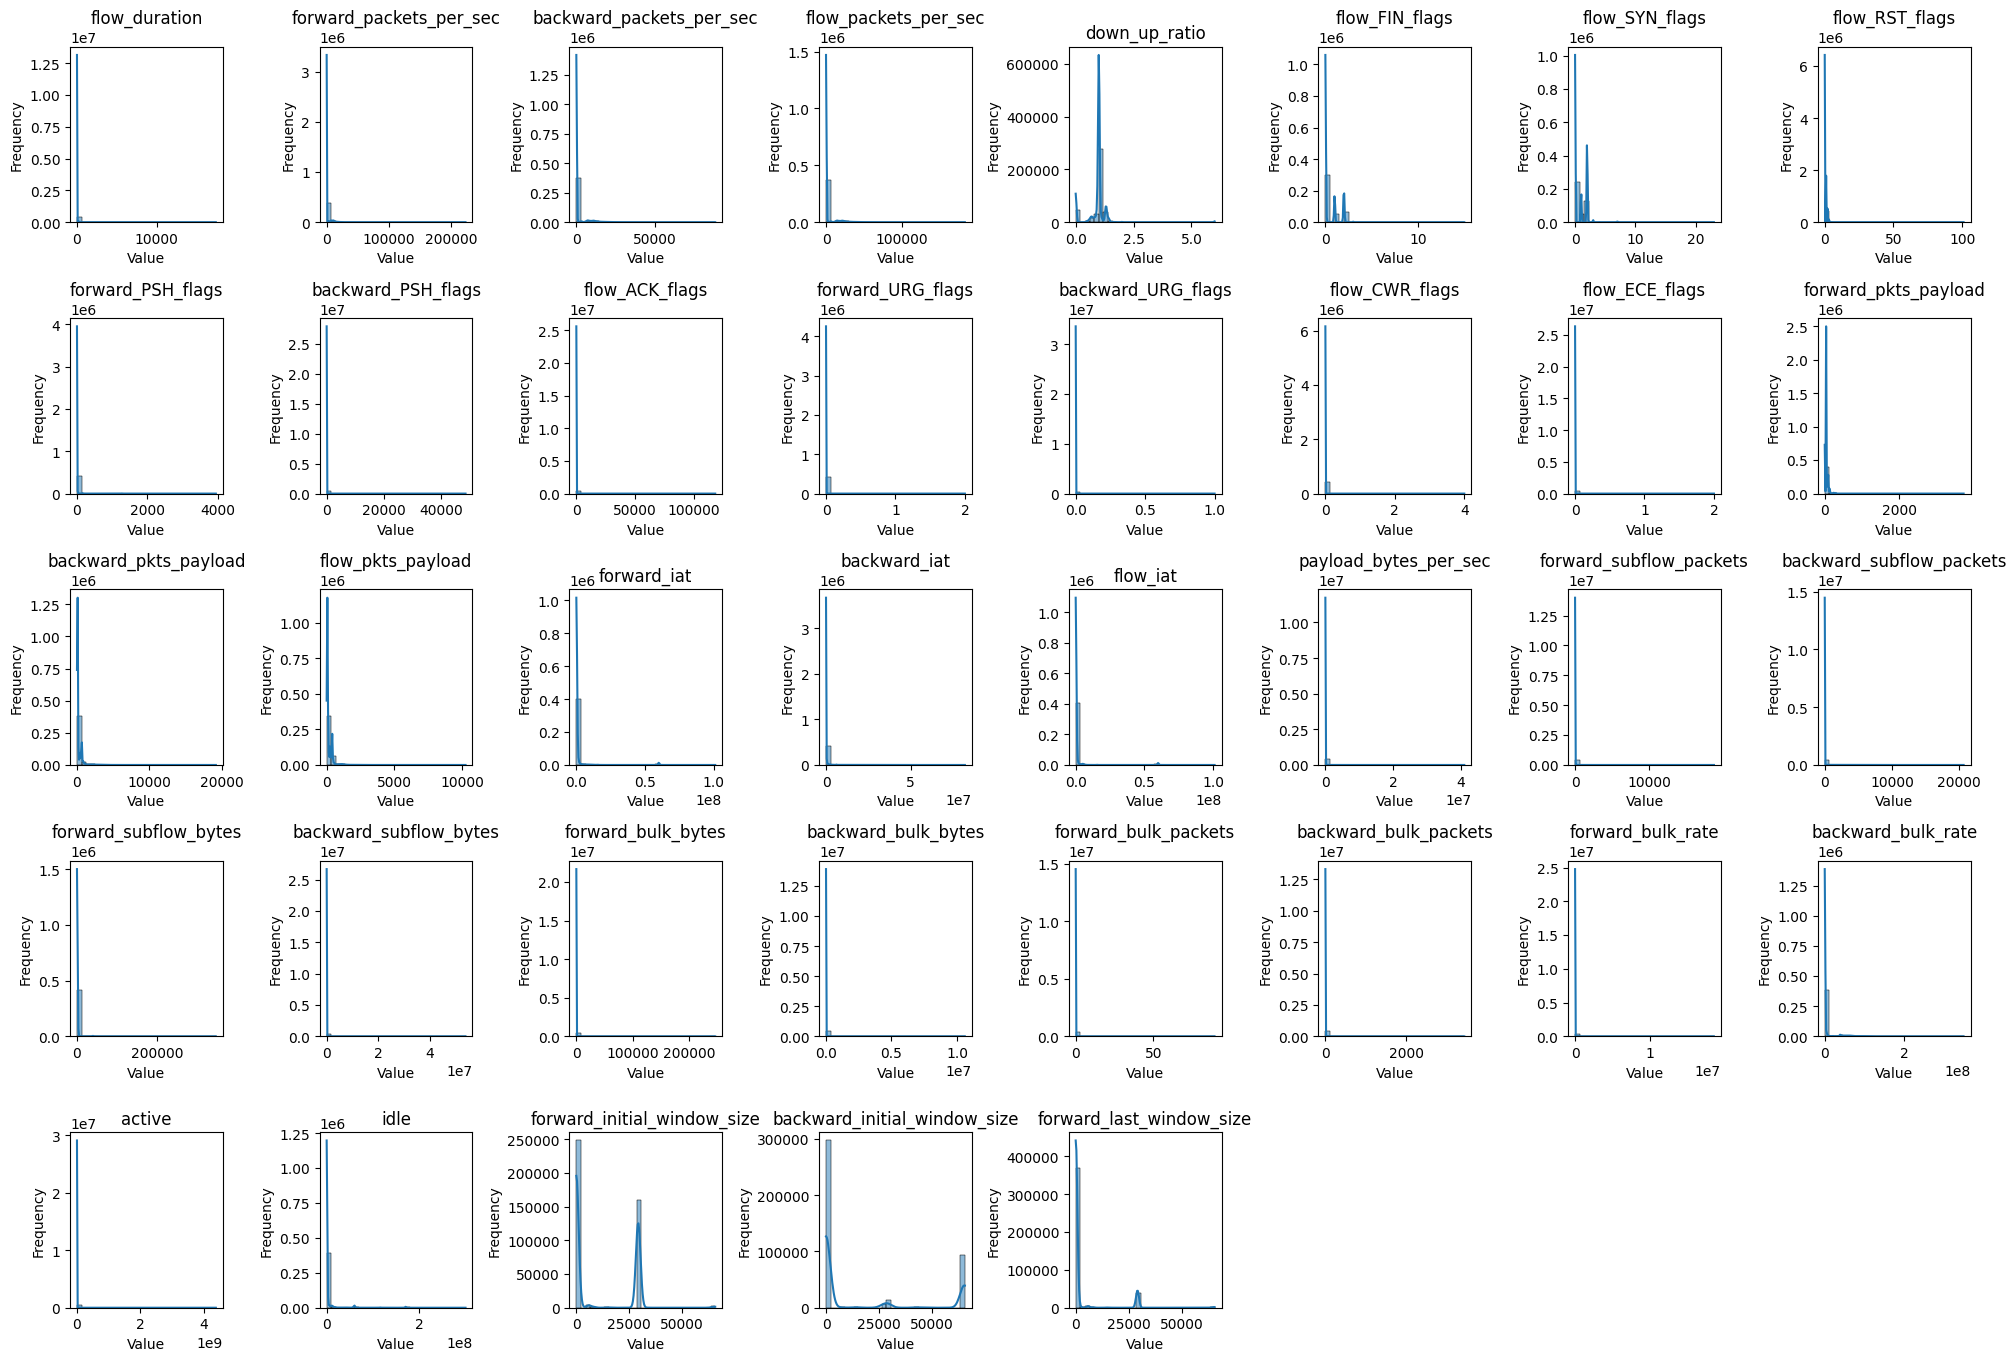

In [ ]:
# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(datatrain_new[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Simpan Data Train

In [ ]:
# Menyimpan datatrain_new ke dalam file CSV
datatrain_new.to_csv('datatrain_new.csv', index=False)

# [DATA TEST] Data Preprocessing Persubset

## XMRIGCC Cryptominer (test)

In [ ]:
Cryptominer_t = test[
    ((test['origin_port'] == 137)|(test['origin_port'] == 138))&
    ((test['response_port'] == 137)|(test['origin_port'] == 138)) &
    (test['origin_host'] == '103.255.15.42') &
    (test['response_host'] == '103.255.15.255')
]

# Menghitung jumlah baris yang memenuhi kondisi
row_count = len(Cryptominer_t)

# Menampilkan hasil
print(f"Jumlah baris yang memenuhi kondisi: {row_count}")


Jumlah baris yang memenuhi kondisi: 1454


In [ ]:
min_origin_port = Cryptominer_t['origin_port'].min()
max_origin_port = Cryptominer_t['origin_port'].max()

# Menampilkan hasil
print(f"Nilai minimum dari 'origin_port': {min_origin_port}")
print(f"Nilai maksimum dari 'origin_port': {max_origin_port}")

Nilai minimum dari 'origin_port': 137
Nilai maksimum dari 'origin_port': 138


In [ ]:
min_response_port = Cryptominer_t['response_port'].min()
max_response_port = Cryptominer_t['response_port'].max()

# Menampilkan hasil
print(f"Nilai minimum dari 'response_port': {min_response_port}")
print(f"Nilai maksimum dari 'response_port': {max_response_port}")

Nilai minimum dari 'response_port': 137
Nilai maksimum dari 'response_port': 138


In [ ]:
test = test.drop(
    test[
    ((test['origin_port'] == 137)|(test['origin_port'] == 138))&
    ((test['response_port'] == 137)|(test['origin_port'] == 138)) &
    (test['origin_host'] == '103.255.15.42') &
    (test['response_host'] == '103.255.15.255')
].index
)

# Menampilkan jumlah baris setelah penghapusan
print(f"Jumlah baris setelah penghapusan: {len(test)}")

Jumlah baris setelah penghapusan: 137351


In [ ]:
test

id      origin_host  origin_port    response_host  \
0       ClDOIi3yLGMfeRPzAc    103.255.15.23        49188    13.227.228.83   
1       C9chsd1cHTOBBHe6Q2  202.169.224.219         5678  255.255.255.255   
2       CUOe3U1NC5Nln7cItf   103.255.15.150        32976          8.8.8.8   
3       C6QhB04KTRUYOY2rMk   103.255.15.150        48606  128.199.242.104   
4       C60oC51SZNEhCXlX6c   103.255.15.150        34794  128.199.242.104   
...                    ...              ...          ...              ...   
138800  CWXgM92AOvagYVekD3    103.255.15.67        52975    103.255.15.23   
138801  CMmDuU3aNTnOz4ZwSi    103.255.15.27        37214    103.255.15.23   
138802  CQO5h64B0lXTYRlsNf   103.255.15.150        38336          8.8.8.8   
138803  CWZZN23jtBV7sZsBLi   103.255.15.150        37267          8.8.8.8   
138804  CAYAeJ26bhNrdT6KVc   103.255.15.150        50399          8.8.8.8   

        response_port  flow_duration  forward_packets_per_sec  \
0                 443       1.738424                 8.628505   
1                5678       0.000000                 0.000000   
2                  53            NaN                80.446972   
3                 443            NaN                      NaN   
4                 443       0.326490                30.628816   
...               ...            ...                      ...   
138800            161            NaN              7307.149826   
138801          42001       0.000144              6944.211921   
138802             53            NaN                      NaN   
138803             53       0.025681                77.878530   
138804             53       0.023551                84.922130   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                            NaN             16.681776            NaN  ...   
1                       0.000000              0.000000            0.0  ...   
2                            NaN                   NaN            1.0  ...   
3                      51.891033             88.956056            NaN  ...   
4                            NaN             70.446278            1.3  ...   
...                          ...                   ...            ...  ...   
138800                       NaN                   NaN            1.0  ...   
138801                       NaN                   NaN            1.0  ...   
138802                 33.424744                   NaN            1.0  ...   
138803                       NaN            155.757060            NaN  ...   
138804                 84.922130                   NaN            NaN  ...   

        backward_bulk_bytes  forward_bulk_packets  backward_bulk_packets  \
0                       0.0                   0.0                    NaN   
1                       NaN                   0.0                    NaN   
2                       0.0                   NaN                    0.0   
3                    4585.0                   0.0                    5.0   
4                    4585.0                   0.0                    NaN   
...                     ...                   ...                    ...   
138800                  0.0                   0.0                    0.0   
138801                  NaN                   NaN                    0.0   
138802                  0.0                   0.0                    0.0   
138803                  0.0                   0.0                    0.0   
138804                  0.0                   0.0                    0.0   

        forward_bulk_rate  backward_bulk_rate        active  idle  \
0                     NaN        0.000000e+00  1.738440e+06   NaN   
1                     NaN                 NaN  0.000000e+00   0.0   
2                     0.0        0.000000e+00  2.486110e+04   0.0   
3                     0.0        1.544649e+07  2.697961e+05   0.0   
4                     NaN        5.211622e+07           NaN   NaN   
...                   ...                 ...         

In [ ]:
Cryptominer_t

id    origin_host  origin_port   response_host  \
196     CHDK5D4PaC8DMy07f2  103.255.15.42          137  103.255.15.255   
796      CsEOkDBXlIRKHZpO4  103.255.15.42          137  103.255.15.255   
816     CHiDjp3gxKlOrN0kQg  103.255.15.42          137  103.255.15.255   
936     CdVRVn4LDkAhAoER52  103.255.15.42          137  103.255.15.255   
941     CrI63x4bWd9R0esvde  103.255.15.42          137  103.255.15.255   
...                    ...            ...          ...             ...   
137960   CYE6egUtrpTGaPctg  103.255.15.42          137  103.255.15.255   
138196  C6YQfr1b5vZaeubSHb  103.255.15.42          137  103.255.15.255   
138421  Cm49Kk2q3lwIN1ptDa  103.255.15.42          137  103.255.15.255   
138548  CZB8i44kICOyGPiAx8  103.255.15.42          137  103.255.15.255   
138738   CLOFUB0Dh5mZNSOwl  103.255.15.42          137  103.255.15.255   

        response_port  flow_duration  forward_packets_per_sec  \
196               137            NaN                 1.962302   
796               137       1.528687                 1.962468   
816               137       1.528721                      NaN   
936               137       1.528589                 1.962594   
941               137       1.528627                      NaN   
...               ...            ...                      ...   
137960            137       1.528564                 1.962626   
138196            137       1.528498                      NaN   
138421            137            NaN                 1.962630   
138548            137       1.528523                 1.962679   
138738            137       1.528622                 1.962552   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
196                          0.0              1.962302            NaN  ...   
796                          NaN                   NaN            0.0  ...   
816                          NaN              1.962425            0.0  ...   
936                          0.0              1.962594            0.0  ...   
941                          0.0                   NaN            NaN  ...   
...                          ...                   ...            ...  ...   
137960                       0.0              1.962626            0.0  ...   
138196                       0.0              1.962711            NaN  ...   
138421                       0.0                   NaN            NaN  ...   
138548                       0.0              1.962679            0.0  ...   
138738                       NaN              1.962552            0.0  ...   

        backward_bulk_bytes  forward_bulk_packets  backward_bulk_packets  \
196                     NaN                   0.0                    0.0   
796                     NaN                   0.0                    0.0   
816                     NaN                   0.0                    NaN   
936                     NaN                   0.0                    NaN   
941                     NaN                   0.0                    0.0   
...                     ...                   ...                    ...   
137960                  0.0                   0.0                    0.0   
138196                  NaN                   NaN                    0.0   
138421                  NaN                   0.0                    0.0   
138548                  0.0                   0.0                    NaN   
138738                  0.0                   0.0                    NaN   

        forward_bulk_rate  backward_bulk_rate        active  idle  \
196                   0.0                 NaN           NaN   0.0   
796                   0.0                 0.0           NaN   NaN   
816                   0.0                 0.0  1.528721e+06   0.0   
936                   0.0                 0.0  1.528589e+06   0.0   
941                   0.0                 0.0  1.528627e+06   NaN   
...                   ...                 ...           ...   ...   
137960               

###  Distribusi Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    1072.000000              1111.000000                     982.0   
mean        1.484006                 1.899160                       0.0   
std         0.276303                 0.347759                       0.0   
min         0.000000                 0.000000                       0.0   
25%         1.528550                 1.962492                       0.0   
50%         1.528607                 1.962566                       0.0   
75%         1.528661                 1.962631                       0.0   
max         4.133830                 2.177158                       0.0   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count            941.000000         1103.0          1165.0          1277.0   
mean               1.902060            0.0             0.0             0.0   
std                0.339357            0.0             0.0             0.0   
min         

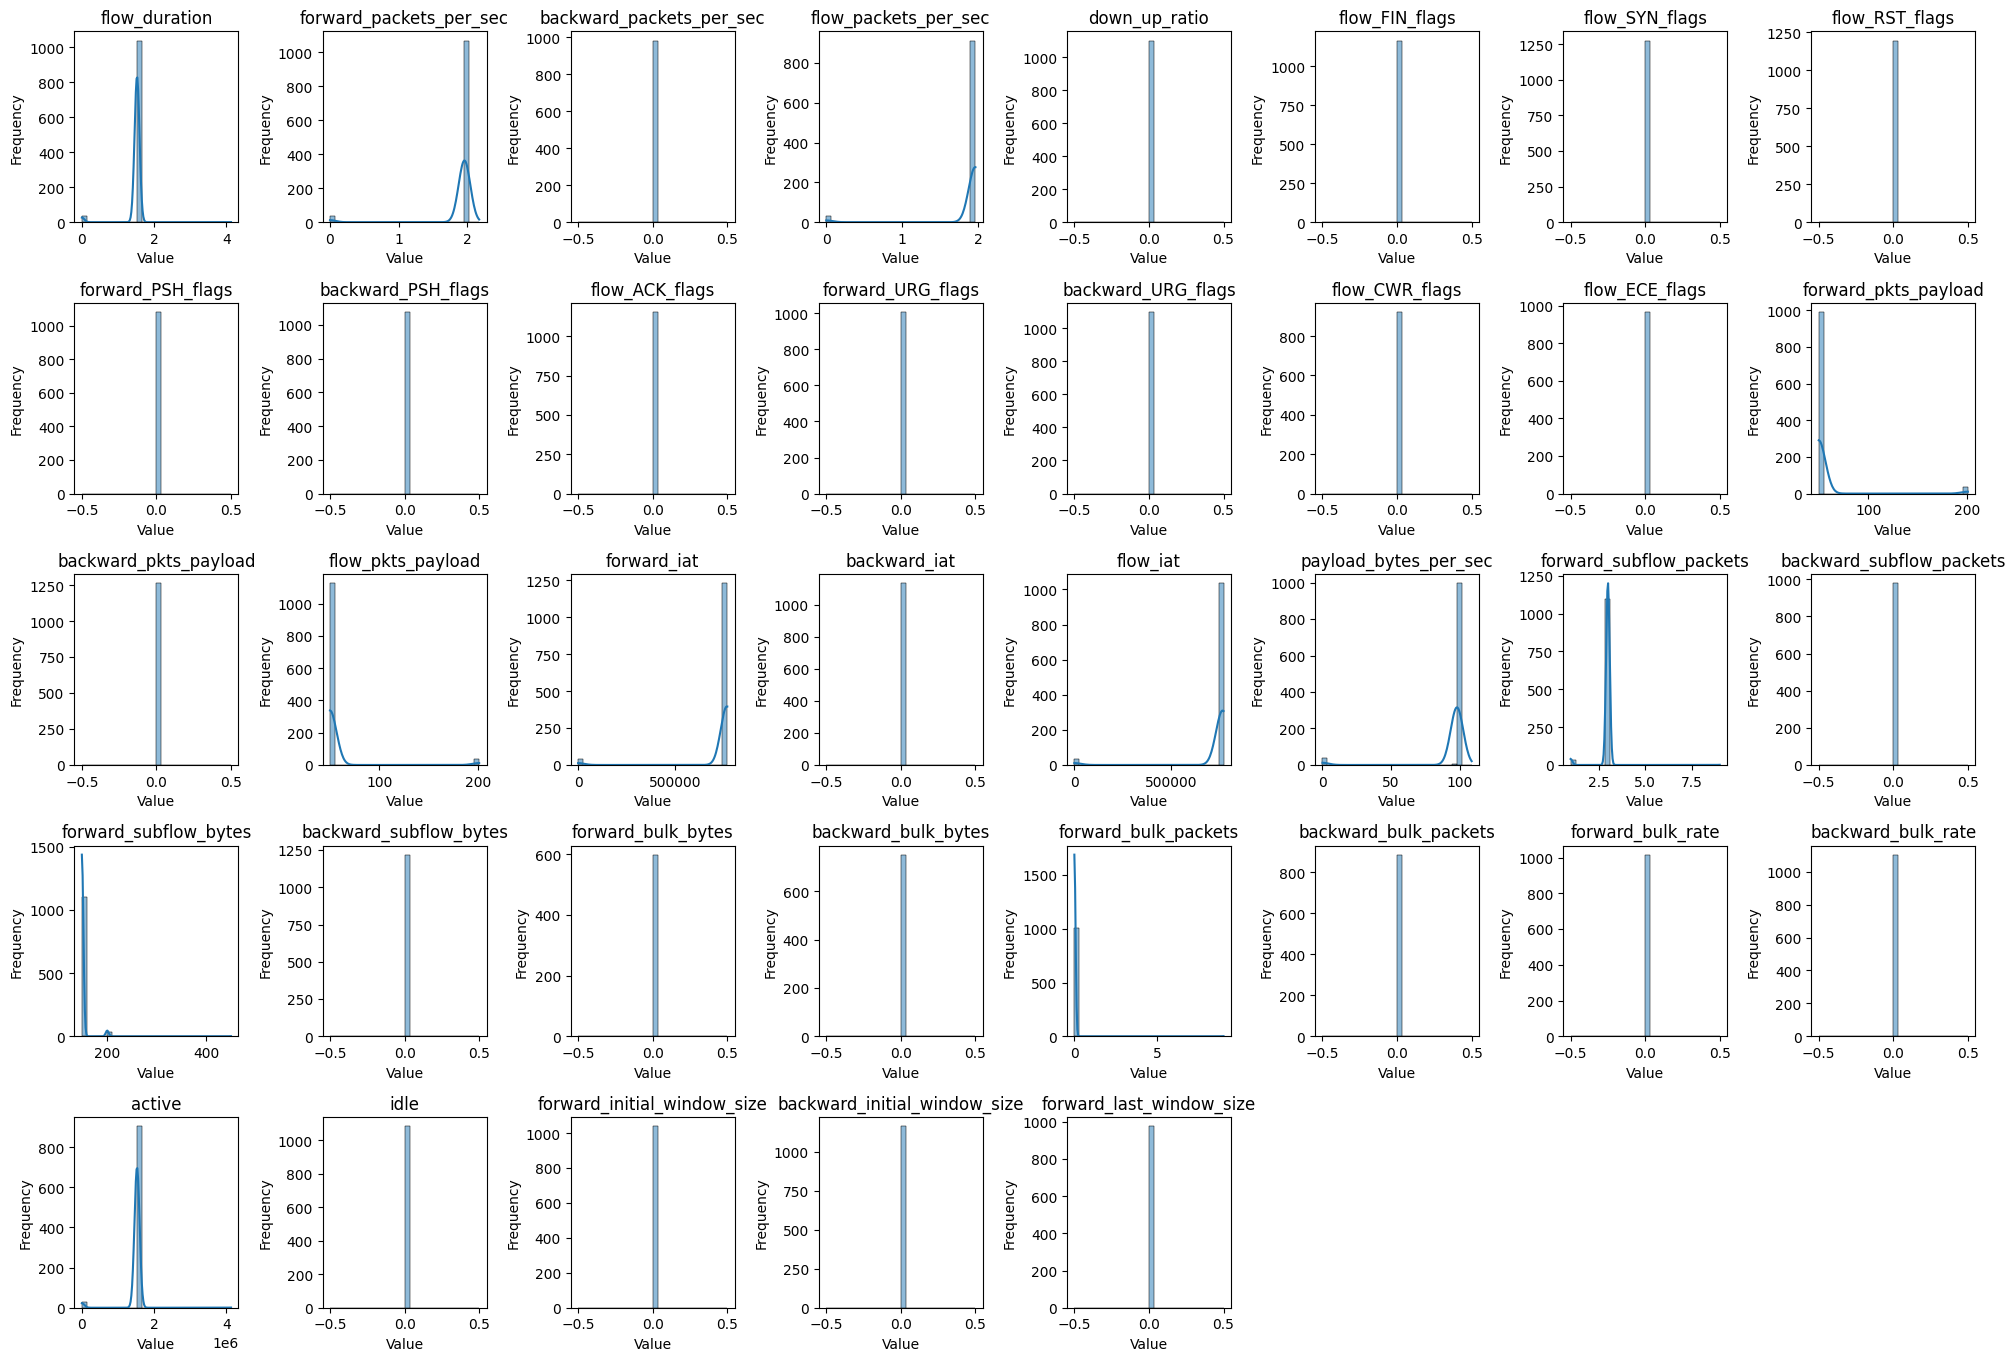

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = Cryptominer_t [numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(Cryptominer_t[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = Cryptominer_t.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (Cryptominer_t.isnull().sum() / len(Cryptominer_t)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                            382   26.272352
forward_packets_per_sec                  343   23.590096
backward_packets_per_sec                 472   32.462173
flow_packets_per_sec                     513   35.281981
down_up_ratio                            351   24.140303
flow_FIN_flags                           289   19.876204
flow_SYN_flags                           177   12.173315
flow_RST_flags                           258   17.744154
forward_PSH_flags                        371   25.515818
backward_PSH_flags                       377   25.928473
flow_ACK_flags                           298   20.495186
forward_URG_flags              

### Imputasi median

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
Cryptominer_t[columns_to_impute] = imputer.fit_transform(Cryptominer_t[columns_to_impute])

<ipython-input-261-46376a5351de>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cryptominer_t[columns_to_impute] = imputer.fit_transform(Cryptominer_t[columns_to_impute])


       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    1454.000000              1454.000000                    1454.0   
mean        1.495724                 1.914118                       0.0   
std         0.238030                 0.305144                       0.0   
min         0.000000                 0.000000                       0.0   
25%         1.528575                 1.962521                       0.0   
50%         1.528607                 1.962566                       0.0   
75%         1.528637                 1.962608                       0.0   
max         4.133830                 2.177158                       0.0   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           1454.000000         1454.0          1454.0          1454.0   
mean               1.923408            0.0             0.0             0.0   
std                0.274481            0.0             0.0             0.0   
min         

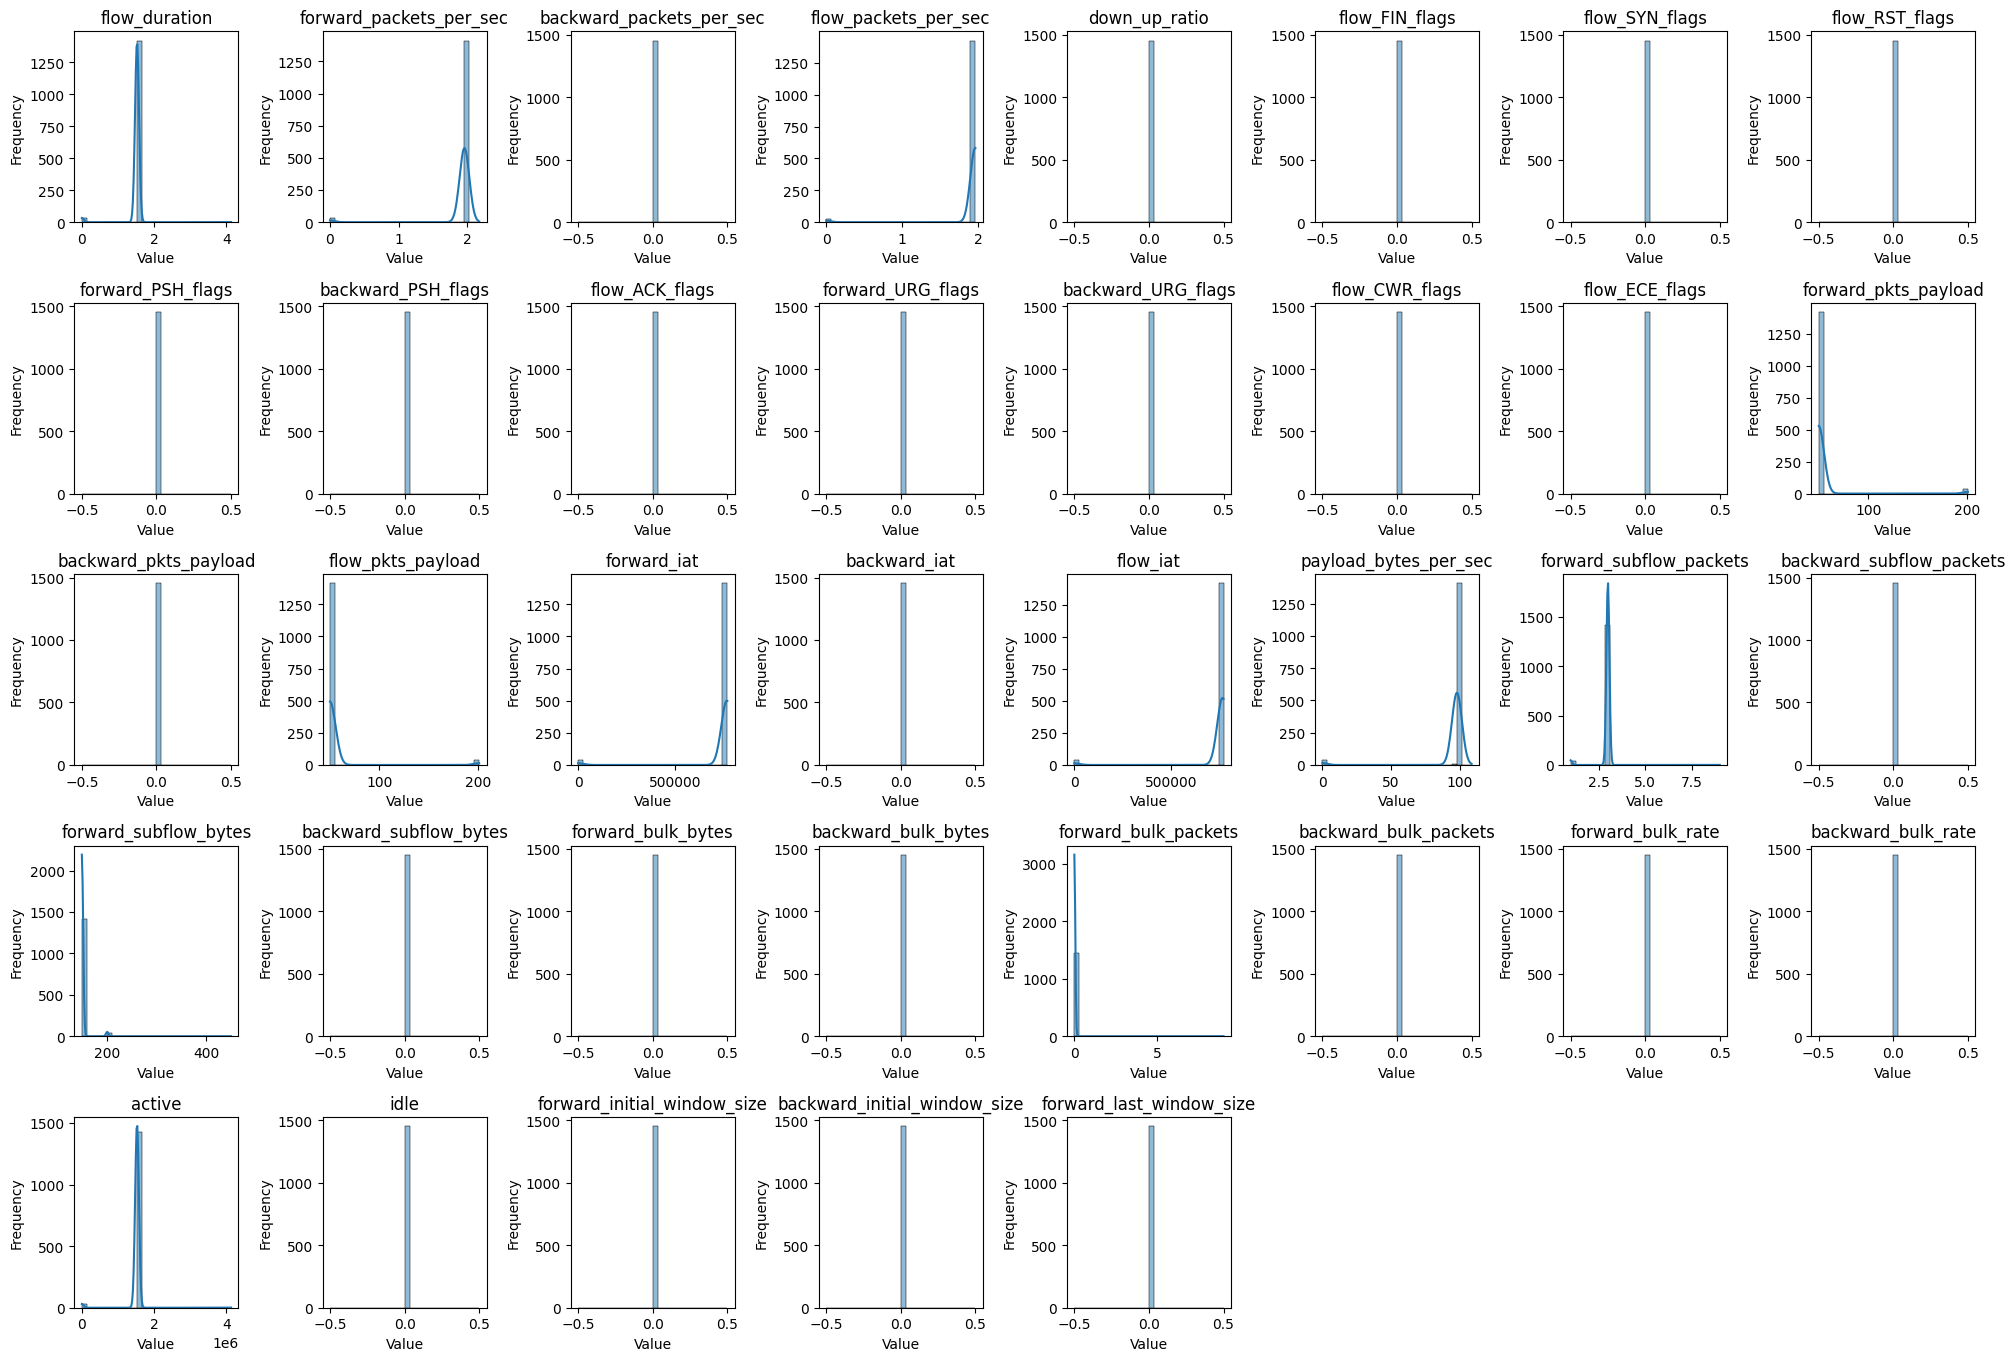

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = Cryptominer_t[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(Cryptominer_t[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = Cryptominer_t.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (Cryptominer_t.isnull().sum() / len(Cryptominer_t)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

## Probing (test)

In [ ]:
prob_t = test[
    (test['response_port'] == 443) &
    (test['origin_host'] == '103.255.15.150') &
    (test['response_host'] == '128.199.242.104')
]

# Menghitung jumlah baris yang memenuhi kondisi
row_count = len(prob_t)

# Menampilkan hasil
print(f"Jumlah baris yang memenuhi kondisi: {row_count}")

Jumlah baris yang memenuhi kondisi: 21302


In [ ]:
test = test.drop(
    test[
    (test['response_port'] == 443) &
    (test['origin_host'] == '103.255.15.150') &
    (test['response_host'] == '128.199.242.104')
].index
)

# Menampilkan jumlah baris setelah penghapusan
print(f"Jumlah baris setelah penghapusan: {len(test)}")

Jumlah baris setelah penghapusan: 116049


### Origin Port

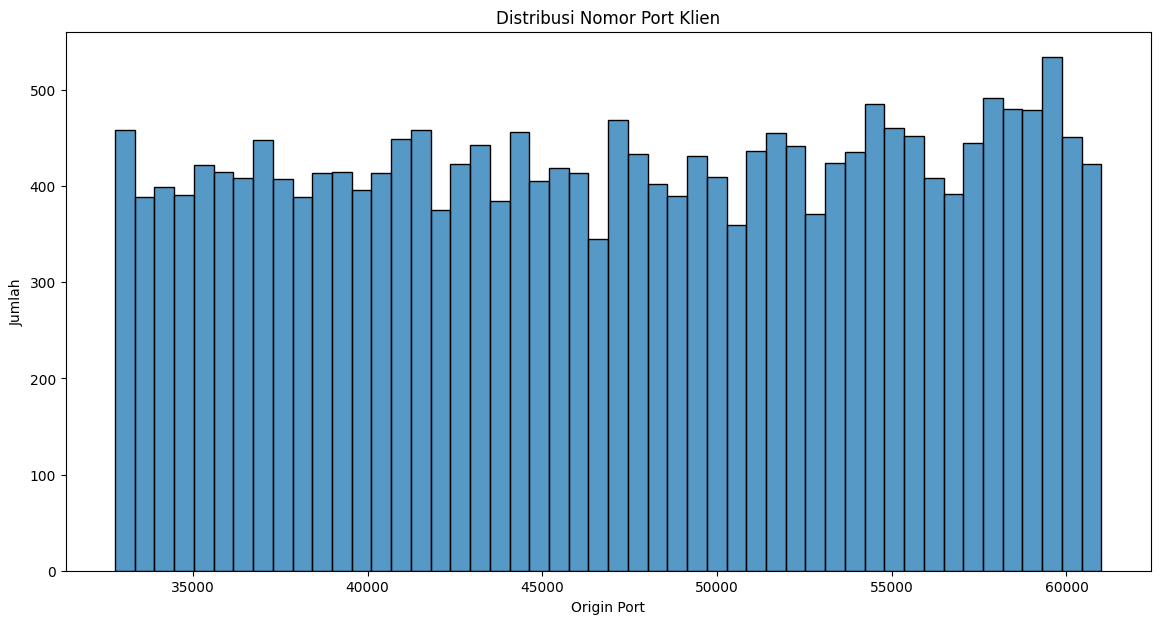

In [ ]:
# Analisis Origin Port
plt.figure(figsize=(14, 7))
sns.histplot(data=prob_t, x='origin_port', bins=50, kde=False)
plt.title('Distribusi Nomor Port Klien')
plt.xlabel('Origin Port')
plt.ylabel('Jumlah')
plt.show()

###  Distribusi Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count   12702.000000             15019.000000              14671.000000   
mean        1.939647                35.499822                 46.059195   
std         8.814694                 7.632703                  9.876635   
min         0.128317                 0.132865                  0.127325   
25%         0.236049                32.260375                 41.970204   
50%         0.268422                35.849733                 46.601824   
75%         0.289292                39.321997                 51.610338   
max       136.281944                86.425996                 92.171130   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count          14011.000000   14384.000000    18877.000000         15591.0   
mean              81.692429       1.297306        1.064470             2.0   
std               17.287457       0.110557        0.246241             0.0   
min         

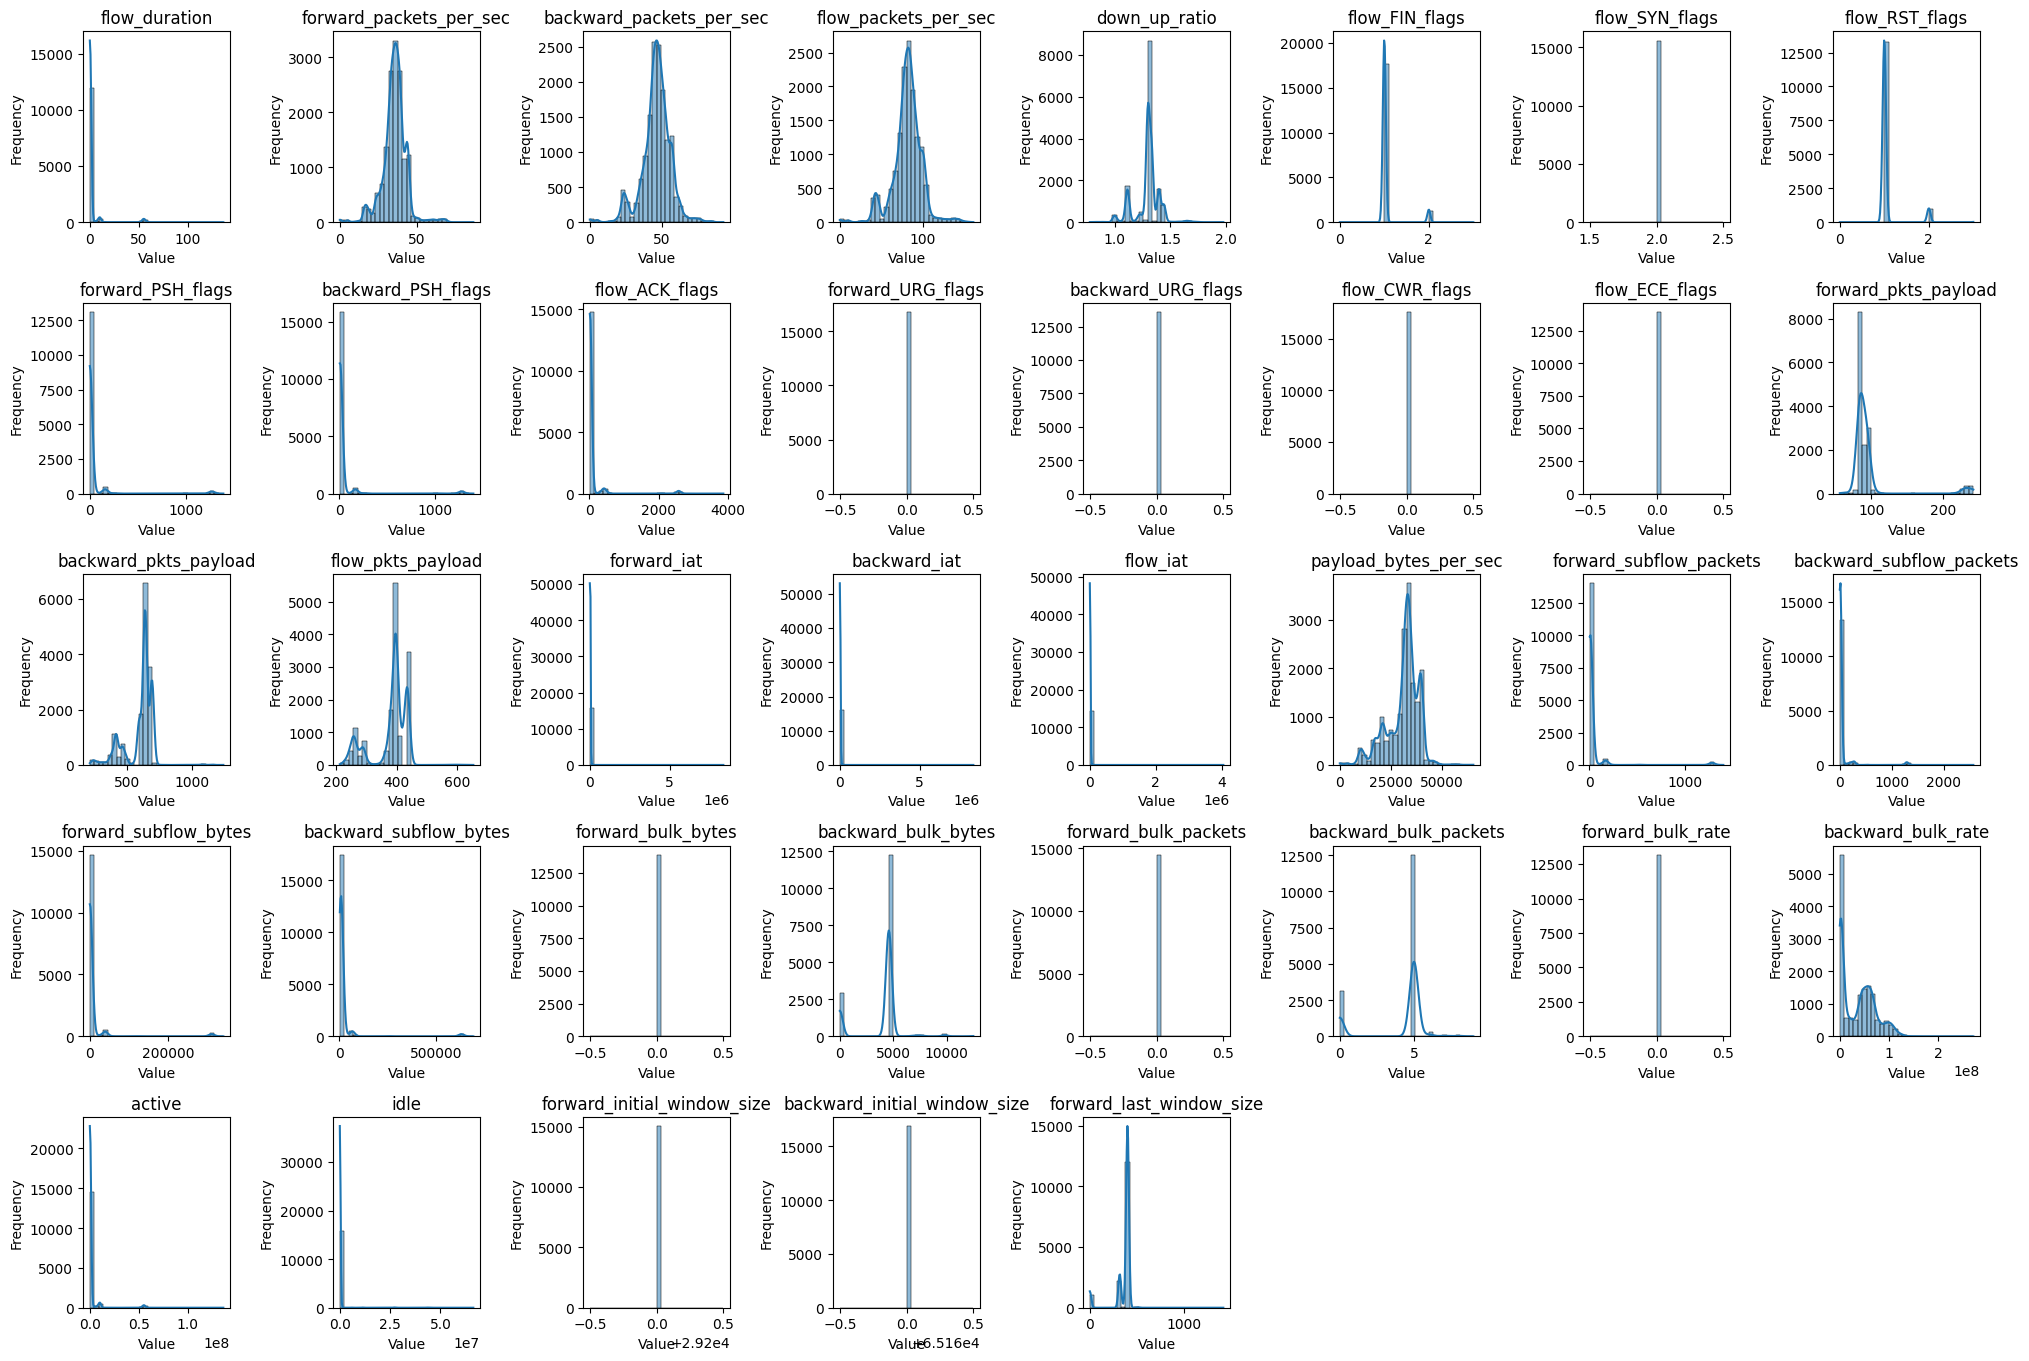

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = prob_t [numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(prob_t[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = prob_t.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (prob_t.isnull().sum() / len(prob_t)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                           8600   40.371796
forward_packets_per_sec                 6283   29.494883
backward_packets_per_sec                6631   31.128533
flow_packets_per_sec                    7291   34.226833
down_up_ratio                           6918   32.475824
flow_FIN_flags                          2425   11.383908
flow_SYN_flags                          5711   26.809689
flow_RST_flags                          7009   32.903014
forward_PSH_flags                       7369   34.592996
backward_PSH_flags                      4462   20.946390
flow_ACK_flags                          5584   26.213501
forward_URG_flags              

### Imputasi median

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
prob_t[columns_to_impute] = imputer.fit_transform(prob_t[columns_to_impute])

<ipython-input-271-32dbe60a9e7e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_t[columns_to_impute] = imputer.fit_transform(prob_t[columns_to_impute])


In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = prob_t.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (prob_t.isnull().sum() / len(prob_t)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count   21302.000000             21302.000000              21302.000000   
mean        1.264943                35.603028                 46.228107   
std         6.855752                 6.410900                  8.200267   
min         0.128317                 0.132865                  0.127325   
25%         0.262196                33.858406                 44.288216   
50%         0.268422                35.849733                 46.601824   
75%         0.274450                37.753751                 49.030867   
max       136.281944                86.425996                 92.171130   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count          21302.000000   21302.000000    21302.000000         21302.0   
mean              81.998678       1.298181        1.057131             2.0   
std               14.026497       0.090856        0.232704             0.0   
min         

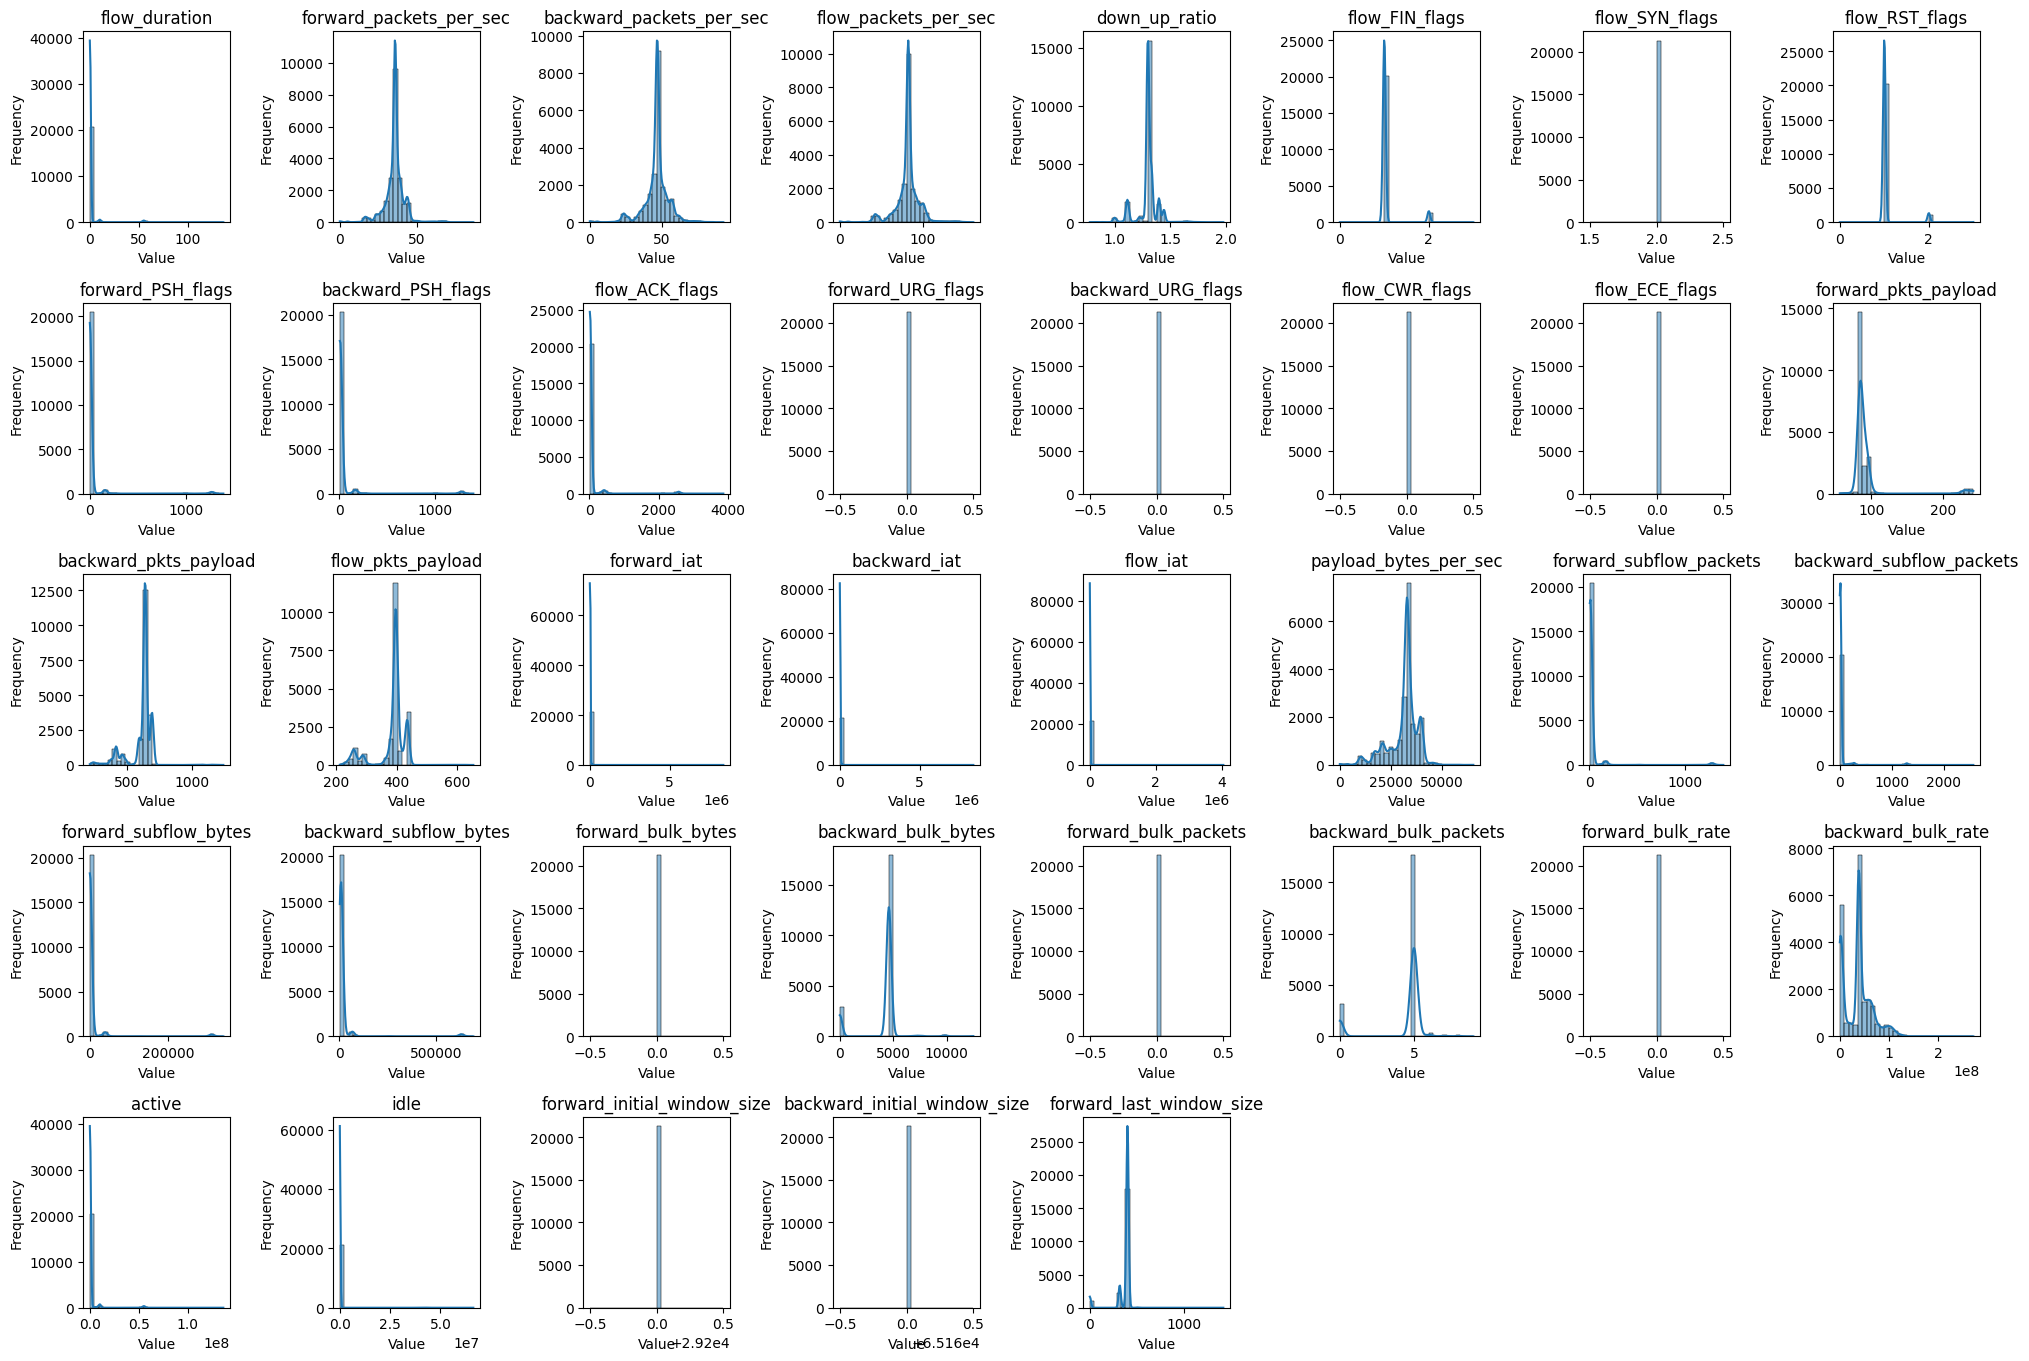

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = prob_t [numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(prob_t[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## bruteforce_gabungan (test)

In [ ]:
bruteforce_gabungan = test[
    (test['response_port'] == 443) &
    (test['origin_host'] == '103.255.15.23') &
    (
        (test['response_host'] == '128.199.242.104') |
        (test['response_host'] == '128.199.88.81')
    )
]

# Menghitung jumlah baris yang memenuhi kondisi
row_count = len(bruteforce_gabungan)

# Mendapatkan nilai minimum dan maksimum dari kolom 'origin_port'
min_origin_port = bruteforce_gabungan['origin_port'].min()
max_origin_port = bruteforce_gabungan['origin_port'].max()

# Menampilkan hasil
print(f"Jumlah baris yang memenuhi kondisi: {row_count}")
print(f"Nilai minimum dari 'origin_port': {min_origin_port}")
print(f"Nilai maksimum dari 'origin_port': {max_origin_port}")

Jumlah baris yang memenuhi kondisi: 5691
Nilai minimum dari 'origin_port': 1056
Nilai maksimum dari 'origin_port': 65534


In [ ]:
test = test.drop(
    test[
    (test['response_port'] == 443) &
    (test['origin_host'] == '103.255.15.23') &
    (
        (test['response_host'] == '128.199.242.104') |
        (test['response_host'] == '128.199.88.81')
    )
].index
)

# Menampilkan jumlah baris setelah penghapusan
print(f"Jumlah baris setelah penghapusan: {len(test)}")

Jumlah baris setelah penghapusan: 110358


###  Distribusi Data

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    3420.000000              4232.000000               4122.000000   
mean        7.707198                10.852029                 10.314627   
std         7.377940                14.105653                 14.086820   
min         0.026483                 0.225185                  0.241662   
25%         3.211831                 1.577360                  1.469624   
50%         6.639774                 3.273581                  2.600310   
75%        11.105704                14.094645                 12.087068   
max       186.265559                75.108859                 70.275919   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           4192.000000    3899.000000     4794.000000     3726.000000   
mean              21.903969       0.906777        2.018565        2.003757   
std               28.457649       0.121266        0.185736        0.061190   
min         

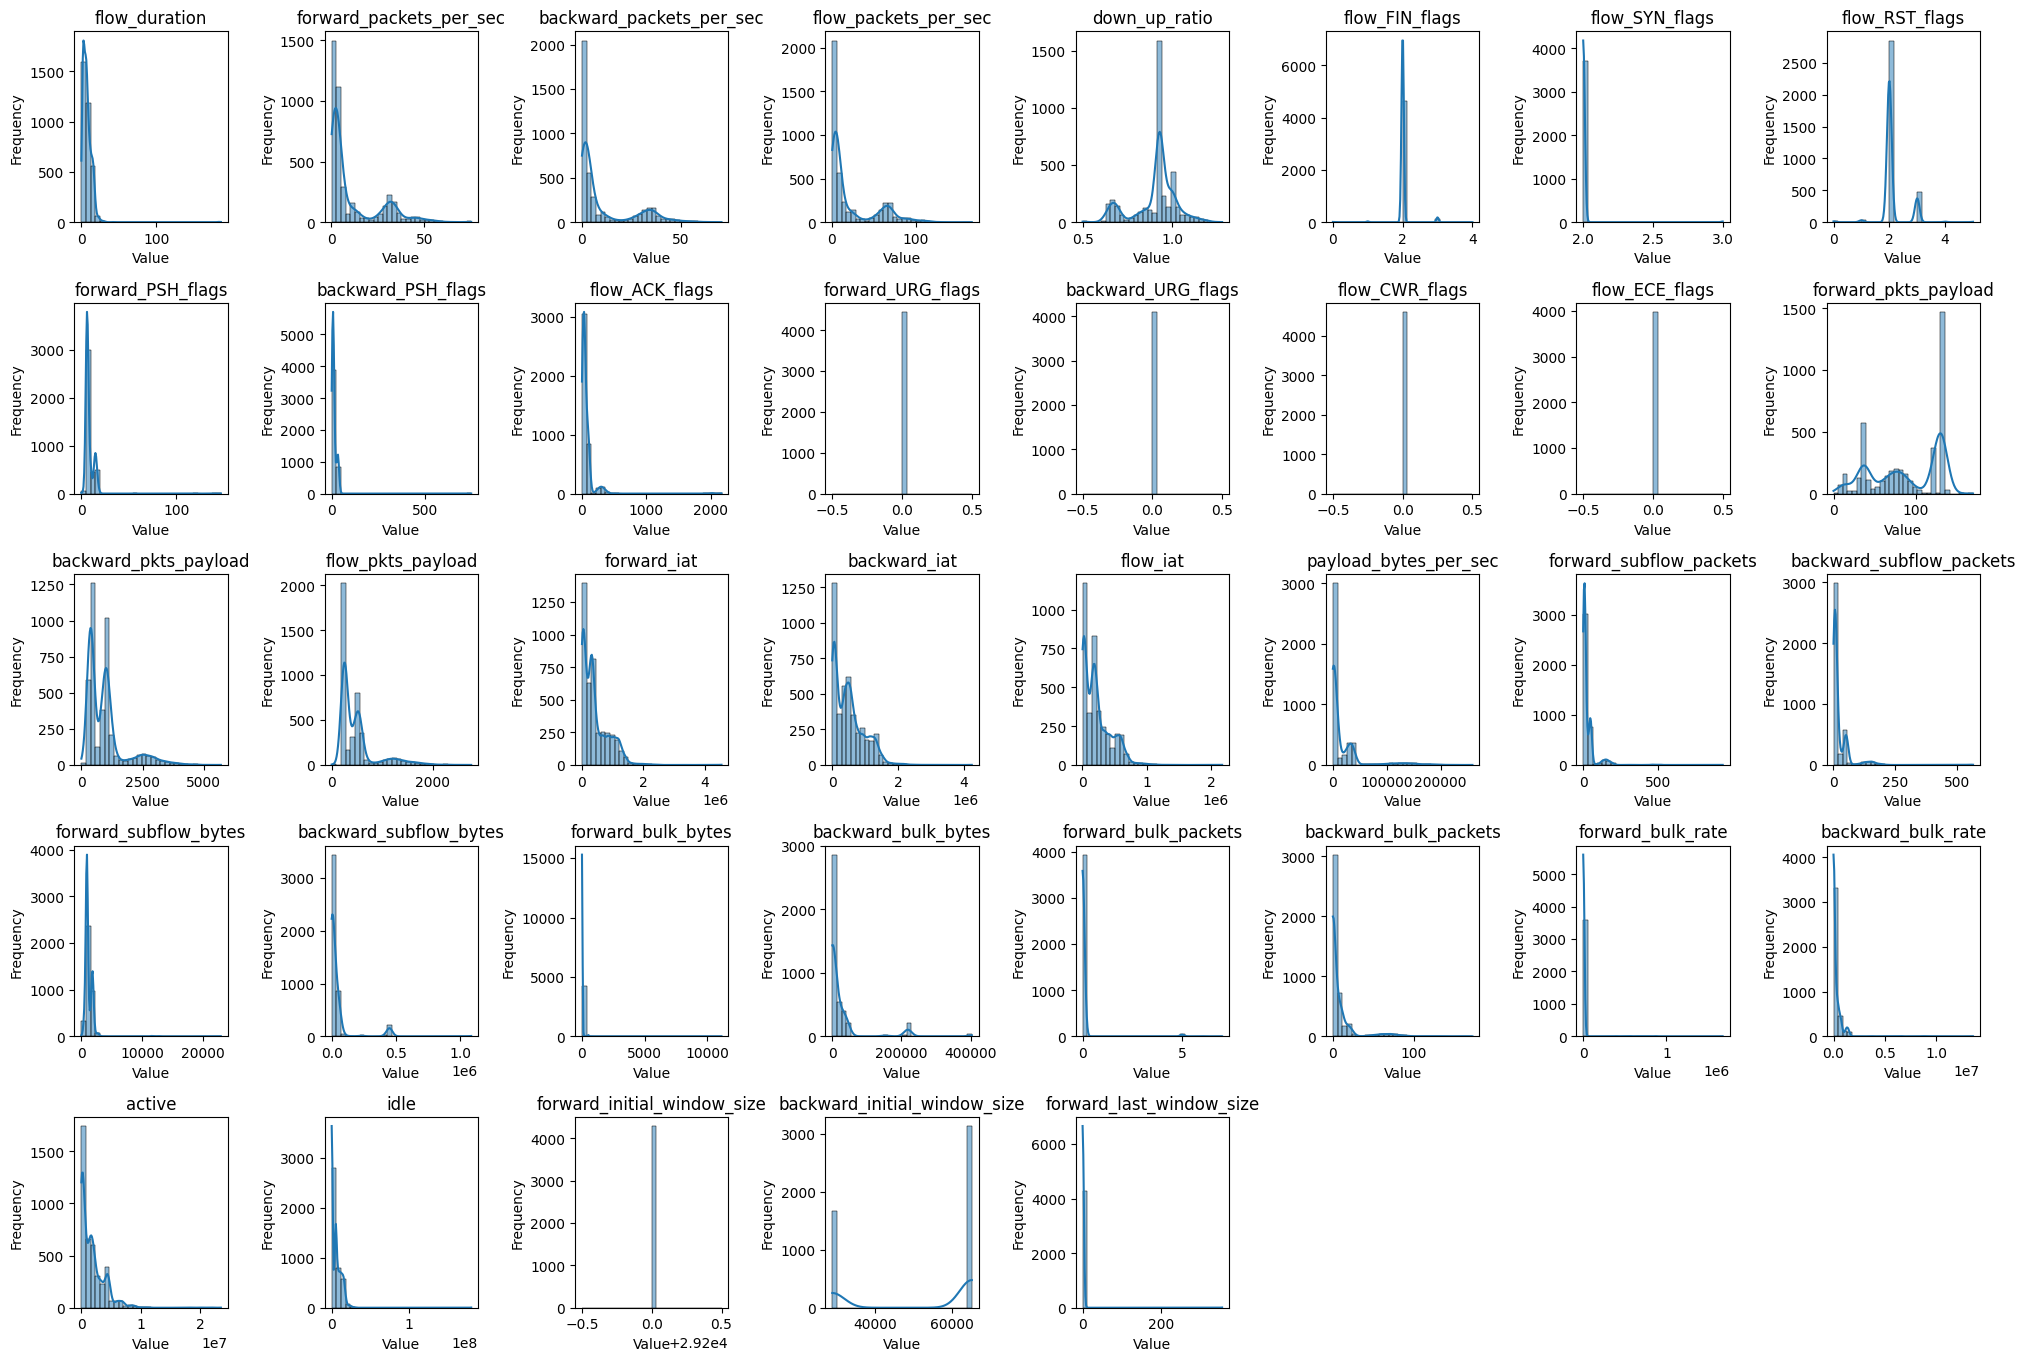

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = bruteforce_gabungan [numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(bruteforce_gabungan[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = bruteforce_gabungan.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (bruteforce_gabungan.isnull().sum() / len(bruteforce_gabungan)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                           2271   39.905113
forward_packets_per_sec                 1459   25.636971
backward_packets_per_sec                1569   27.569847
flow_packets_per_sec                    1499   26.339835
down_up_ratio                           1792   31.488315
flow_FIN_flags                           897   15.761729
flow_SYN_flags                          1965   34.528202
flow_RST_flags                          2287   40.186259
forward_PSH_flags                       1690   29.696011
backward_PSH_flags                       941   16.534880
flow_ACK_flags                          1543   27.112985
forward_URG_flags              

### Imputasi median

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
bruteforce_gabungan[columns_to_impute] = imputer.fit_transform(bruteforce_gabungan[columns_to_impute])

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = bruteforce_gabungan.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (bruteforce_gabungan.isnull().sum() / len(bruteforce_gabungan)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count    5691.000000              5691.000000               5691.000000   
mean        7.281241                 8.909145                  8.187802   
std         5.742954                12.605630                 12.474189   
min         0.026483                 0.225185                  0.241662   
25%         5.868994                 2.458111                  1.934765   
50%         6.639774                 3.273581                  2.600310   
75%         7.026994                 6.396681                  5.814474   
max       186.265559                75.108859                 70.275919   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count           5691.000000    5691.000000     5691.000000     5691.000000   
mean              17.726097       0.913639        2.015639        2.002460   
std               25.402979       0.100879        0.170602        0.049542   
min         

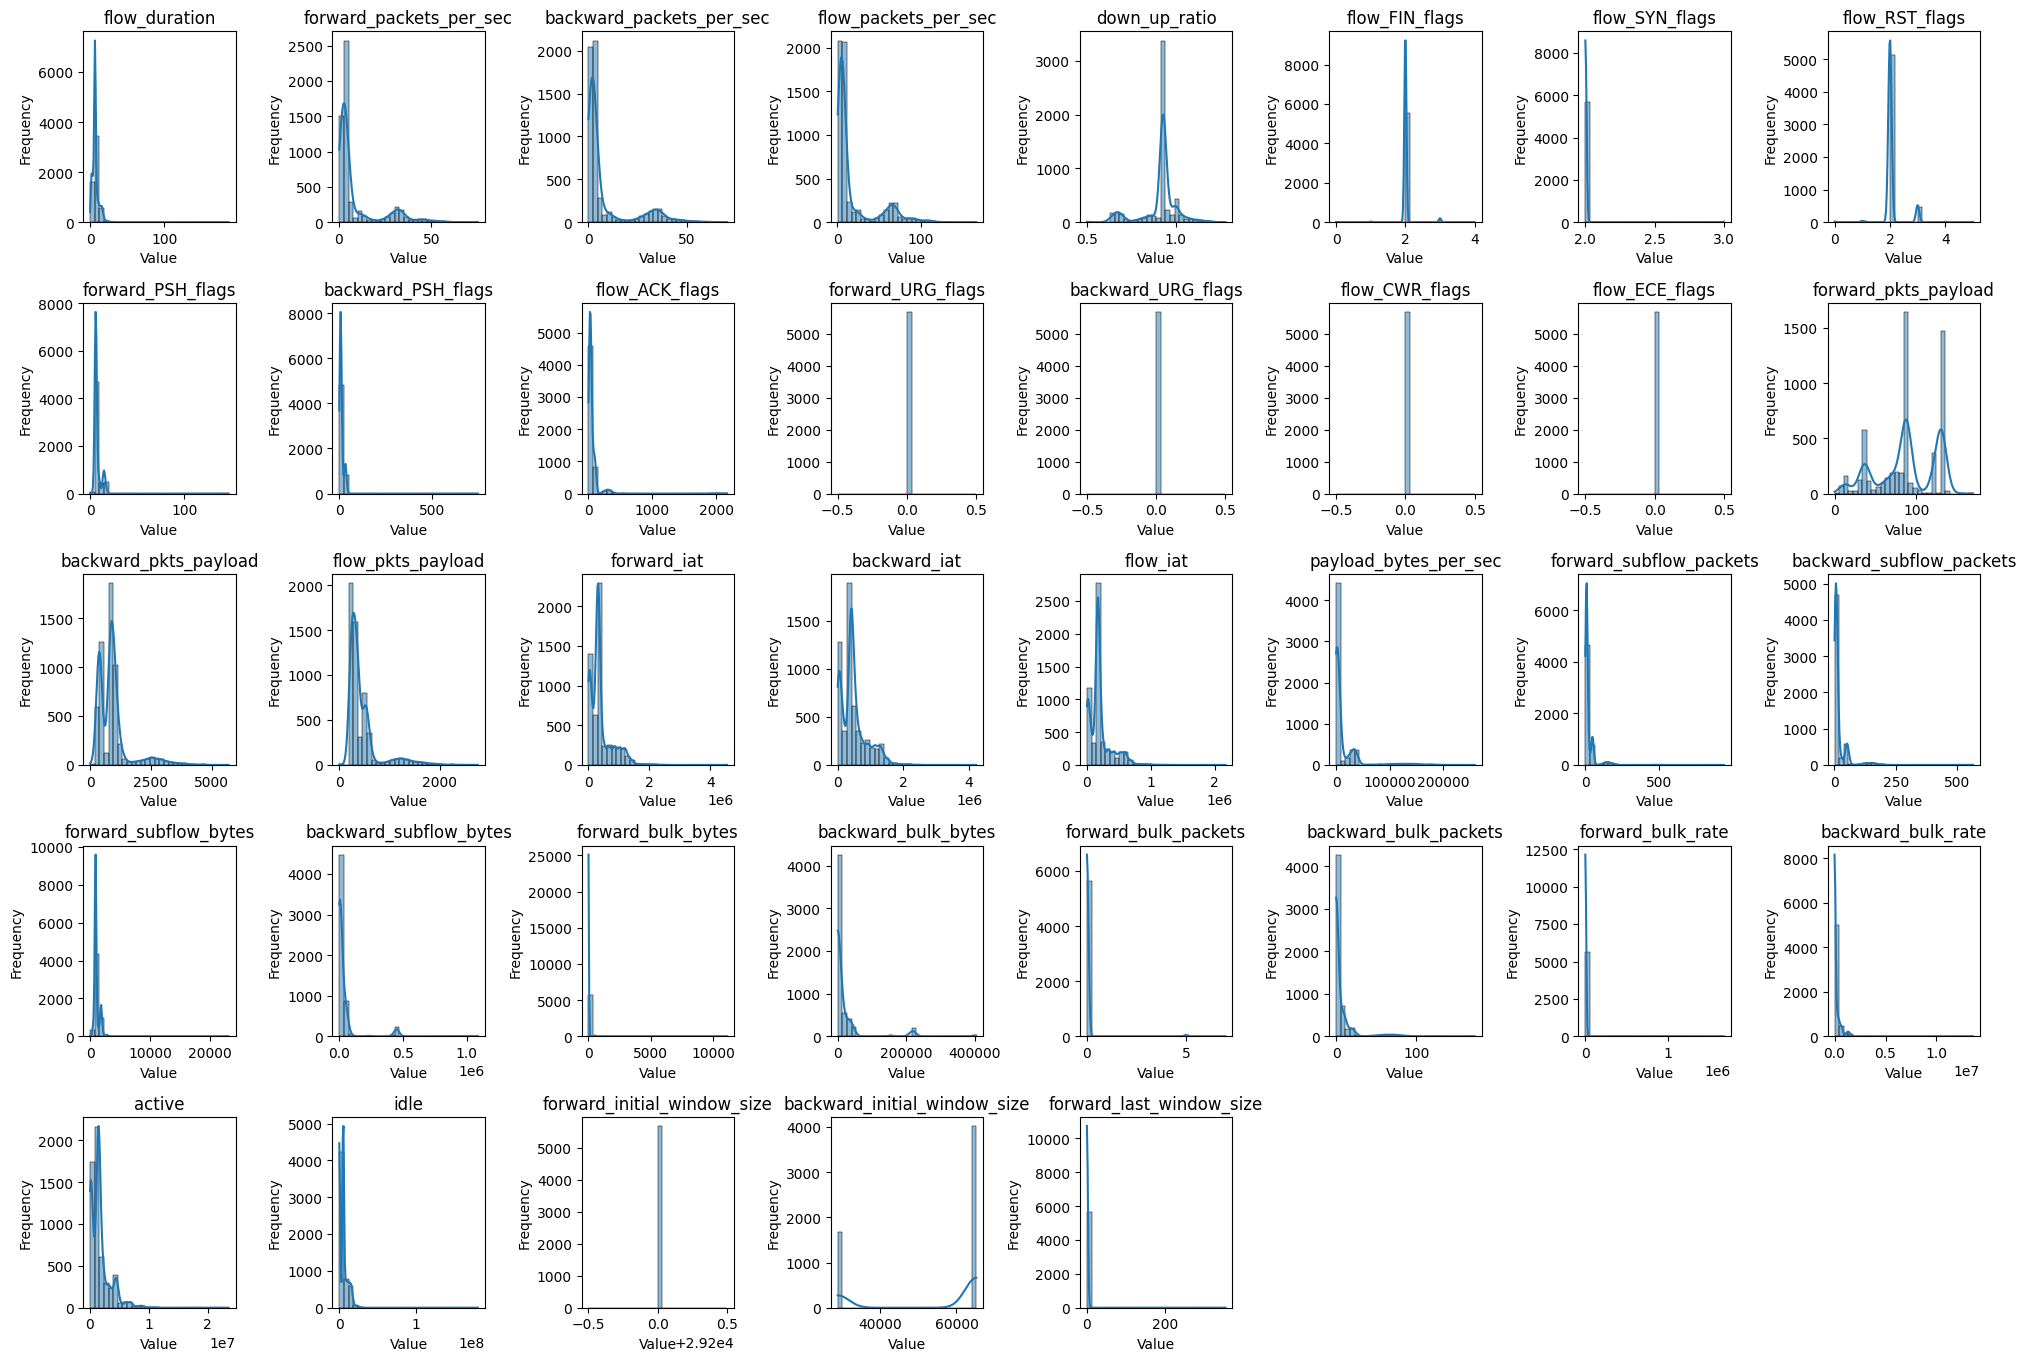

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = bruteforce_gabungan[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(bruteforce_gabungan[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sisa Test

In [ ]:
test

id      origin_host  origin_port    response_host  \
0       ClDOIi3yLGMfeRPzAc    103.255.15.23        49188    13.227.228.83   
1       C9chsd1cHTOBBHe6Q2  202.169.224.219         5678  255.255.255.255   
2       CUOe3U1NC5Nln7cItf   103.255.15.150        32976          8.8.8.8   
5       CYtGMq4cBAtPcpCK2k      81.70.76.15         8000   103.255.15.150   
6       CmGyY73cRBoxOrBrhj    103.255.15.27        43390    103.255.15.23   
...                    ...              ...          ...              ...   
138800  CWXgM92AOvagYVekD3    103.255.15.67        52975    103.255.15.23   
138801  CMmDuU3aNTnOz4ZwSi    103.255.15.27        37214    103.255.15.23   
138802  CQO5h64B0lXTYRlsNf   103.255.15.150        38336          8.8.8.8   
138803  CWZZN23jtBV7sZsBLi   103.255.15.150        37267          8.8.8.8   
138804  CAYAeJ26bhNrdT6KVc   103.255.15.150        50399          8.8.8.8   

        response_port  flow_duration  forward_packets_per_sec  \
0                 443       1.738424                 8.628505   
1                5678       0.000000                 0.000000   
2                  53            NaN                80.446972   
5                4000            NaN                 0.000000   
6               42000       0.000105              9510.893424   
...               ...            ...                      ...   
138800            161            NaN              7307.149826   
138801          42001       0.000144              6944.211921   
138802             53            NaN                      NaN   
138803             53       0.025681                77.878530   
138804             53       0.023551                84.922130   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                            NaN             16.681776            NaN  ...   
1                       0.000000              0.000000            0.0  ...   
2                            NaN                   NaN            1.0  ...   
5                       0.000000              0.000000            0.0  ...   
6                    9510.893424                   NaN            1.0  ...   
...                          ...                   ...            ...  ...   
138800                       NaN                   NaN            1.0  ...   
138801                       NaN                   NaN            1.0  ...   
138802                 33.424744                   NaN            1.0  ...   
138803                       NaN            155.757060            NaN  ...   
138804                 84.922130                   NaN            NaN  ...   

        backward_bulk_bytes  forward_bulk_packets  backward_bulk_packets  \
0                       0.0                   0.0                    NaN   
1                       NaN                   0.0                    NaN   
2                       0.0                   NaN                    0.0   
5                       0.0                   NaN                    0.0   
6                       NaN                   0.0                    NaN   
...                     ...                   ...                    ...   
138800                  0.0                   0.0                    0.0   
138801                  NaN                   NaN                    0.0   
138802                  0.0                   0.0                    0.0   
138803                  0.0                   0.0                    0.0   
138804                  0.0                   0.0                    0.0   

        forward_bulk_rate  backward_bulk_rate        active  idle  \
0                     NaN                 0.0  1.738440e+06   NaN   
1                     NaN                 NaN  0.000000e+00   0.0   
2                     0.0                 0.0  2.486110e+04   0.0   
5                     NaN                 0.0  0.000000e+00   NaN   
6                     NaN                 0.0           NaN   0.0   
...                   ...                 ...         

In [ ]:
# Mengecek nilai unik dan jumlah kemunculannya di kolom 'origin_host'
unique_origin_hosts = test['origin_host'].value_counts()

# Menyaring hasil untuk hanya menampilkan yang jumlahnya di atas 4000
filtered_hosts = unique_origin_hosts[unique_origin_hosts > 20]

# Menampilkan hasil
print("Nilai unik dari 'origin_host' dengan jumlah kemunculan di atas 4000:")
print(filtered_hosts)

Nilai unik dari 'origin_host' dengan jumlah kemunculan di atas 4000:
origin_host
103.255.15.23                47769
103.255.15.150               24446
103.255.15.27                14176
103.255.15.20                 6673
103.255.15.67                 3595
fe80::c1a7:7791:969e:3c06     1927
103.255.15.21                  873
0.0.0.0                        579
142.252.253.26                 563
24.212.41.209                  536
103.255.15.146                 467
24.212.71.31                   457
103.255.15.15                  398
202.169.224.219                389
103.255.15.110                 357
100.64.65.78                   356
103.255.15.124                 343
92.63.197.23                   316
103.255.15.65                  310
103.255.15.206                 307
103.255.15.203                 305
103.255.15.40                  286
100.64.65.26                   277
103.210.35.245                 247
103.255.15.127                 245
103.255.15.132                 242
202.169.2

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count   69586.000000             75954.000000              71363.000000   
mean       10.466690              2141.067371               2056.051445   
std        82.507703              5546.457499               5042.759102   
min         0.000000                 0.000000                  0.000000   
25%         0.000111                 2.244803                  1.993501   
50%         0.024901                49.222161                 44.598905   
75%         0.164593                82.178413                 81.863239   
max     13544.854760            199728.761905             110376.421053   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count          71321.000000   79405.000000    90246.000000    88305.000000   
mean            4246.672282       0.822405        0.392738        0.682577   
std            10283.737694       0.549454        0.806473        0.985091   
min         

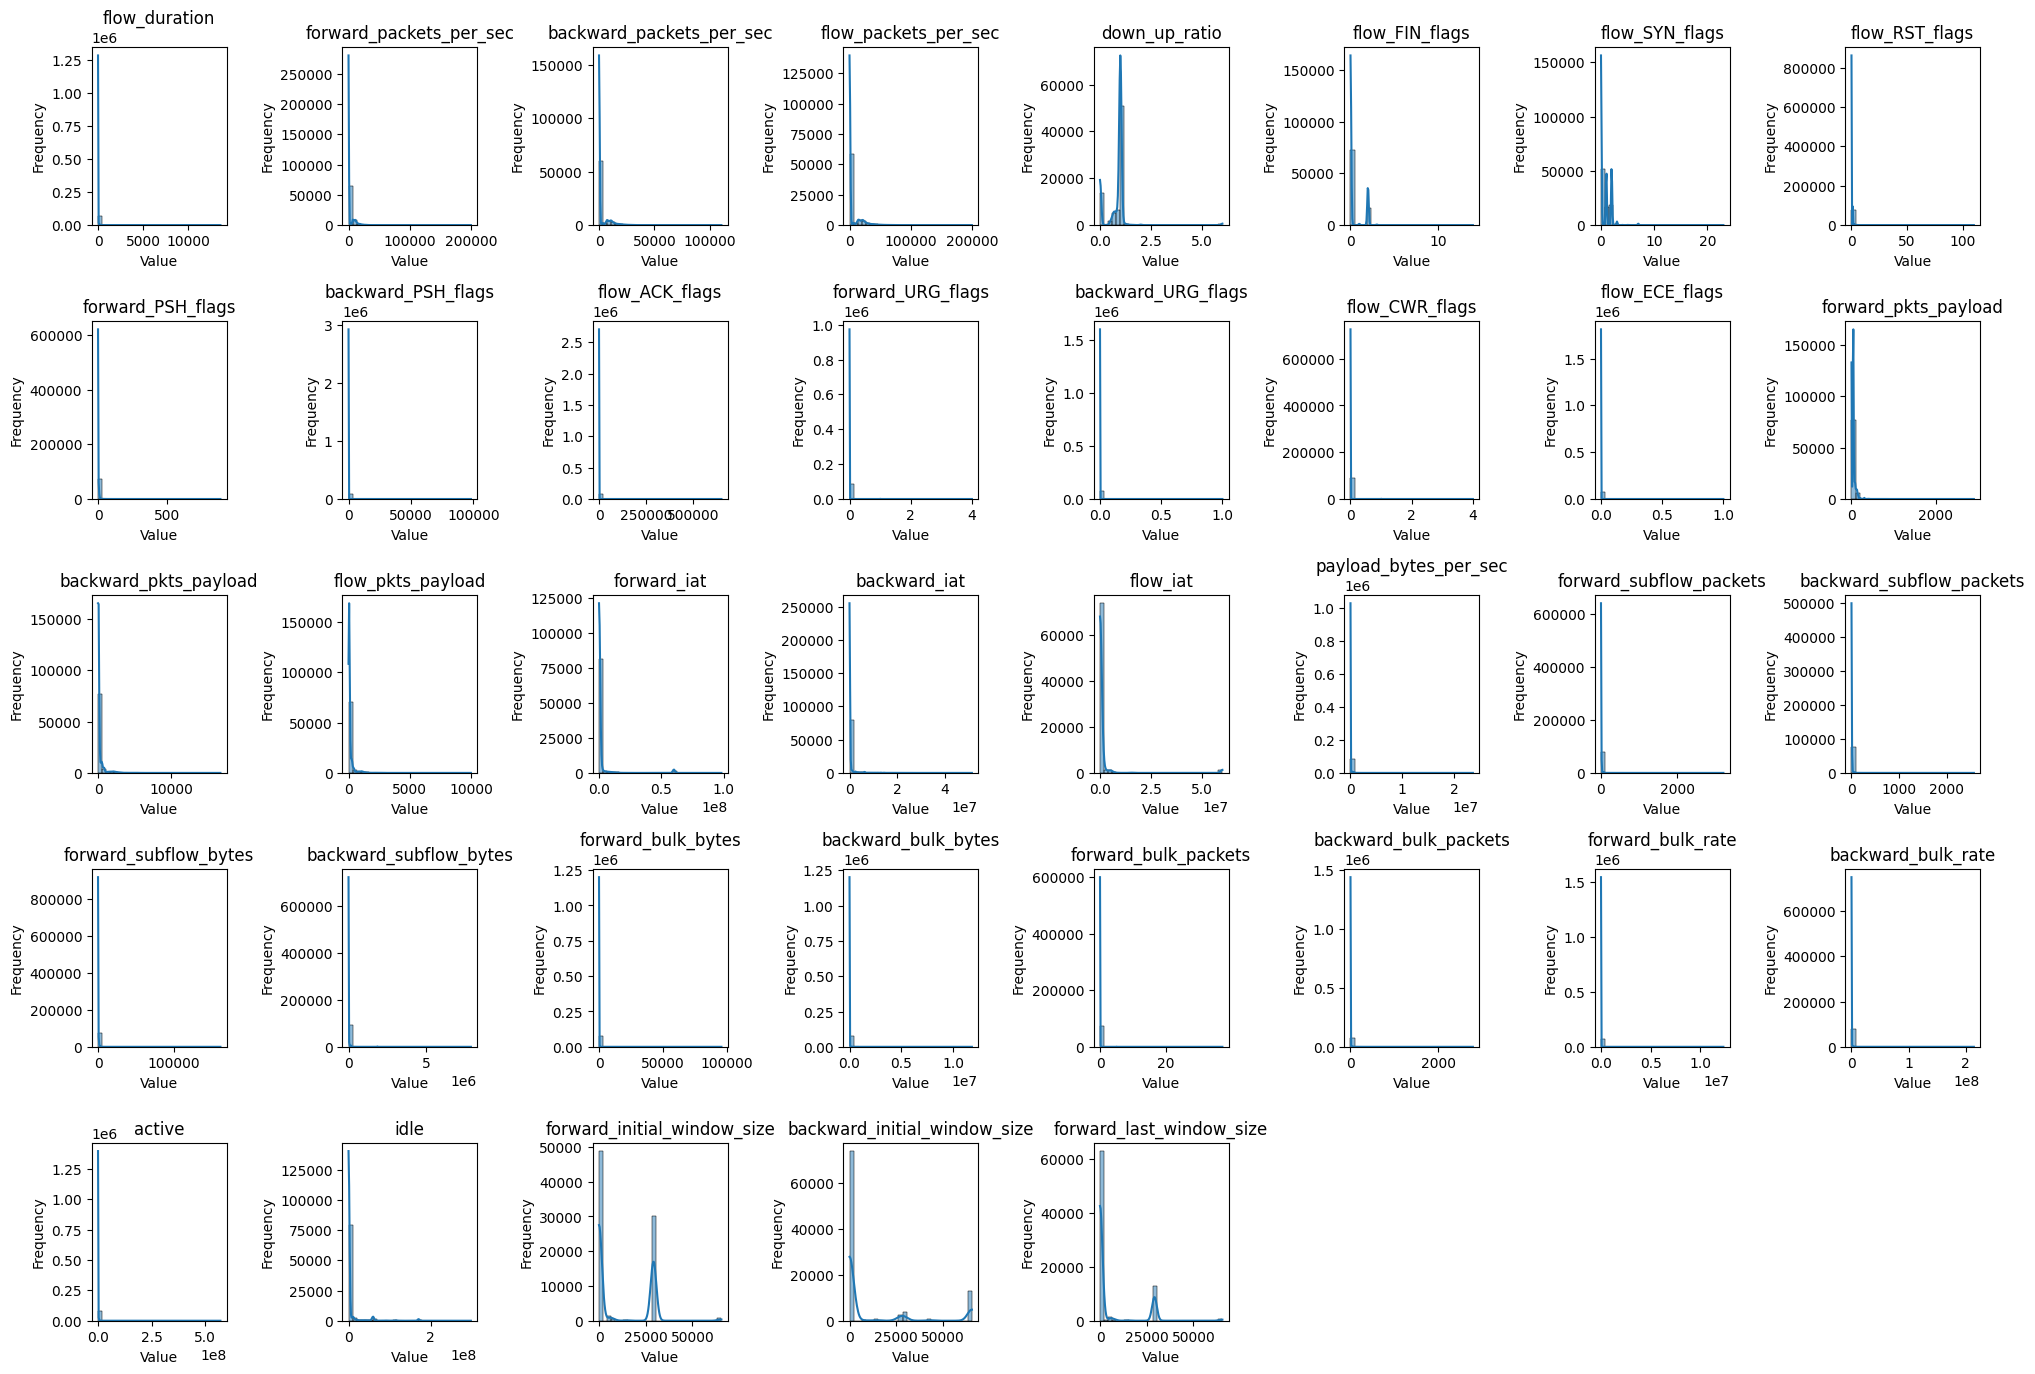

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = test[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(test[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### missing value

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = test.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (test.isnull().sum() / len(test)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0    0.000000
origin_host                                0    0.000000
origin_port                                0    0.000000
response_host                              0    0.000000
response_port                              0    0.000000
flow_duration                          40772   36.945215
forward_packets_per_sec                34404   31.174903
backward_packets_per_sec               38995   35.335001
flow_packets_per_sec                   39037   35.373059
down_up_ratio                          30953   28.047808
flow_FIN_flags                         20112   18.224324
flow_SYN_flags                         22053   19.983146
flow_RST_flags                         35568   32.229653
forward_PSH_flags                      36920   33.454756
backward_PSH_flags                     28040   25.408217
flow_ACK_flags                         32146   29.128835
forward_URG_flags              

### Imputasi median

In [ ]:
from sklearn.impute import SimpleImputer

# Daftar kolom yang akan diimputasi
columns_to_impute = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes',
    'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active',
    'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Inisialisasi SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(strategy='median')

# Mengimputasi kolom-kolom yang ditentukan dengan median
test[columns_to_impute] = imputer.fit_transform(test[columns_to_impute])

In [ ]:
test

id      origin_host  origin_port    response_host  \
0       ClDOIi3yLGMfeRPzAc    103.255.15.23        49188    13.227.228.83   
1       C9chsd1cHTOBBHe6Q2  202.169.224.219         5678  255.255.255.255   
2       CUOe3U1NC5Nln7cItf   103.255.15.150        32976          8.8.8.8   
5       CYtGMq4cBAtPcpCK2k      81.70.76.15         8000   103.255.15.150   
6       CmGyY73cRBoxOrBrhj    103.255.15.27        43390    103.255.15.23   
...                    ...              ...          ...              ...   
138800  CWXgM92AOvagYVekD3    103.255.15.67        52975    103.255.15.23   
138801  CMmDuU3aNTnOz4ZwSi    103.255.15.27        37214    103.255.15.23   
138802  CQO5h64B0lXTYRlsNf   103.255.15.150        38336          8.8.8.8   
138803  CWZZN23jtBV7sZsBLi   103.255.15.150        37267          8.8.8.8   
138804  CAYAeJ26bhNrdT6KVc   103.255.15.150        50399          8.8.8.8   

        response_port  flow_duration  forward_packets_per_sec  \
0                 443       1.738424                 8.628505   
1                5678       0.000000                 0.000000   
2                  53       0.024901                80.446972   
5                4000       0.024901                 0.000000   
6               42000       0.000105              9510.893424   
...               ...            ...                      ...   
138800            161       0.024901              7307.149826   
138801          42001       0.000144              6944.211921   
138802             53       0.024901                49.222161   
138803             53       0.025681                77.878530   
138804             53       0.023551                84.922130   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                      44.598905             16.681776            1.0  ...   
1                       0.000000              0.000000            0.0  ...   
2                      44.598905             97.186207            1.0  ...   
5                       0.000000              0.000000            0.0  ...   
6                    9510.893424             97.186207            1.0  ...   
...                          ...                   ...            ...  ...   
138800                 44.598905             97.186207            1.0  ...   
138801                 44.598905             97.186207            1.0  ...   
138802                 33.424744             97.186207            1.0  ...   
138803                 44.598905            155.757060            1.0  ...   
138804                 84.922130             97.186207            1.0  ...   

        backward_bulk_bytes  forward_bulk_packets  backward_bulk_packets  \
0                       0.0                   0.0                    0.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   0.0                    0.0   
5                       0.0                   0.0                    0.0   
6                       0.0                   0.0                    0.0   
...                     ...                   ...                    ...   
138800                  0.0                   0.0                    0.0   
138801                  0.0                   0.0                    0.0   
138802                  0.0                   0.0                    0.0   
138803                  0.0                   0.0                    0.0   
138804                  0.0                   0.0                    0.0   

        forward_bulk_rate  backward_bulk_rate        active  idle  \
0                     0.0                 0.0  1.738440e+06   0.0   
1                     0.0                 0.0  0.000000e+00   0.0   
2                     0.0                 0.0  2.486110e+04   0.0   
5                     0.0                 0.0  0.000000e+00   0.0   
6                     0.0                 0.0  2.482104e+04   0.0   
...                   ...                 ...         

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count  110358.000000            110358.000000             110358.000000   
mean        6.608949              1488.936645               1345.304677   
std        65.710310              4702.297247               4167.533233   
min         0.000000                 0.000000                  0.000000   
25%         0.024296                21.037092                 36.042519   
50%         0.024901                49.222161                 44.598905   
75%         0.025801                79.004398                 77.936414   
max     13544.854760            199728.761905             110376.421053   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count         110358.000000  110358.000000   110358.000000   110358.000000   
mean            2778.872141       0.872217        0.321164        0.546177   
std             8501.897801       0.472850        0.744885        0.922489   
min         

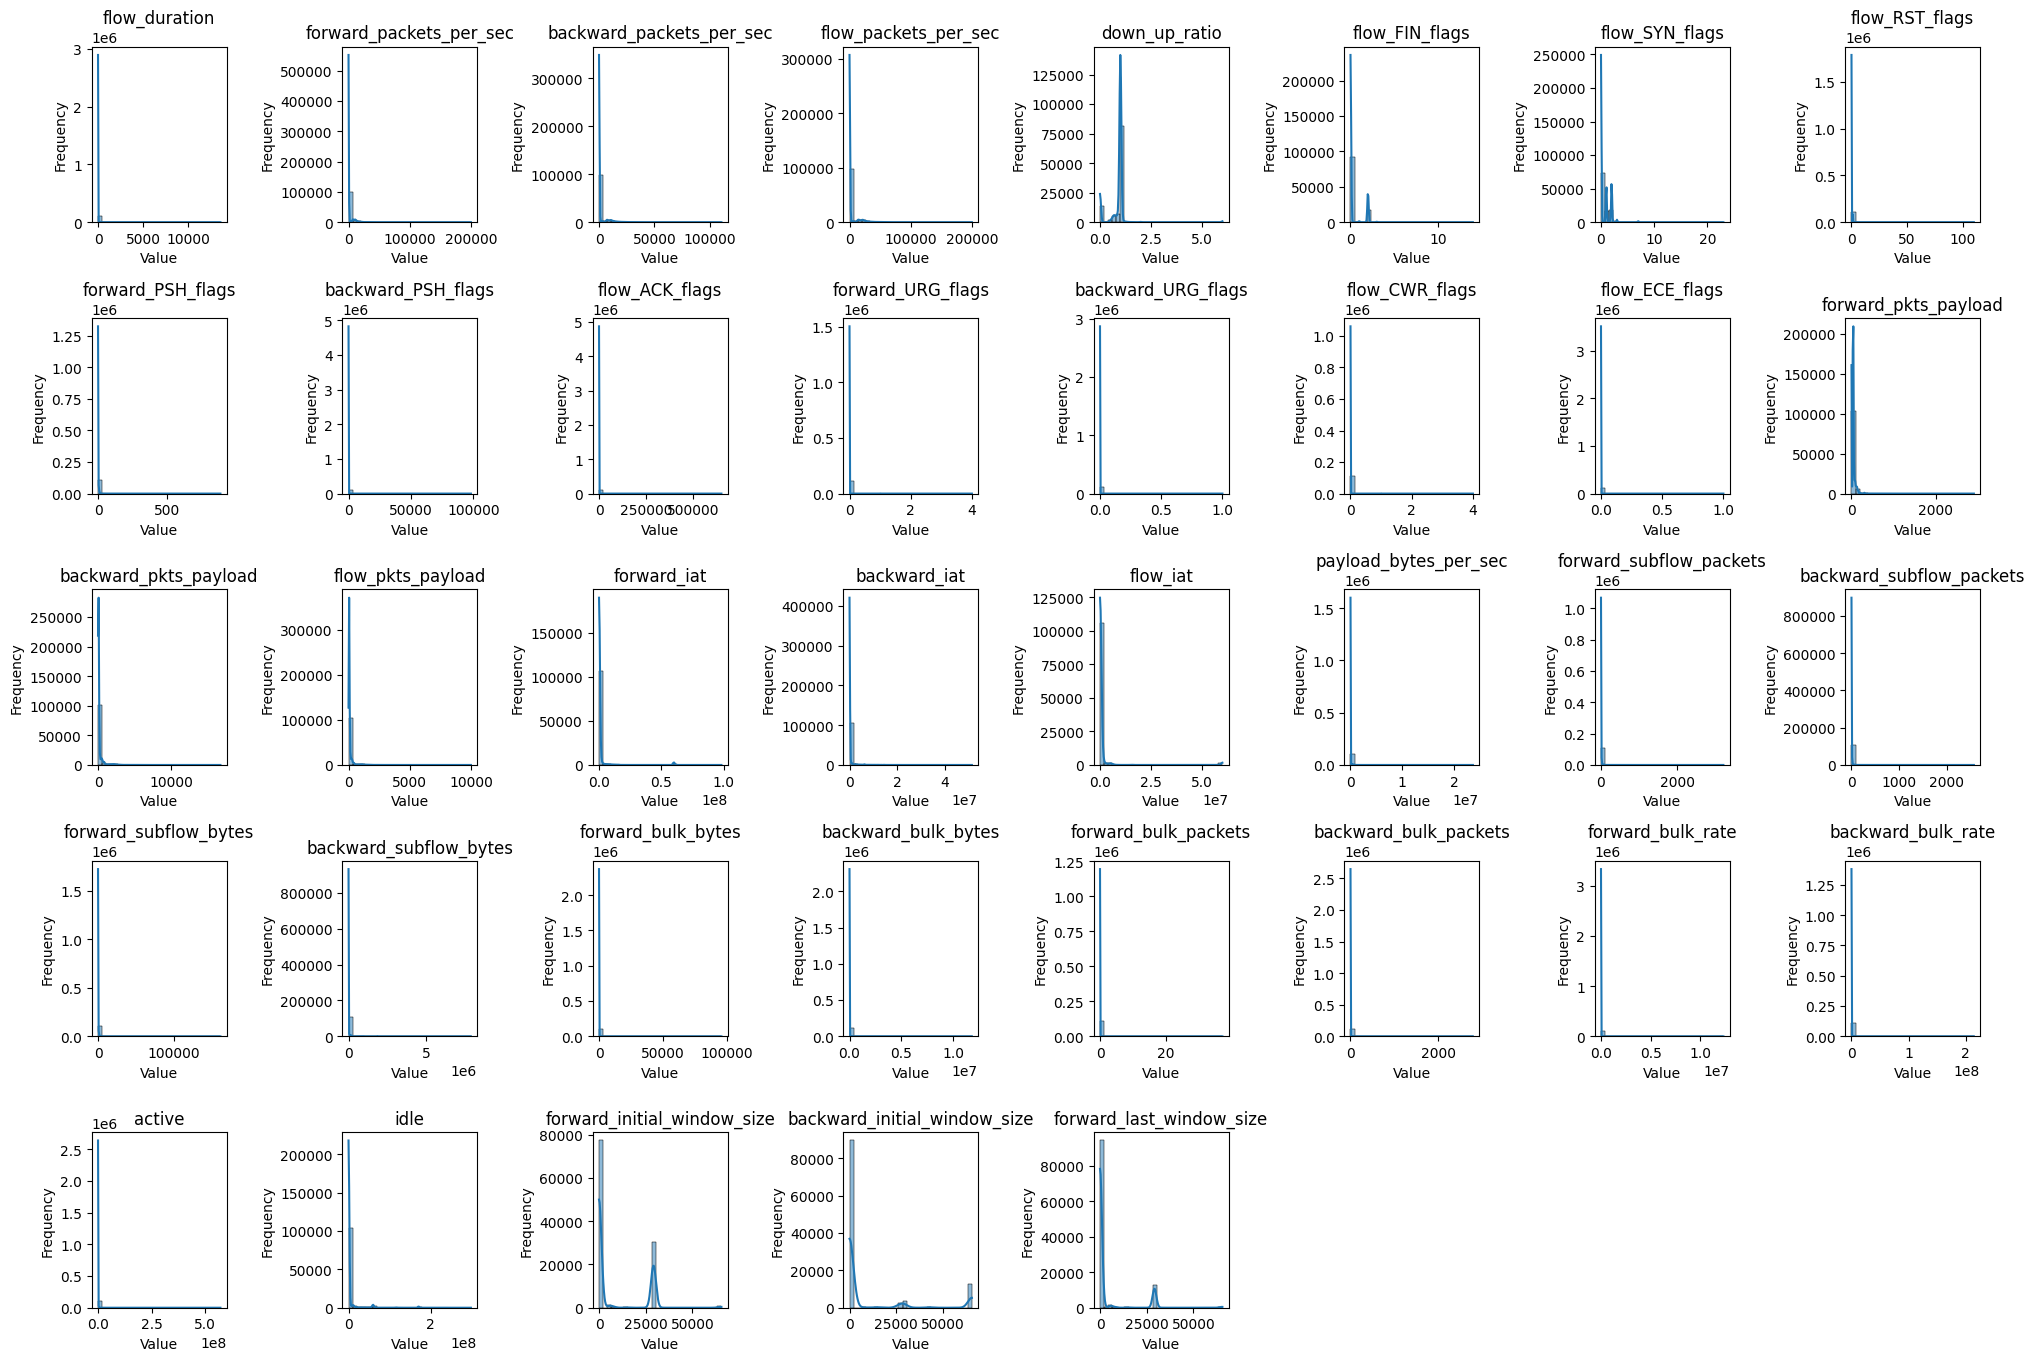

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = test[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(test[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Menyatukan Data Test Setelah Imputasi

In [ ]:
# List semua dataframe
dataframes = [
    Cryptominer_t,
    prob_t,
    bruteforce_gabungan,
    test
]

# Menggabungkan semua dataframe menjadi satu
datatest_new = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Syntax buat melihat jumlah missing value pada setiap kolom
missing_values = datatest_new.isnull().sum()

# Melihat proporsi missing values per kolom (dalam persentase)
missing_percentage = (datatest_new.isnull().sum() / len(datatest_new)) * 100

# Menyusun data ke dalam DataFrame untuk ditampilkan
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Menampilkan DataFrame yang berisi informasi tentang missing values
print(missing_info)

                              Missing Values  Percentage
id                                         0         0.0
origin_host                                0         0.0
origin_port                                0         0.0
response_host                              0         0.0
response_port                              0         0.0
flow_duration                              0         0.0
forward_packets_per_sec                    0         0.0
backward_packets_per_sec                   0         0.0
flow_packets_per_sec                       0         0.0
down_up_ratio                              0         0.0
flow_FIN_flags                             0         0.0
flow_SYN_flags                             0         0.0
flow_RST_flags                             0         0.0
forward_PSH_flags                          0         0.0
backward_PSH_flags                         0         0.0
flow_ACK_flags                             0         0.0
forward_URG_flags              

       flow_duration  forward_packets_per_sec  backward_packets_per_sec  \
count  138805.000000            138805.000000             138805.000000   
mean        5.762822              1189.639934               1077.025190   
std        58.697995              4234.091001               3753.411882   
min         0.000000                 0.000000                  0.000000   
25%         0.024891                23.111320                 33.439907   
50%         0.024901                49.222161                 44.598905   
75%         0.268422                71.691990                 61.410015   
max     13544.854760            199728.761905             110376.421053   

       flow_packets_per_sec  down_up_ratio  flow_FIN_flags  flow_SYN_flags  \
count         138805.000000  138805.000000   138805.000000   138805.000000   
mean            2222.695029       0.930150        0.500220        0.823277   
std             7659.552919       0.460411        0.787724        1.007146   
min         

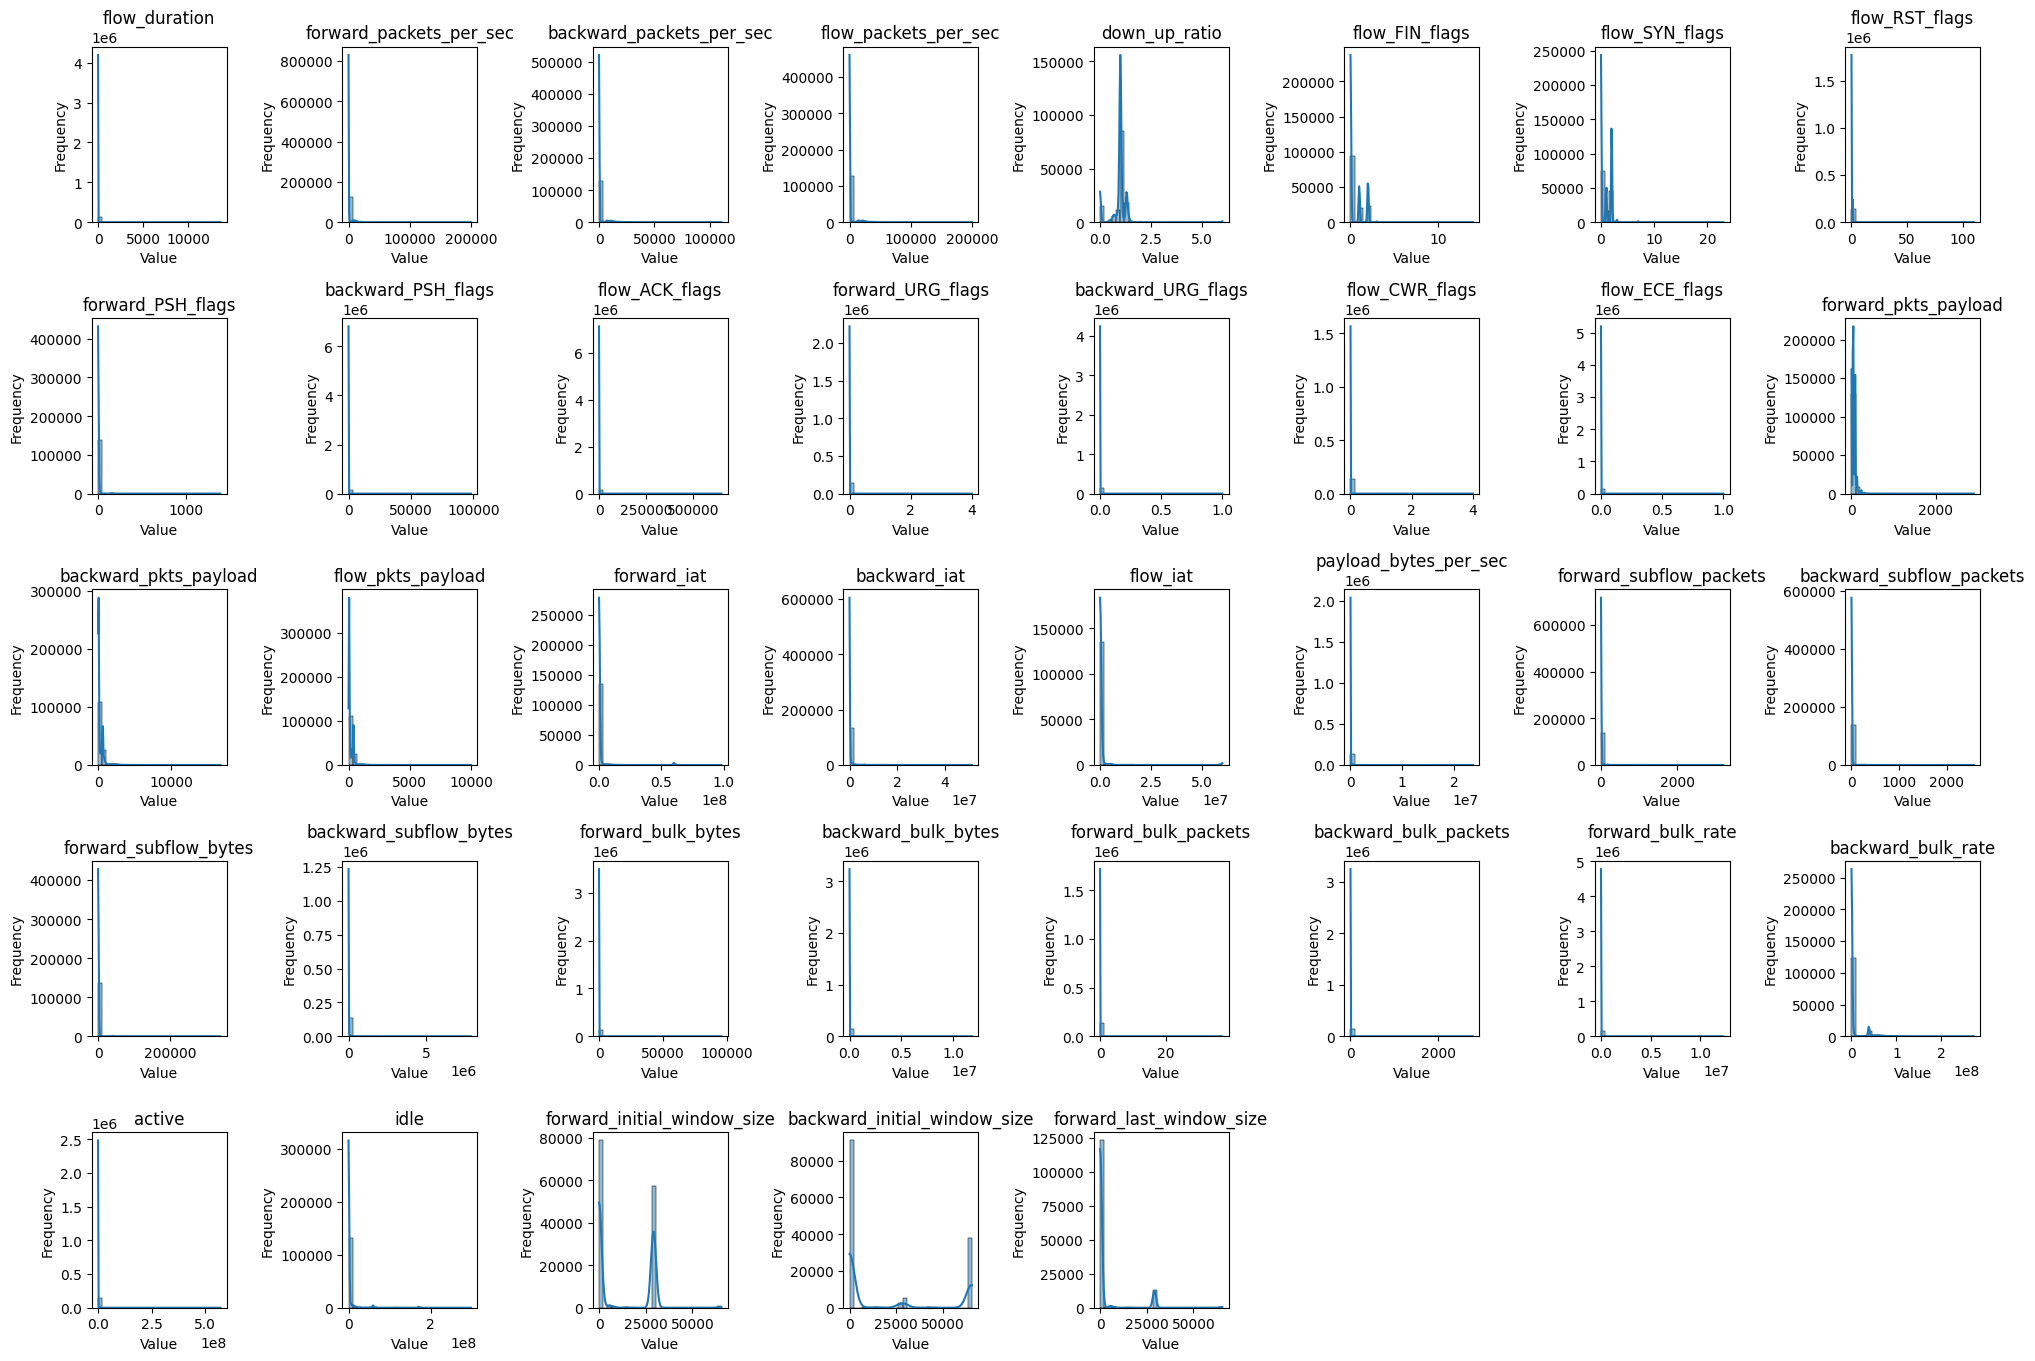

In [ ]:
# Daftar variabel numerik yang ingin dianalisis
numeric_columns = [
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags', 'flow_SYN_flags',
    'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'flow_ACK_flags',
    'forward_URG_flags', 'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets', 'forward_subflow_bytes',
    'backward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes',
    'forward_bulk_packets', 'backward_bulk_packets', 'forward_bulk_rate',
    'backward_bulk_rate', 'active', 'idle', 'forward_initial_window_size',
    'backward_initial_window_size', 'forward_last_window_size'
]

# Menghitung statistik deskriptif untuk variabel numerik
stats = datatest_new[numeric_columns].describe()

# Menampilkan statistik deskriptif
print(stats)

# Plot histogram untuk masing-masing variabel numerik
plt.figure(figsize=(20, 16))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 8, i)  # Mengatur jumlah baris dan kolom subplot
    sns.histplot(datatest_new[column].dropna(), bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Simpan Data Test

In [ ]:
datatest_new.to_csv('datatest_new.csv', index=False)

# Modeling

### Feature Engineering (Train)

In [1]:
!gdown 1vTnrMdj7ne2Ipn8Cwt5M3GYNT9bs4-KC
!gdown 1PXVT6J9KIbcgbO0cYiGV8bqJdGuNJPts

Downloading...
From (original): https://drive.google.com/uc?id=1vTnrMdj7ne2Ipn8Cwt5M3GYNT9bs4-KC
From (redirected): https://drive.google.com/uc?id=1vTnrMdj7ne2Ipn8Cwt5M3GYNT9bs4-KC&confirm=t&uuid=bbe08509-e81f-43ab-95c5-caf057ffc196
To: /content/datatrain_new.csv
100% 119M/119M [00:02<00:00, 44.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PXVT6J9KIbcgbO0cYiGV8bqJdGuNJPts
To: /content/datatest_new.csv
100% 38.8M/38.8M [00:00<00:00, 97.0MB/s]


In [4]:
datatrain = pd.read_csv('/content/datatrain_new.csv')
datatest = pd.read_csv('/content/datatest_new.csv')

In [5]:
# Buat salinan dari data untuk menghindari modifikasi data asli
datatrain_new = datatrain.copy()

# Buat kolom baru dengan default value sebagai 'Benign & Background'
datatrain_new['traffic_class'] = 'Benign & Background'

# Kondisi untuk XMRIGCC Cryptominer
condition_xmrigcc = (
    ((datatrain_new['origin_port'] == 137) | (datatrain_new['origin_port'] == 138)) &
    ((datatrain_new['response_port'] == 137) | (datatrain_new['origin_port'] == 138)) &
    (datatrain_new['origin_host'] == '103.255.15.42') &
    (datatrain_new['response_host'] == '103.255.15.255')
)

# Kondisi untuk Probing
condition_probing = (
    (datatrain_new['response_port'] == 443) &
    (datatrain_new['origin_host'] == '103.255.15.150') &
    (datatrain_new['response_host'] == '128.199.242.104')
)

# Kondisi untuk Bruteforce Gabungan
condition_bruteforce_gabungan = (
    (datatrain_new['response_port'] == 443) &
    (datatrain_new['origin_host'] == '103.255.15.23') &
    (
        (datatrain_new['response_host'] == '128.199.242.104') |
        (datatrain_new['response_host'] == '128.199.88.81')
    )
)

# Terapkan kondisi ke kolom 'traffic_class'
datatrain_new.loc[condition_xmrigcc, 'traffic_class'] = 'XMRIGCC Cryptominer'
datatrain_new.loc[condition_probing, 'traffic_class'] = 'Probing'
datatrain_new.loc[condition_bruteforce_gabungan, 'traffic_class'] = 'Bruteforce Gabungan'

# Lihat hasilnya
print(datatrain_new['traffic_class'].value_counts())

traffic_class
Benign & Background    331555
Probing                 63642
Bruteforce Gabungan     16891
XMRIGCC Cryptominer      4385
Name: count, dtype: int64


### One-hot Encoding

In [6]:
# One-hot encoding untuk kolom 'traffic_class'
onehot_encoded = pd.get_dummies(datatrain_new['traffic_class'], prefix='class')

# Ubah nilai boolean menjadi integer (False -> 0, True -> 1)
onehot_encoded = onehot_encoded.astype(int)

# Gabungkan hasil one-hot encoding ke dalam DataFrame asli
datatrain_new = pd.concat([datatrain_new, onehot_encoded], axis=1)

# Hapus kolom 'traffic_class'
datatrain_new = datatrain_new.drop(columns=['traffic_class'])

# Lihat hasilnya
datatrain_new

id                origin_host  origin_port  \
0       CsLPHW1EPeJUTU2CAa              103.255.15.42          137   
1       CiigOC4WG6x0dhY9Mj              103.255.15.42          137   
2       C8N6At1Y7m58t96le6              103.255.15.42          137   
3       CIH6aX3uLYvgftQof8              103.255.15.42          137   
4        C1aIXrX8UXbbhWhTc              103.255.15.42          137   
...                    ...                        ...          ...   
416468   CHxNto9XwaCGCeir2             103.255.15.150        48914   
416469  CAIvFe4HsxjL5A4CIk             103.255.15.150        39751   
416470   CUxjxWgzdF71Y5kXc              103.255.15.23        59005   
416471  CUU9WM3olirlj8Absj              103.255.15.23         7978   
416472  ChiYNu2wqDXFBTzHV4  fe80::c1a7:7791:969e:3c06        55784   

             response_host  response_port  flow_duration  \
0           103.255.15.255            137       1.528768   
1           103.255.15.255            137       1.528544   
2           103.255.15.255            137       1.528652   
3           103.255.15.255            137       1.528358   
4           103.255.15.255            137       1.528613   
...                    ...            ...            ...   
416468             8.8.8.8             53       0.025523   
416469             8.8.8.8             53       0.023767   
416470             8.8.8.8             53       0.025523   
416471       128.199.88.81            443       0.025523   
416472  2600:1901:0:38d7::             80       0.000000   

        forward_packets_per_sec  backward_packets_per_sec  \
0                      1.962364                  0.000000   
1                      1.962652                  0.000000   
2                      1.962513                  0.000000   
3                      1.962566                  0.000000   
4                      1.962563                  0.000000   
...                         ...                       ...   
416468                79.729009                 79.729009   
416469                84.150312                 84.150312   
416470                40.508629                 80.762198   
416471                46.391519                 44.877406   
416472                 0.000000                  0.000000   

        flow_packets_per_sec  down_up_ratio  ...        active  idle  \
0                   1.962364       0.000000  ...  1.528606e+06   0.0   
1                   1.962652       0.000000  ...  1.528544e+06   0.0   
2                   1.962566       0.000000  ...  1.528652e+06   0.0   
3                   1.962891       0.000000  ...  1.528606e+06   0.0   
4                   1.962563       0.000000  ...  1.528613e+06   0.0   
...                      ...            ...  ...           ...   ...   
416468            159.458019       1.000000  ...  2.508497e+04   0.0   
416469            168.300624       1.000000  ...  2.376699e+04   0.0   
416470             83.973412       1.000000  ...  2.476406e+04   0.0   
416471             90.658236       0.954198  ...  2.823808e+06   0.0   
416472              0.000000       1.000000  ...  0.000000e+00   0.0   

        forward_initial_window_size  backward_initial_window_size  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   
...                             ...                           ...   
416468                          0.0                           0.0   
416469                          0.0                           0.0   
416470                          0.0                           0.0   
416471                          0.0                       28960.0   
416472                      28800.0                           0.0   

        forward_last_window_size   

### Feature Engineering (Test)

In [7]:
# Buat salinan dari data untuk menghindari modifikasi data asli
datatest_new = datatest.copy()

# Buat kolom baru dengan default value sebagai 'Benign & Background'
datatest_new['traffic_class'] = 'Benign & Background'

# Kondisi untuk XMRIGCC Cryptominer
condition_xmrigcc = (
    ((datatest_new['origin_port'] == 137) | (datatest_new['origin_port'] == 138)) &
    ((datatest_new['response_port'] == 137) | (datatest_new['origin_port'] == 138)) &
    (datatest_new['origin_host'] == '103.255.15.42') &
    (datatest_new['response_host'] == '103.255.15.255')
)

# Kondisi untuk Probing
condition_probing = (
    (datatest_new['response_port'] == 443) &
    (datatest_new['origin_host'] == '103.255.15.150') &
    (datatest_new['response_host'] == '128.199.242.104')
)

# Kondisi untuk Bruteforce Gabungan
condition_bruteforce_gabungan = (
    (datatest_new['response_port'] == 443) &
    (datatest_new['origin_host'] == '103.255.15.23') &
    (
        (datatest_new['response_host'] == '128.199.242.104') |
        (datatest_new['response_host'] == '128.199.88.81')
    )
)

# Terapkan kondisi ke kolom 'traffic_class'
datatest_new.loc[condition_xmrigcc, 'traffic_class'] = 'XMRIGCC Cryptominer'
datatest_new.loc[condition_probing, 'traffic_class'] = 'Probing'
datatest_new.loc[condition_bruteforce_gabungan, 'traffic_class'] = 'Bruteforce Gabungan'

# Lihat hasilnya
print(datatest_new['traffic_class'].value_counts())

traffic_class
Benign & Background    110358
Probing                 21302
Bruteforce Gabungan      5691
XMRIGCC Cryptominer      1454
Name: count, dtype: int64


### One-hot Encoding

In [8]:
# One-hot encoding untuk kolom 'traffic_class'
onehot_encoded = pd.get_dummies(datatest_new['traffic_class'], prefix='class')

# Ubah nilai boolean menjadi integer (False -> 0, True -> 1)
onehot_encoded = onehot_encoded.astype(int)

# Gabungkan hasil one-hot encoding ke dalam DataFrame asli
datatest_new = pd.concat([datatest_new, onehot_encoded], axis=1)

# Hapus kolom 'traffic_class'
datatest_new = datatest_new.drop(columns=['traffic_class'])

# Lihat hasilnya
datatest_new

id     origin_host  origin_port   response_host  \
0       CHDK5D4PaC8DMy07f2   103.255.15.42          137  103.255.15.255   
1        CsEOkDBXlIRKHZpO4   103.255.15.42          137  103.255.15.255   
2       CHiDjp3gxKlOrN0kQg   103.255.15.42          137  103.255.15.255   
3       CdVRVn4LDkAhAoER52   103.255.15.42          137  103.255.15.255   
4       CrI63x4bWd9R0esvde   103.255.15.42          137  103.255.15.255   
...                    ...             ...          ...             ...   
138800  CWXgM92AOvagYVekD3   103.255.15.67        52975   103.255.15.23   
138801  CMmDuU3aNTnOz4ZwSi   103.255.15.27        37214   103.255.15.23   
138802  CQO5h64B0lXTYRlsNf  103.255.15.150        38336         8.8.8.8   
138803  CWZZN23jtBV7sZsBLi  103.255.15.150        37267         8.8.8.8   
138804  CAYAeJ26bhNrdT6KVc  103.255.15.150        50399         8.8.8.8   

        response_port  flow_duration  forward_packets_per_sec  \
0                 137       1.528607                 1.962302   
1                 137       1.528687                 1.962468   
2                 137       1.528721                 1.962566   
3                 137       1.528589                 1.962594   
4                 137       1.528627                 1.962566   
...               ...            ...                      ...   
138800            161       0.024901              7307.149826   
138801          42001       0.000144              6944.211921   
138802             53       0.024901                49.222161   
138803             53       0.025681                77.878530   
138804             53       0.023551                84.922130   

        backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                       0.000000              1.962302            0.0  ...   
1                       0.000000              1.962566            0.0  ...   
2                       0.000000              1.962425            0.0  ...   
3                       0.000000              1.962594            0.0  ...   
4                       0.000000              1.962566            0.0  ...   
...                          ...                   ...            ...  ...   
138800                 44.598905             97.186207            1.0  ...   
138801                 44.598905             97.186207            1.0  ...   
138802                 33.424744             97.186207            1.0  ...   
138803                 44.598905            155.757060            1.0  ...   
138804                 84.922130             97.186207            1.0  ...   

        backward_bulk_rate        active  idle  forward_initial_window_size  \
0                      0.0  1.528606e+06   0.0                          0.0   
1                      0.0  1.528606e+06   0.0                          0.0   
2                      0.0  1.528721e+06   0.0                          0.0   
3                      0.0  1.528589e+06   0.0                          0.0   
4                      0.0  1.528627e+06   0.0                          0.0   
...                    ...           ...   ...                          ...   
138800                 0.0  1.368523e+02   0.0                          0.0   
138801                 0.0  2.482104e+04   0.0                      29200.0   
138802                 0.0  2.991796e+04   0.0                          0.0   
138803                 0.0  2.568102e+04   0.0                          0.0   
138804                 0.0  2.355099e+04   0.0                          0.0   

        backward_initial_window_size  forward_last_window_size  \
0                                0.0                       0.0   
1                                0.0                       0.0   
2                                0.0                       0.0   
3                                0.0                       0.0   
4                                0.0                       0.0   
...                              ...                       .

## Scaling Data (Train & Test)

In [9]:
# Menghapus kolom 'traffic' dari combined_df dan menyimpan hasilnya ke variabel baru
datatrain_new_without_traffic = datatrain_new.drop(['traffic'], axis=1)
datatest_new.head()

id    origin_host  origin_port   response_host  \
0  CHDK5D4PaC8DMy07f2  103.255.15.42          137  103.255.15.255   
1   CsEOkDBXlIRKHZpO4  103.255.15.42          137  103.255.15.255   
2  CHiDjp3gxKlOrN0kQg  103.255.15.42          137  103.255.15.255   
3  CdVRVn4LDkAhAoER52  103.255.15.42          137  103.255.15.255   
4  CrI63x4bWd9R0esvde  103.255.15.42          137  103.255.15.255   

   response_port  flow_duration  forward_packets_per_sec  \
0            137       1.528607                 1.962302   
1            137       1.528687                 1.962468   
2            137       1.528721                 1.962566   
3            137       1.528589                 1.962594   
4            137       1.528627                 1.962566   

   backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                       0.0              1.962302            0.0  ...   
1                       0.0              1.962566            0.0  ...   
2                       0.0              1.962425            0.0  ...   
3                       0.0              1.962594            0.0  ...   
4                       0.0              1.962566            0.0  ...   

   backward_bulk_rate        active  idle  forward_initial_window_size  \
0                 0.0  1.528606e+06   0.0                          0.0   
1                 0.0  1.528606e+06   0.0                          0.0   
2                 0.0  1.528721e+06   0.0                          0.0   
3                 0.0  1.528589e+06   0.0                          0.0   
4                 0.0  1.528627e+06   0.0                          0.0   

   backward_initial_window_size  forward_last_window_size  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   class_Benign & Background  class_Bruteforce Gabungan  class_Probing  \
0                          0                          0              0   
1                          0                          0              0   
2                          0                          0              0   
3                          0                          0              0   
4                          0                          0              0   

   class_XMRIGCC Cryptominer  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  

[5 rows x 46 columns]

#### Max Min Scaler Tanpa 'origin_host' dan 'response_host'

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Kolom yang ingin di-scale
columns_to_scale = [
    #'origin_port', 'response_port',
    'flow_duration', 'forward_packets_per_sec', 'backward_packets_per_sec',
    'flow_packets_per_sec', 'down_up_ratio', 'flow_FIN_flags',
    'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags',
    'backward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
    'backward_URG_flags', 'flow_CWR_flags', 'flow_ECE_flags',
    'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload',
    'forward_iat', 'backward_iat', 'flow_iat', 'payload_bytes_per_sec',
    'forward_subflow_packets', 'backward_subflow_packets',
    'forward_subflow_bytes', 'backward_subflow_bytes', 'forward_bulk_bytes',
    'backward_bulk_bytes', 'forward_bulk_packets', 'backward_bulk_packets',
    'forward_bulk_rate', 'backward_bulk_rate', 'active', 'idle',
    'forward_initial_window_size', 'backward_initial_window_size',
    'forward_last_window_size'
]

# Kolom yang tidak ingin di-scale
columns_not_to_scale = [
   'origin_host', 'response_host'
]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada data train
datatrain_new_scaled = datatrain_new_without_traffic.copy()
datatrain_new_scaled[columns_to_scale] = scaler.fit_transform(datatrain_new_without_traffic[columns_to_scale])

# Lakukan scaling pada data test menggunakan scaler yang sudah di-fit
test_scaled = datatest_new.copy()
test_scaled[columns_to_scale] = scaler.transform(datatest_new[columns_to_scale])

# Verifikasi kolom yang telah di-scale
print(datatrain_new_scaled.head())
print(test_scaled.head())

                   id    origin_host  origin_port   response_host  \
0  CsLPHW1EPeJUTU2CAa  103.255.15.42          137  103.255.15.255   
1  CiigOC4WG6x0dhY9Mj  103.255.15.42          137  103.255.15.255   
2  C8N6At1Y7m58t96le6  103.255.15.42          137  103.255.15.255   
3  CIH6aX3uLYvgftQof8  103.255.15.42          137  103.255.15.255   
4   C1aIXrX8UXbbhWhTc  103.255.15.42          137  103.255.15.255   

   response_port  flow_duration  forward_packets_per_sec  \
0            137       0.000088                 0.000009   
1            137       0.000088                 0.000009   
2            137       0.000088                 0.000009   
3            137       0.000088                 0.000009   
4            137       0.000088                 0.000009   

   backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  ...  \
0                       0.0              0.000011            0.0  ...   
1                       0.0              0.000011            0.0  ...   
2    

In [11]:
datatrain_new_scaled['traffic']=datatrain_new['traffic']

# Simpan id dari data test
test_id= test_scaled['id']

# Kolom yang ingin dihapus
columns_to_drop = ['id', 'origin_host', 'response_host']

# Drop kolom yang tidak diperlukan
test_scaled = test_scaled.drop(columns=columns_to_drop)

## Menangani Imbalance Data dengan SMOTE

In [ ]:
# Kolom yang ingin dihapus
columns_to_drop = ['id', 'origin_host', 'response_host']

# Drop kolom yang tidak diperlukan
datatrain_new_scaled = datatrain_new_scaled.drop(columns=columns_to_drop)

In [13]:
# Encoding Variabel Kategorikal
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk encoding kolom 'traffic'
label_encoder = LabelEncoder()
datatrain_new_scaled['traffic'] = label_encoder.fit_transform(datatrain_new_scaled['traffic'])

# Membuat mapping dari nilai hasil encoding ke nilai asli
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Menampilkan mapping dari nilai hasil encoding ke nilai asli
print("Mapping dari nilai hasil encoding ke nilai asli:")
for key, value in label_mapping.items():
    print(f"{key}: {value}")

# Tampilkan kategori unik dan jumlah kemunculannya dalam kolom 'traffic' setelah encoding
profile_counts = datatrain_new_scaled['traffic'].value_counts()
print("\nKategori unik dan jumlah kemunculannya dalam kolom 'traffic':\n", profile_counts)

Mapping dari nilai hasil encoding ke nilai asli:
0: Background
1: Benign
2: Bruteforce
3: Bruteforce-XML
4: Probing
5: XMRIGCC CryptoMiner

Kategori unik dan jumlah kemunculannya dalam kolom 'traffic':
 traffic
1    260576
0    127616
4     17543
2      4414
3      3860
5      2464
Name: count, dtype: int64


In [14]:
from imblearn.over_sampling import SMOTE

# Misalkan 'target' adalah nama kolom untuk variabel target
target_column = 'traffic'

# Pisahkan fitur dan target
X = datatrain_new_scaled.drop(columns=[target_column])
y = datatrain_new_scaled[target_column]

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data yang sudah di-scaling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan kembali fitur yang di-resample dengan target
datatrain_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                 pd.Series(y_resampled, name=target_column)], axis=1)

# Verifikasi hasil resampling
print(datatrain_resampled[target_column].value_counts())
print(datatrain_resampled.head())

traffic
5    260576
4    260576
2    260576
3    260576
0    260576
1    260576
Name: count, dtype: int64
   origin_port  response_port  flow_duration  forward_packets_per_sec  \
0          137            137       0.000088                 0.000009   
1          137            137       0.000088                 0.000009   
2          137            137       0.000088                 0.000009   
3          137            137       0.000088                 0.000009   
4          137            137       0.000088                 0.000009   

   backward_packets_per_sec  flow_packets_per_sec  down_up_ratio  \
0                       0.0              0.000011            0.0   
1                       0.0              0.000011            0.0   
2                       0.0              0.000011            0.0   
3                       0.0              0.000011            0.0   
4                       0.0              0.000011            0.0   

   flow_FIN_flags  flow_SYN_flags  flow_RST_fl

## Eksport Data Test Hasil Preprocessing

In [17]:
from google.colab import files

# Save the DataFrame as a CSV file
filename = 'test_scaled.csv'
test_scaled.to_csv(filename, index=False)

# Download the CSV file
files.download(filename)

# Save the DataFrame as a CSV file
filename = 'test_id.csv'
test_id.to_csv(filename, index=False)

# Download the CSV file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Eksport Data Train Hasil Preprocessing

In [20]:
# Gabungkan X_resampled dan y_resampled menjadi satu DataFrame
datatrain_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                 pd.Series(y_resampled, name=target_column)], axis=1)

# Simpan DataFrame sebagai file CSV
csv_filename = 'train.csv'
datatrain_resampled.to_csv(csv_filename, index=False)

print(f"DataFrame saved as {csv_filename}")

# Download the CSV file
from google.colab import files
files.download(csv_filename)

DataFrame saved as train.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Fitting Model: Extra Tree

In [15]:
# Define models
models = {
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}

# Prepare to store feature importances
importance_dfs = {}

for model_name, model in models.items():
    # Create and train pipeline
    pipeline = Pipeline([
        ('clf', model)
    ])

    # Train the model
    pipeline.fit(X_resampled, y_resampled)

    # Extract feature importances
    feature_importances = pipeline.named_steps['clf'].feature_importances_
    features = X_resampled.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Store in dictionary
    importance_dfs[model_name] = importance_df

    # Save the trained model using pickle with the name 'model.pkl'
    model_filename = 'model.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(pipeline, file)

    print(f"Trained model saved as {model_filename}")

# Display feature importances
for model_name, df in importance_dfs.items():
    print(f"Feature Importances for {model_name}:")
    print(df)
    print("\n")

Trained model saved as ExtraTrees_model.pkl
Feature Importances for ExtraTrees:
                         Feature    Importance
40     class_Bruteforce Gabungan  1.088583e-01
42     class_XMRIGCC Cryptominer  1.072488e-01
37  backward_initial_window_size  9.684543e-02
39     class_Benign & Background  9.015755e-02
41                 class_Probing  8.269189e-02
0                    origin_port  6.881863e-02
6                  down_up_ratio  3.648895e-02
18         backward_pkts_payload  3.103635e-02
36   forward_initial_window_size  3.055575e-02
19             flow_pkts_payload  3.054692e-02
1                  response_port  2.821722e-02
17          forward_pkts_payload  2.512876e-02
7                 flow_FIN_flags  2.164285e-02
4       backward_packets_per_sec  2.000213e-02
3        forward_packets_per_sec  1.982774e-02
9                 flow_RST_flags  1.712762e-02
5           flow_packets_per_sec  1.562594e-02
23         payload_bytes_per_sec  1.546769e-02
33            backward_bulk